## MSDS696 Data Science Practicum II
### Clustering and Linear Regression with Real Estate Data
### Part 1b - Douglas County Assessors Data

The data I am using for this project comes from the Douglas County Assessors Website.

  -  https://www.douglas.co.us/assessor/data-downloads/
  
There are 7 text files of data that contain the available records from the counties assessors database.  

### Libraries and Settings

In [1]:
# import the libraries needed

import pandas as pd # library for data analysis and manipulation
import numpy as np # library for working with arrays
import seaborn as sns; sns.set() # data visualization library based on matplotlib used for plot styling
import matplotlib.pyplot as plt # data visualization library
from sklearn.cluster import KMeans # library for k-means clustering
from sklearn.decomposition import PCA # library for principle component analysis
from sklearn.datasets import make_blobs # used to make dataset
from sklearn import metrics # for cluster algorithm evaluation
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score # score for clustering 
from sklearn.metrics import pairwise_distances  # for cluster algorithm evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler # scale data
from sklearn.preprocessing import LabelEncoder # encode data
from sklearn.pipeline import Pipeline # Create a pipline
from sklearn.linear_model import LassoCV # Feature Selection
from scipy.cluster.hierarchy import dendrogram, linkage # for Hierarchical Clustering
from kneed import KneeLocator # used for clustering to find optimal # of clusters
import requests
import json
import urllib
#import geopandas # geocode location
#import geopy # geocode location
from sklearn.impute import KNNImputer # used to impute Nan values
# line magic function, display the plot directly below code that produces it
%matplotlib inline 


In [2]:
# Set the option in pandas to display up to 150 columns and rows
pd.set_option('display.max_columns', 150) 
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_colwidth', None)

## Import Assessors data text files to DataFrames

### Property Details (Property_Improvement.txt) - 1

The file Property_Improvement.txt:

    - There are 35 variables (columns) of data
    - There are 133,865 improvement records (rows)
    - Data types include 'object','float64','int64
    - Data range for Build Year is 1825 to 2021 (almost 300 years)
    - 1 row represents a single property improvement (building) record in Douglas County
    - The Account_No field uniquily identifies each property
    - The Variables(Columns) that identify a unique row are:
         * Account_No
         * Building_ID
         * Style
         * Built_As_Code/Built_As
         * Built_as_SF
         * No_Bedrooms
         * Built_Year
         * No_Of_Unit
   

In [3]:
# read the text file into a pandas dataframe - files have no headers
df_PI = pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/Property_Improvements.txt', header=None)

In [4]:
# Set the names of each of the columns as obtained from the Douglas County Asessors Website
# Note - headers are not included in the text file.
df_PI.columns = ["Account_No","Building_ID","Style","Occupancy_Code","Built_As_code","Built_As","Quality_Code"
                              ,"Property_Type_Code","Improvement_Type_Code","Completion_Percent","Unit_Type","No_of_Fireplace"
                              ,"Total_Garage_SF","Walkout_Basement_Flag","Total_Porch_SF","Total_Finished_Basement_SF"
                              ,"Total_Unfinished_Basement_SF","Roof_Construction_Type","Built_as_SF","Exterior_Construction"
                              ,"Interior_Construction","No_of_Story","Roof_Material_Code","Floor_Material_Type_Code"
                              ,"No_of_Bedrooms","No_of_Bathrooms","Built_Year","Remodeled_Year","Length_of_Mobile_Home"
                              ,"Width_of_Mobile_Home","Average_Story_Height","No_Of_Unit","Sprinkler_Coverage_SF","Condition"
                              ,"HVAC"]

In [5]:
# view the shape of the new dataframe (rows, columns)
df_PI.shape

(133865, 35)

In [6]:
# View the first 5 records in the new dataframe
df_PI.head()

Account_No  Building_ID        Style  Occupancy_Code  Built_As_code  \
0   M0211043          1.0  Mobile Home             110             15   
1   M0211051          1.0  Mobile Home             110             14   
2   M0211078          1.0  Mobile Home             110             15   
3   M0211086          1.0  Mobile Home             110             14   
4   M0211094          1.0  Mobile Home             110             15   

      Built_As Quality_Code Property_Type_Code  Improvement_Type_Code  \
0  Double Wide      Average        Mobile Home                   1205   
1  Single Wide         Fair        Mobile Home                    924   
2  Double Wide         Fair        Mobile Home                   1440   
3  Single Wide         Fair        Mobile Home                    840   
4  Double Wide         Fair        Mobile Home                   1440   

   Completion_Percent Unit_Type  No_of_Fireplace  Total_Garage_SF  \
0               100.0       NaN                0                0   
1               100.0       NaN                0                0   
2               100.0       NaN                0                0   
3               100.0       NaN                0                0   
4               100.0       NaN                0                0   

  Walkout_Basement_Flag  Total_Porch_SF  Total_Finished_Basement_SF  \
0                     N             840                           0   
1                     N               0                           0   
2                     N               0                           0   
3                     N               0                           0   
4                     N               0                           0   

   Total_Unfinished_Basement_SF Roof_Construction_Type  Built_as_SF  \
0                             0                  Gable         1205   
1                             0                  Gable          924   
2                             0                  Gable         1440   
3                             0                  Gable          840   
4                             0                  Gable         1440   

  Exterior_Construction Interior_Construction  No_of_Story Roof_Material_Code  \
0       Hardboard Sheet               Drywall          1.0       Shingle Comp   
1          Metal Siding              Paneling          1.0       Metal Ribbed   
2            Lap Siding              Paneling          1.0       Shingle Comp   
3          Metal Siding              Paneling          1.0       Metal Ribbed   
4            Lap Siding              Paneling          1.0       Shingle Comp   

  Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
0                Allowance             2.0              2.0        1999   
1                Allowance             1.0              1.0        1973   
2                Allowance             1.0              1.0        1973   
3                Allowance             2.0              1.0        1973   
4                Allowance             1.0              1.0        1973   

   Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
0             0.0                   52.0                  24.0   
1             0.0                   66.0                  14.0   
2             0.0                   60.0                  24.0   
3             0.0                   60.0                  14.0   
4             0.0                   60.0                  24.0   

   Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
0                   8.0         1.0                    0.0   Average   
1                   8.0         1.0                    0.0   Average   
2                   8.0         1.0                    0.0   Average   
3                   8.0         1.0                    0.0   Average   
4                   8.0         1.0                    0.0   Average   

                     HVAC  
0  Cool Air in Heat Ducts  
1              Forced Air  
2  

In [7]:
# View the last 5 records in the new dataframe
df_PI.tail()

Account_No  Building_ID                            Style  \
133860   R0611816          1.0               Equipment Building   
133861   R0611841          1.0              Veterinary Hospital   
133862   R0611841          2.0                           Kennel   
133863   R0611842          1.0  Single Family Residential on Ag   
133864   R0612156          1.0        Single Family Residential   

        Occupancy_Code  Built_As_code             Built_As Quality_Code  \
133860             473            473   Equipment Building      Average   
133861             381            381  Veterinary Hospital      Average   
133862             228            228               Kennel      Average   
133863             101              8              2 Story         Good   
133864             100              1        Ranch 1 Story    Very Good   

       Property_Type_Code  Improvement_Type_Code  Completion_Percent  \
133860       Out Building                   3528               100.0   
133861         Commercial                   2424               100.0   
133862         Commercial                   9452               100.0   
133863        Residential                   2206               100.0   
133864        Residential                   3103               100.0   

       Unit_Type  No_of_Fireplace  Total_Garage_SF Walkout_Basement_Flag  \
133860       NaN                0                0                     N   
133861       NaN                0                0                     N   
133862       NaN                0                0                     N   
133863       NaN                1              812                     Y   
133864       NaN                3             3347                     Y   

        Total_Porch_SF  Total_Finished_Basement_SF  \
133860               0                           0   
133861               0                        1054   
133862               0                           0   
133863              87                        1671   
133864            1617                        2665   

        Total_Unfinished_Basement_SF Roof_Construction_Type  Built_as_SF  \
133860                             0                  Gable         2952   
133861                          -812                  Gable         2424   
133862                             0                  Gable         9452   
133863                             1                    NaN         2206   
133864                           439              Hip/Gable         3103   

       Exterior_Construction Interior_Construction  No_of_Story  \
133860                   NaN                   NaN          1.0   
133861  Frame Masonry Veneer               Drywall          1.0   
133862                   NaN                   NaN          1.0   
133863          Frame Siding               Drywall          2.0   
133864          Frame Siding               Drywall          1.0   

       Roof_Material_Code Floor_Material_Type_Code  No_of_Bedrooms  \
133860                NaN                      NaN             NaN   
133861         Wood Shake                      NaN             3.0   
133862                NaN                      NaN             0.0   
133863         Wood Shake                Allowance             2.0   
133864      Concrete Tile                Allowance             1.0   

        No_of_Bathrooms  Built_Year  Remodeled_Year  Length_of_Mobile_Home  \
133860              NaN        2018             NaN                    0.0   
133861              2.0        1962          2014.0                    0.0   
133862              0.0        1962          2015.0                    0.0   
133863              1.0        1986          1988.0                    0.0   
133864              2.0        2019             NaN                    0.0   

        Width_of_Mobile_Home  Average_Story_Height  No_Of_Unit  \
133860                   0.0                  16.0         1.0   
133861                   0.0                   8.0      

In [8]:
# View the data types of the variables/columns
df_PI.dtypes

Account_No                       object
Building_ID                     float64
Style                            object
Occupancy_Code                    int64
Built_As_code                     int64
Built_As                         object
Quality_Code                     object
Property_Type_Code               object
Improvement_Type_Code             int64
Completion_Percent              float64
Unit_Type                        object
No_of_Fireplace                   int64
Total_Garage_SF                   int64
Walkout_Basement_Flag            object
Total_Porch_SF                    int64
Total_Finished_Basement_SF        int64
Total_Unfinished_Basement_SF      int64
Roof_Construction_Type           object
Built_as_SF                       int64
Exterior_Construction            object
Interior_Construction            object
No_of_Story                     float64
Roof_Material_Code               object
Floor_Material_Type_Code         object
No_of_Bedrooms                  float64


In [9]:
# Use Describe to view descriptive statistics on each of the columns.
df_PI.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No    Building_ID                      Style  Occupancy_Code  \
count      133865  133865.000000                     133865   133865.000000   
unique     120301            NaN                        184             NaN   
top      R0439093            NaN  Single Family Residential             NaN   
freq           56            NaN                     102693             NaN   
mean          NaN       1.337362                        NaN      136.502402   
std           NaN       2.038203                        NaN      106.837091   
min           NaN       1.000000                        NaN       26.000000   
25%           NaN       1.000000                        NaN      100.000000   
50%           NaN       1.000000                        NaN      100.000000   
75%           NaN       1.000000                        NaN      100.000000   
max           NaN      58.000000                        NaN     1473.000000   

        Built_As_code Built_As Quality_Code Property_Type_Code  \
count   133865.000000   133865       133252             133865   
unique            NaN      212            7                  9   
top               NaN  2 Story      Average        Residential   
freq              NaN    68270        87005             104743   
mean        60.055571      NaN          NaN                NaN   
std        152.132796      NaN          NaN                NaN   
min          0.000000      NaN          NaN                NaN   
25%          7.000000      NaN          NaN                NaN   
50%          8.000000      NaN          NaN                NaN   
75%          8.000000      NaN          NaN                NaN   
max       1473.000000      NaN          NaN                NaN   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
count           133865.000000       133865.000000     12517    133865.000000   
unique                    NaN                 NaN         2              NaN   
top                       NaN                 NaN       End              NaN   
freq                      NaN                 NaN      8133              NaN   
mean              2987.199485           99.593023       NaN         0.842954   
std               9815.675168            5.719812       NaN         0.609869   
min                  0.000000            0.000000       NaN         0.000000   
25%               1619.000000          100.000000       NaN         0.000000   
50%               2160.000000          100.000000       NaN         1.000000   
75%               2815.000000          100.000000       NaN         1.000000   
max             716412.000000          100.000000       NaN         9.000000   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
count     133865.000000                133865   133865.000000   
unique              NaN                     2             NaN   
top                 NaN                     N             NaN   
freq                NaN                104993             NaN   
mean         514.715773                   NaN      372.923266   
std          658.503891                   NaN      459.398409   
min            0.000000                   NaN        0.000000   
25%          400.000000                   NaN      102.000000   
50%          484.000000                   NaN      265.000000   
75%          664.000000                   NaN      484.000000   
max       142824.000000                   NaN    16444.000000   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
count                133865.000000                 133865.000000   
unique                         NaN                           NaN   
top                            NaN                           NaN   
freq                           NaN                           NaN   
mean                    434.195817                    553.372913   
std                     768.317881                    944.845753   
min                       0.000000             

In [10]:
# Aggregate Volume by Built_Year
df_yr_built = df_PI.groupby(['Built_Year']).size().to_frame('count').reset_index()

# View the beginning of the dataframe
df_yr_built.head()

Built_Year  count
0        1825      2
1        1859      1
2        1863      1
3        1864      1
4        1865      2

In [11]:
# View the end of the dataframe
df_yr_built.tail()

Built_Year  count
154        2017   2532
155        2018   3437
156        2019   3278
157        2020   3619
158        2021      1

In [12]:
# Drop the last record (158) - 2021 is only a partial year (2 months)
df_yr_built.drop([158],axis=0, inplace=True)

# View last 25 records and verify record has been removed.
df_yr_built.tail(25)

Built_Year  count
133        1996   5571
134        1997   5228
135        1998   5246
136        1999   6248
137        2000   6744
138        2001   5135
139        2002   4589
140        2003   3993
141        2004   4576
142        2005   5704
143        2006   5150
144        2007   2841
145        2008   1865
146        2009   1111
147        2010   1119
148        2011   1205
149        2012   1608
150        2013   1943
151        2014   2245
152        2015   2377
153        2016   2460
154        2017   2532
155        2018   3437
156        2019   3278
157        2020   3619

In [13]:
# Aggregate Volume by Remodeled_Year and drop the first 2 records (non-remodels and weird entry)
df_yr_remod = df_PI.groupby(['Remodeled_Year']).size().to_frame('count').reset_index().drop([0, 1],axis = 0)

# View the first 5 records
df_yr_remod.head()

Remodeled_Year  count
2          1938.0      1
3          1940.0     11
4          1941.0      8
5          1942.0      9
6          1943.0      8

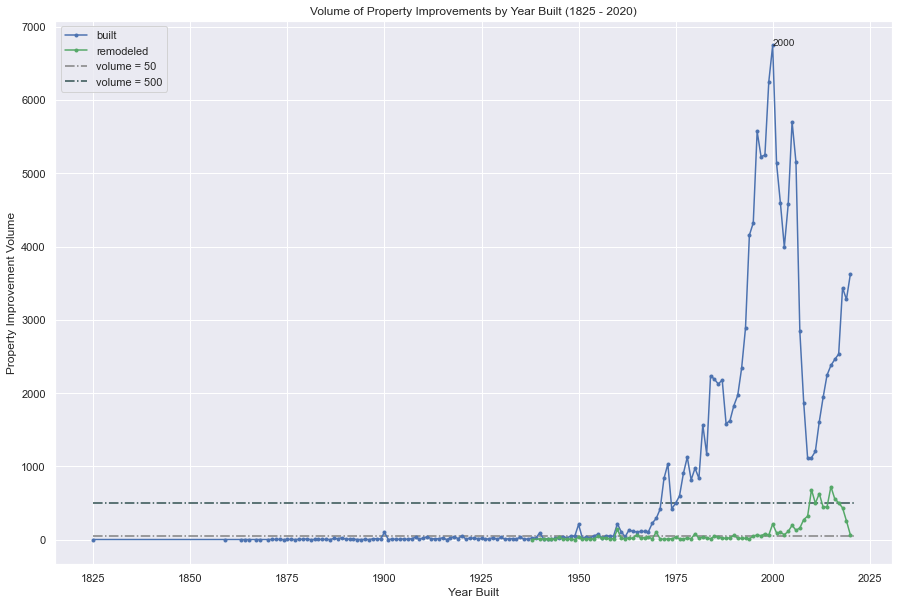

In [14]:
## Plot Volume by Year Built and Remodels

# Set Figure labels and size
plt.figure(figsize=(15,10))
plt.title('Volume of Property Improvements by Year Built (1825 - 2020)')
plt.xlabel('Year Built')
plt.ylabel('Property Improvement Volume')

plt.plot(df_yr_built['Built_Year'], df_yr_built['count'], 'b.-', label = 'built')
plt.plot(df_yr_remod['Remodeled_Year'], df_yr_remod['count'], 'g.-', label = 'remodeled')
plt.hlines(50, xmin=1825,xmax=2021, colors='gray', linestyles='dashdot', label='volume = 50', data=None)
plt.hlines(500, xmin=1825,xmax=2021, colors='darkslategray', linestyles='dashdot', label='volume = 500', data=None)
plt.annotate("2000", (2000,6744))

plt.legend(loc='upper left')

plt.show()


###### Duplicate Record and Level of Granularity Review

     - Review of duplicates revealed that each row was unique by:
         * Account_No : Unique AlphaNumeric ID for each property
         * Building_ID 
         * Style
         * Built_As_Code/Built_As
         * Built_as_SF
         * No_Bedrooms
         * Built_Year
         * No_Of_Unit
         


In [15]:
# Check for any duplicated records in the dataframe
df_PI.duplicated(keep ='first').sum()

0

In [16]:
# Check for any duplicated records in the dataframe - specific columns
df_PI.duplicated(subset=["Account_No"],keep ='first').sum()

13564

In [17]:
# Check for any duplicated records in the dataframe - specific columns
df_PI.duplicated(subset=["Account_No","Building_ID"],keep ='first').sum()

2636

In [18]:
# Check for any duplicated records in the dataframe - specific columns
df_PI.duplicated(subset=["Account_No","Building_ID","Style"],keep ='first').sum()

2393

In [19]:
# Check for any duplicated records in the dataframe - specific columns
df_PI.duplicated(subset=["Account_No","Building_ID","Style","Occupancy_Code"],keep ='first').sum()

2393

In [20]:
# Check for any duplicated records in the dataframe - specific columns
df_PI.duplicated(subset=["Account_No","Building_ID","Style","Occupancy_Code","Built_As_code"],keep ='first').sum()

105

In [21]:
# Check for any duplicated records in the dataframe - specific columns
df_PI.duplicated(subset=["Account_No","Building_ID","Style","Occupancy_Code","Built_As_code","Built_As","Quality_Code"
                          ,"Property_Type_Code","Improvement_Type_Code","Completion_Percent","Unit_Type","No_of_Fireplace"
                          ,"Total_Garage_SF","Walkout_Basement_Flag","Total_Porch_SF","Total_Finished_Basement_SF"
                          ,"Total_Unfinished_Basement_SF","Roof_Construction_Type"],keep ='first').sum()

79

In [22]:
# Check for any duplicated records in the dataframe - specific columns
df_PI.duplicated(subset=["Account_No","Building_ID","Style","Occupancy_Code","Built_As_code","Built_As","Quality_Code"
                          ,"Property_Type_Code","Improvement_Type_Code","Completion_Percent","Unit_Type","No_of_Fireplace"
                          ,"Total_Garage_SF","Walkout_Basement_Flag","Total_Porch_SF","Total_Finished_Basement_SF"
                          ,"Total_Unfinished_Basement_SF","Roof_Construction_Type","Built_as_SF"],keep ='first').sum()

3

In [23]:
# Check for any duplicated records in the dataframe - specific columns
df_PI.duplicated(subset=["Account_No","Building_ID","Style","Occupancy_Code","Built_As_code","Built_As","Quality_Code"
                          ,"Property_Type_Code","Improvement_Type_Code","Completion_Percent","Unit_Type","No_of_Fireplace"
                          ,"Total_Garage_SF","Walkout_Basement_Flag","Total_Porch_SF","Total_Finished_Basement_SF"
                          ,"Total_Unfinished_Basement_SF","Roof_Construction_Type","Built_as_SF","Exterior_Construction"
                          ,"Interior_Construction","No_of_Story","Roof_Material_Code","Floor_Material_Type_Code"
                          ,"No_of_Bedrooms","No_of_Bathrooms"],keep ='first').sum()

2

In [24]:
# Check for any duplicated records in the dataframe - specific columns
df_PI.duplicated(subset=["Account_No","Building_ID","Style","Occupancy_Code","Built_As_code","Built_As","Quality_Code"
                          ,"Property_Type_Code","Improvement_Type_Code","Completion_Percent","Unit_Type","No_of_Fireplace"
                          ,"Total_Garage_SF","Walkout_Basement_Flag","Total_Porch_SF","Total_Finished_Basement_SF"
                          ,"Total_Unfinished_Basement_SF","Roof_Construction_Type","Built_as_SF","Exterior_Construction"
                          ,"Interior_Construction","No_of_Story","Roof_Material_Code","Floor_Material_Type_Code"
                          ,"No_of_Bedrooms","No_of_Bathrooms","Built_Year"],keep ='first').sum()

1

In [25]:
# Check for any duplicated records in the dataframe - specific columns
df_PI.duplicated(subset=["Account_No","Building_ID","Style","Occupancy_Code","Built_As_code","Built_As","Quality_Code"
                          ,"Property_Type_Code","Improvement_Type_Code","Completion_Percent","Unit_Type","No_of_Fireplace"
                          ,"Total_Garage_SF","Walkout_Basement_Flag","Total_Porch_SF","Total_Finished_Basement_SF"
                          ,"Total_Unfinished_Basement_SF","Roof_Construction_Type","Built_as_SF","Exterior_Construction"
                          ,"Interior_Construction","No_of_Story","Roof_Material_Code","Floor_Material_Type_Code"
                          ,"No_of_Bedrooms","No_of_Bathrooms","Built_Year","Remodeled_Year","Length_of_Mobile_Home"
                          ,"Width_of_Mobile_Home","Average_Story_Height","No_Of_Unit"
                        ],keep ='first').sum()

0

In [26]:
# Check for any duplicated records in the dataframe - specific columns
df_PI.duplicated(subset=["Account_No","Building_ID","Style","Occupancy_Code","Built_As_code","Built_As","Quality_Code"
                          ,"Property_Type_Code","Improvement_Type_Code","Completion_Percent","Unit_Type","No_of_Fireplace"
                          ,"Total_Garage_SF","Walkout_Basement_Flag","Total_Porch_SF","Total_Finished_Basement_SF"
                          ,"Total_Unfinished_Basement_SF","Roof_Construction_Type","Built_as_SF","Exterior_Construction"
                          ,"Interior_Construction","No_of_Story","Roof_Material_Code","Floor_Material_Type_Code"
                          ,"No_of_Bedrooms","No_of_Bathrooms","Built_Year","Remodeled_Year","Length_of_Mobile_Home"
                          ,"Width_of_Mobile_Home","Average_Story_Height","No_Of_Unit","Sprinkler_Coverage_SF","Condition"
                          ,"HVAC"],keep ='first').sum()

0

###### View the unique Values in the columns

I want to see what is unique/included in each of the columns that make a record unique, pluse a few others that identify the type of property.  I am going to use the pandas .unique() function to view the unqiue values.

In [27]:
# View the unique values for "Building_ID"
df_PI['Building_ID'].unique()

array([ 1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 13., 14., 15., 16.,
       17., 20., 21.,  5., 11., 12., 40., 50., 51., 52., 53., 54., 18.,
       19., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 41., 42., 43., 44., 45., 46., 47.,
       48., 49., 55., 56., 57., 58.])

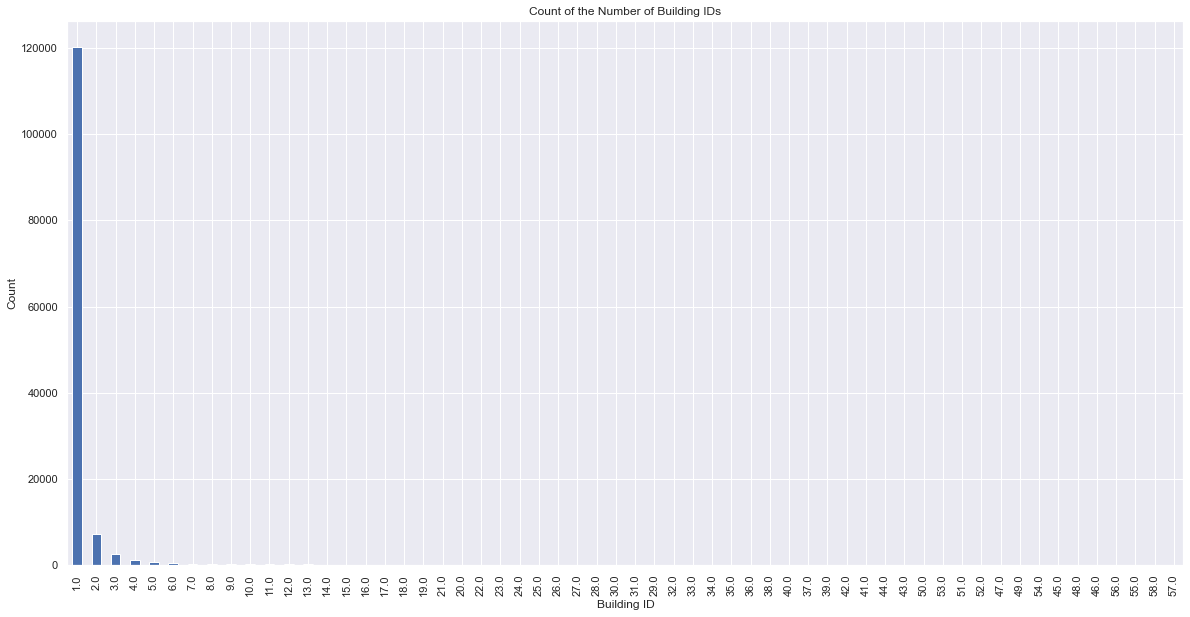

In [28]:
# View visually the content of the column
df_PI['Building_ID'].value_counts().plot(kind='bar', title = "Count of the Number of Building IDs"
                    , xlabel = "Building ID", ylabel = "Count", figsize = (20,10))

plt.show()

In [29]:
# View the unique values for "Style" - 184 unique values
df_PI['Style'].unique()

array(['Mobile Home', 'Single Family Residential',
       'Farm Utility Building (477)', 'Indust Lght Manufacturing',
       'Farm Util  Hay Shed (565)', 'Farm Sun Shelters',
       'Storage Warehouse', 'Horse Arena', 'Stable', 'Shed - Cattle',
       'Farm Implement Equip Shed (478)', 'Farm Implement-Equip Shop',
       'Modular Office', 'Lumber Storage - Horizontal',
       'Equipment Building', 'Barns - Genl Purpose (102)',
       'Office Building', 'Service Garage', 'Light Commercial Utility',
       'Material Shelters', 'Farm Utility Storage - Loafing',
       'Post Office', 'Detached Garage', 'Shed - Poultry',
       'Shed - Equipment', 'Farm Utility Loafing Shed',
       'Single Family Residential on Ag', 'Satelite Service Center',
       'Shed - Tool', 'Shower Building', 'Mini Warehouse',
       'Office-Apartment', 'Restroom Building/Concessions',
       'Country Club', 'Townhouse', 'Greenhouse Shade Shelters',
       'Equipment Storage', 'Site Improvements', 'Storage - Materia

In [30]:
# Group and count the number of accounts by Style
df_PI_StyleCounts = df_PI['Style'].value_counts().to_frame()

df_PI_StyleCounts.head()

Style
Single Family Residential    102693
Condominium unit               6868
Townhouse                      5544
Farm Utility Building (477)    3137
Barns - Genl Purpose (102)     2862

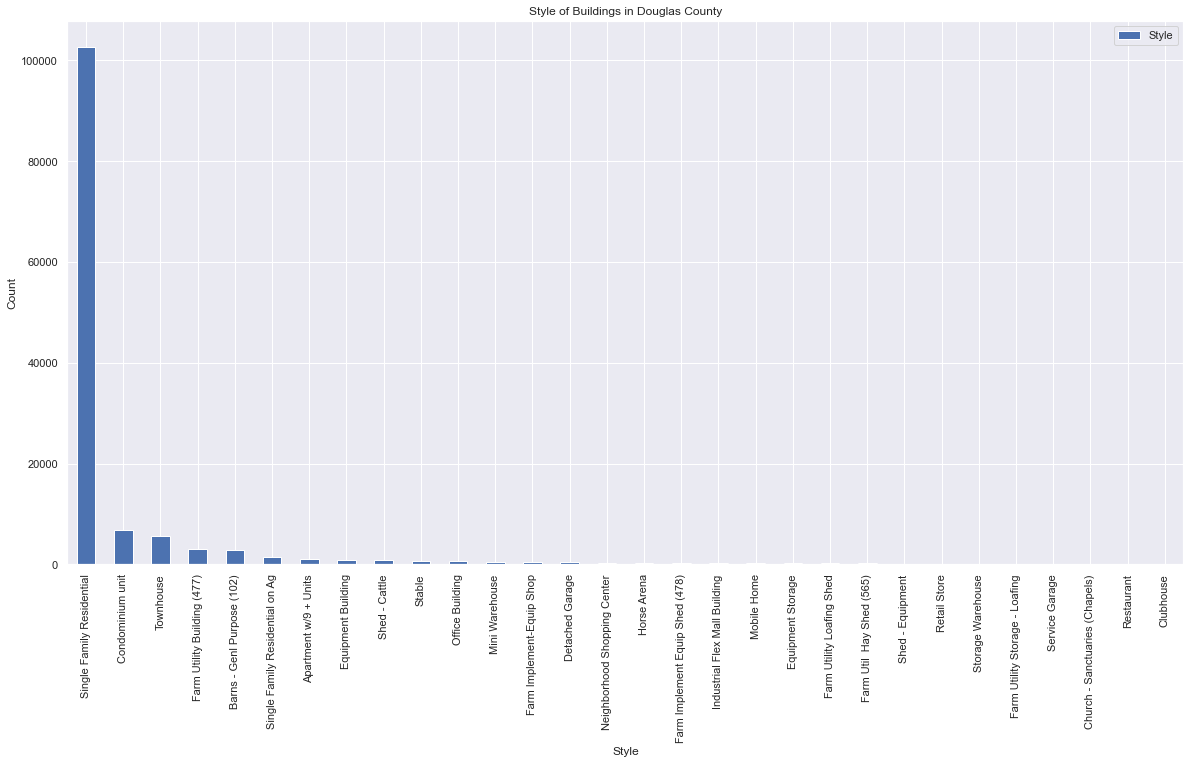

In [31]:
# View visually the numer of accounts by Style
df_PI_StyleCounts[0:30].plot(kind='bar', title = "Style of Buildings in Douglas County",xlabel = "Style"
                    , ylabel = "Count", figsize = (20,10))

plt.show()

In [32]:
# View the unique values
df_PI['Built_As'].unique()

array(['Double Wide', 'Single Wide', 'Ranch 1 Story',
       'Farm Utility Building (477)', 'Indust Lght Manufacturing',
       'Storage Warehouse', '1 1/2 Story Fin',
       'Farm Util  Hay Shed (565)', 'Farm Sun Shelters', 'Horse Arena',
       'Farm Utility Lean-Tos (124)', 'Stable', 'Shed - Cattle',
       'Farm Implement Equip Shed (478)', 'Farm Implement-Equip Shop',
       'Modular Office', 'Lumber Storage - Horizontal', 'Split Level',
       'Equipment Building', '2 Story', 'Modular',
       'Barns - Genl Purpose (102)', 'Hay Loft', 'Office Building',
       'Service Garage', 'Light Commercial Utility',
       'Material Storage Sheds', 'Farm Utility Storage - Loafing',
       'Post Office', 'Bi Level', 'Detached Garage', 'Shed - Poultry',
       'Shed - Equipment', 'Lean-tos', 'Barns (Two-Story) Genl Purpose',
       'Farm Utility Loafing Shed', 'Farm Office',
       'Satelite Service Center', 'Equipment Storage', 'Shed - Tool',
       '3 Story', 'Shower Building', 'Mini Wareho

In [33]:
# Group and count the number of accounts by Built As

df_PI_BuiltAsCounts = df_PI['Built_As'].value_counts().to_frame()

df_PI_BuiltAsCounts.head()

Built_As
2 Story                 68270
Ranch 1 Story           23803
Split Level              8188
Condo 1 Story            4336
Townhouse Two Story      4018

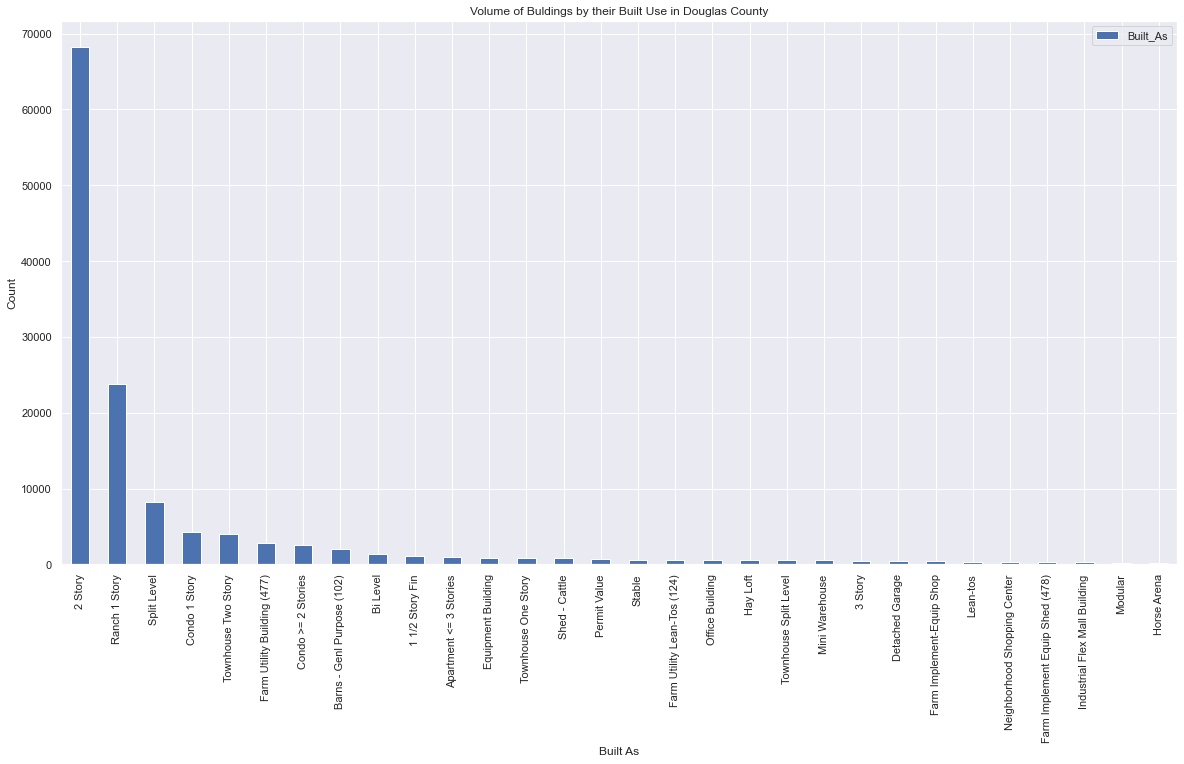

In [34]:
# View visually the numer of accounts by Style

df_PI_BuiltAsCounts[0:30].plot(kind='bar', title = "Volume of Buldings by their Built Use in Douglas County"
                               , xlabel = "Built As", ylabel = "Count", figsize = (20,10))

plt.show()

In [35]:
# View the unique values
df_PI['Built_As_code'].unique()

array([  15,   14,    1,  404,  334,  406,    5,  398,  566,  428, 1124,
        378,  402,  469,  476,  474,  339,    7,  473,    8,   21,  397,
        471,  344,  325, 1471, 1468,  479,  346,    2,   99,  400,  401,
        560, 1100,  478,  468,  475,  389,  421,   25,  403,  386,  544,
        432,  314,   61,   68,    0,   67,  519,   12,  200, 1473,  391,
         17,   10,   20,  557,  353,   40,  309,  407,  558,  350,  315,
        316,  209,  390,  412,  213,  225,  358,  228,  430,  304,  437,
        426,    6,  419,  226,  326,  210,  343,   71,   19,  337,   51,
        381,   58,  352,  349,  311,  341,  435,  434,   18,  575,  577,
         57,  384,  222,  574,  211,    9,  410,  220,   11, 1101,  184,
         22,   75,  356,  321,  530,  348,  223,  587,   98,  365,  324,
        327,  323,  427,  221,  559,  156,  322,  554,   65,  514,  392,
        418,  345,  158,  166,  342,  306,  319,  526,  183,  436,  423,
        308,  382,  518,  313,  411,  399, 1174,  2

In [36]:
# View the unique values
df_PI['Built_as_SF'].unique()

array([ 1205,   924,  1440, ..., 10970,   536,  9452], dtype=int64)

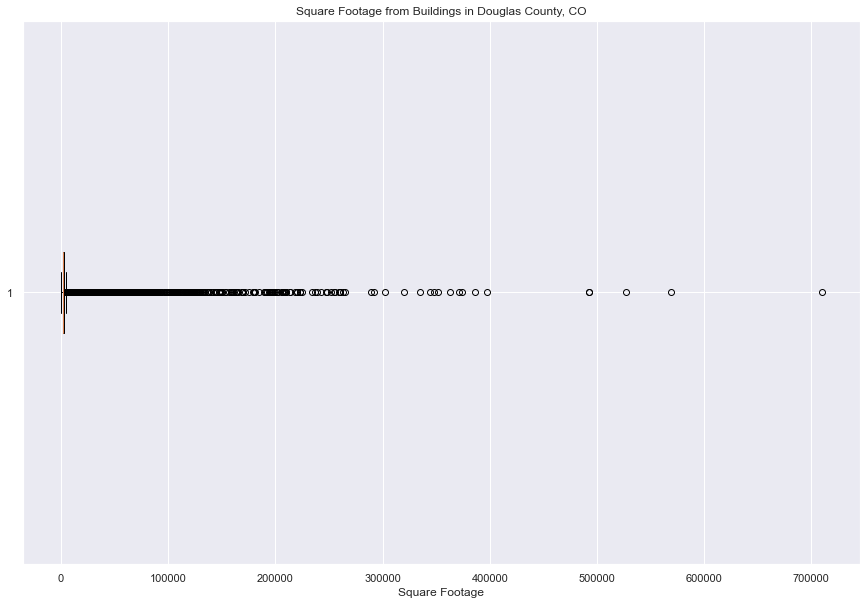

In [37]:
# View visually the distribution of Square Footage

df_PI_SF = df_PI['Built_as_SF']

# Set Figure labels and size
plt.figure(figsize=(15,10))
plt.title('Square Footage from Buildings in Douglas County, CO')
plt.xlabel('Square Footage')
plt.ylabel('')

# Plot data as a boxplot
plt.boxplot(df_PI_SF, notch=None, vert=False, patch_artist=None, widths=None)

plt.show()

In [38]:
# View the unique values
df_PI['No_of_Bedrooms'].unique()

array([  2.,   1.,   0.,   3.,   4.,  nan,   5.,   6.,   7.,  10.,   8.,
        12.,  23.,  39.,  16.,  20.,   9.,  24.,  21.,  14.,  30.,  36.,
        40.,  22.,  26.,  28.,  60., 506.,  18.,  37.,  34.,  58., 149.,
        72.,  56.,  84.,  32.,  46., 193., 335.,  42.,  54., 414.,  80.,
        92., 126., 306., 121., 118., 154.,  25.,  52., 315.,  48., 158.,
       133.,  15., 163., 189.])

In [39]:
# Prepare for plotting 
df_PI_BR = df_PI['No_of_Bedrooms'].dropna().astype('int64')

df_PI_BR.head()

0    2
1    1
2    1
3    2
4    1
Name: No_of_Bedrooms, dtype: int64

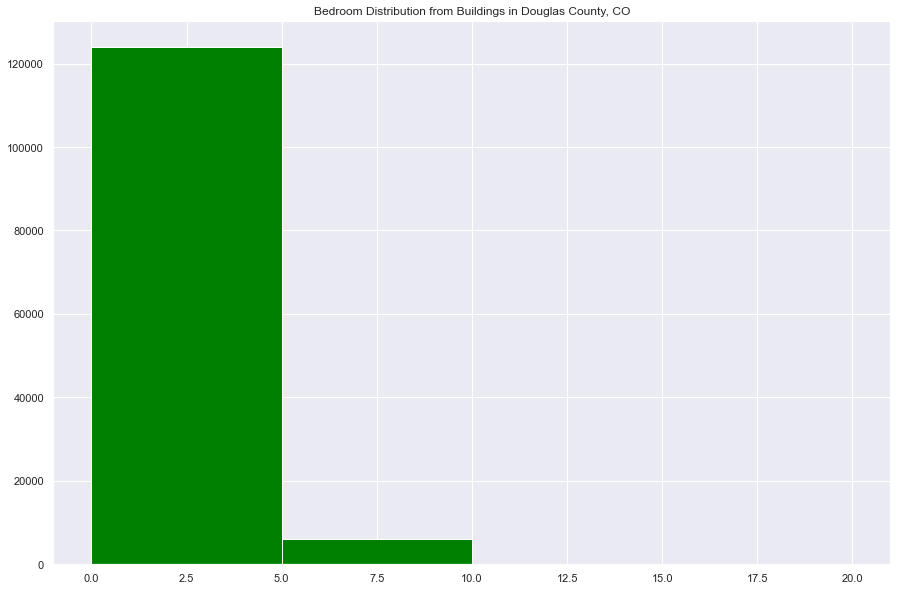

In [40]:
# Plot number of bedrooms (distribution)

# Set Figure labels and size
plt.figure(figsize=(15,10))
plt.title('Bedroom Distribution from Buildings in Douglas County, CO')
plt.xlabel('')
plt.ylabel('')
plt.hist(df_PI_BR, bins=[0,5,10,15,20], 
         histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color='green', label=None)

plt.show()

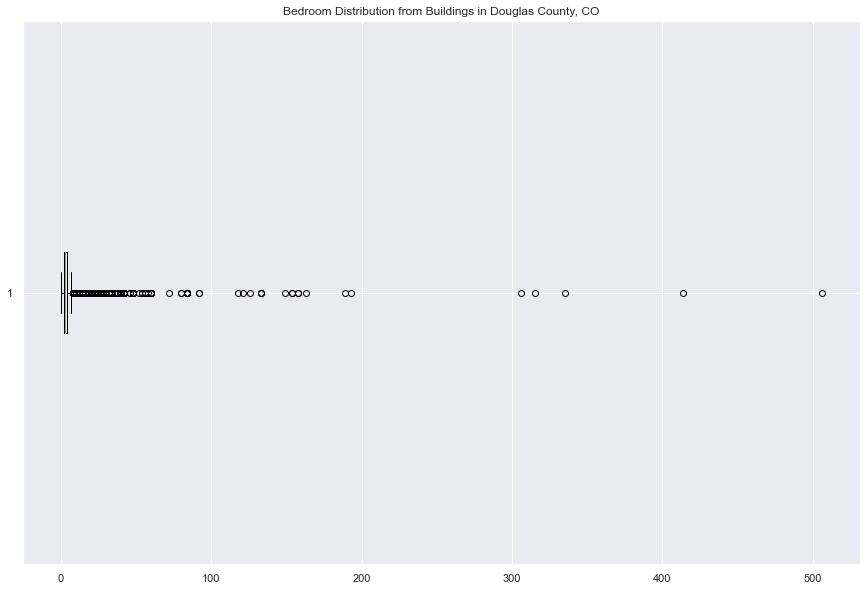

In [41]:
# View visually the distribution of Bedrooms
# Set Figure labels and size
plt.figure(figsize=(15,10))
plt.title('Bedroom Distribution from Buildings in Douglas County, CO')
plt.xlabel('')
plt.ylabel('')
# Plot data as a boxplot
plt.boxplot(df_PI_BR, notch=None, vert=False, patch_artist=None, widths=None)

plt.show()

In [42]:
# View the unique values
df_PI['Built_Year'].unique()

array([1999, 1973, 1974, 1972, 1977, 1969, 1971, 1964, 1965, 1978, 1962,
       1979, 1980, 1982, 1981, 1984, 1983, 1985, 1986, 1970, 1976, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1968, 1996, 1997, 1998,
       2001, 1961, 2000, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019, 1963, 2020, 1957,
       1960, 1947, 1900, 1935, 1987, 1950, 1966, 1954, 1887, 1959, 1951,
       1908, 1911, 1967, 1915, 1945, 1975, 2018, 1914, 1955, 1889, 1931,
       1916, 1941, 1956, 1905, 1948, 1953, 1949, 1891, 1893, 2004, 1930,
       1899, 1920, 1890, 1934, 1940, 1922, 1952, 1938, 1942, 1888, 1917,
       1880, 1898, 1937, 1958, 1876, 1878, 1918, 1946, 1894, 1923, 1943,
       1926, 1872, 1919, 1879, 1932, 1933, 1928, 1910, 1912, 1897, 1944,
       1904, 1886, 1875, 1913, 1927, 1877, 1882, 1921, 1883, 1909, 1924,
       1939, 1902, 1867, 1895, 1925, 1892, 1871, 1870, 1906, 1936, 1907,
       1885, 1903, 1884, 1874, 1868, 1929, 1896, 19

In [43]:
# View the unique values
df_PI['No_Of_Unit'].unique()

array([1.000e+00, 0.000e+00, 4.000e+00, 8.000e+00, 2.000e+00, 3.000e+00,
       4.800e+01, 1.700e+01, 6.000e+00, 2.400e+01, 5.000e+00, 1.200e+01,
       1.000e+01, 2.300e+01, 7.000e+00, 1.400e+01, 3.300e+01,       nan,
       1.800e+01, 9.000e+00, 2.700e+01, 2.900e+01, 1.500e+01, 3.800e+01,
       2.230e+02, 1.120e+02, 2.470e+02, 3.200e+01, 2.100e+01, 1.600e+01,
       6.900e+01, 2.000e+01, 3.400e+01, 7.400e+01, 7.800e+01, 3.900e+01,
       2.200e+01, 1.270e+02, 6.800e+01, 1.200e+02, 6.300e+01, 4.800e+02,
       7.300e+01, 1.140e+02, 1.570e+02, 1.900e+01, 2.800e+01, 1.560e+02,
       6.600e+01, 6.000e+01, 8.000e+01, 7.200e+01, 1.300e+01, 1.100e+01,
       1.090e+02, 2.300e+02, 3.600e+01, 1.452e+03, 1.280e+02, 4.000e+01,
       1.010e+02, 6.700e+01, 1.310e+02, 8.400e+01, 9.700e+01, 6.200e+01,
       4.200e+01, 8.800e+01, 1.330e+02, 3.000e+01, 9.000e+01, 9.100e+01,
       4.300e+01, 6.500e+01, 5.900e+01, 2.600e+01, 4.400e+01, 1.340e+02,
       1.470e+02, 1.230e+02, 1.370e+02, 1.710e+02, 

In [44]:
# View the unique values for Unit Type
# This term refers to the way Condominium or Townhouse properties are typically constructed in groups
# where some of the walls are common or shared. A unit’s location in the overall structure can influence its
# market value, based on whether it is an interior or end unit.

df_PI['Unit_Type'].unique()

array([nan, 'End', 'Inside'], dtype=object)

In [45]:
# View the unique values
df_PI['Property_Type_Code'].unique()

array(['Mobile Home', 'Residential', 'Out Building', 'Commercial',
       'Townhouse', 'Multiple Unit', 'Condo', 'Triplex', 'Duplex'],
      dtype=object)

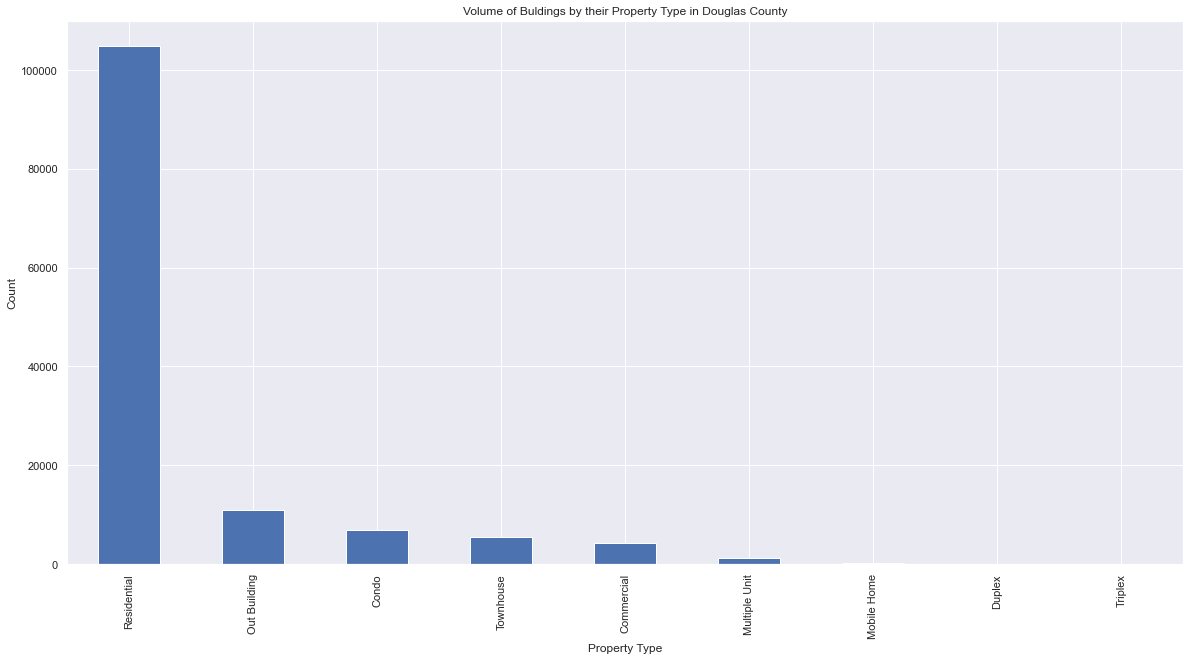

In [46]:
# View visually the numer of accounts by Style
df_PI['Property_Type_Code'].value_counts().plot(kind='bar', 
                    title = "Volume of Buldings by their Property Type in Douglas County",xlabel = "Property Type",
                    ylabel = "Count", figsize = (20,10))
plt.show()

###### Identify the Null/Nan Values in each Column

In [47]:
# Check for the number of "Nan" values in each column of the dataframe
df_PI.isna().sum()

Account_No                           0
Building_ID                          0
Style                                0
Occupancy_Code                       0
Built_As_code                        0
Built_As                             0
Quality_Code                       613
Property_Type_Code                   0
Improvement_Type_Code                0
Completion_Percent                   0
Unit_Type                       121348
No_of_Fireplace                      0
Total_Garage_SF                      0
Walkout_Basement_Flag                0
Total_Porch_SF                       0
Total_Finished_Basement_SF           0
Total_Unfinished_Basement_SF         0
Roof_Construction_Type           18802
Built_as_SF                          0
Exterior_Construction            15467
Interior_Construction            16549
No_of_Story                          6
Roof_Material_Code               16235
Floor_Material_Type_Code         16266
No_of_Bedrooms                    3251
No_of_Bathrooms          

In [48]:
# Review the information on the dataframe (columns, non-null count, data types, index range, )
df_PI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133865 entries, 0 to 133864
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Account_No                    133865 non-null  object 
 1   Building_ID                   133865 non-null  float64
 2   Style                         133865 non-null  object 
 3   Occupancy_Code                133865 non-null  int64  
 4   Built_As_code                 133865 non-null  int64  
 5   Built_As                      133865 non-null  object 
 6   Quality_Code                  133252 non-null  object 
 7   Property_Type_Code            133865 non-null  object 
 8   Improvement_Type_Code         133865 non-null  int64  
 9   Completion_Percent            133865 non-null  float64
 10  Unit_Type                     12517 non-null   object 
 11  No_of_Fireplace               133865 non-null  int64  
 12  Total_Garage_SF               133865 non-nul

###### Data Manipulation - Filters, etc...

I am only interested in Single Family Homes.  The column/variable "Property_Type_Code" has 9 values.  Filtering on "Residential", should give me residential properities. The column/Variable "Style" has 12 values for residential properties.  Filtering on "Residential" and "Single Family Residential" for these two variables should give me only the single family homes (detatched) that I am looking for.

Each of the records in the resulting dataframe represent a Single Building (Building_ID)

        Single Family Residential:
             - 35 Columns, 102,669 rows
             - 102,373 Unique Accounts
             - 102,664 Unique Accounts/Buildings
             

In [49]:
# Filter the dataframe for "Residential" properties
df_PI_sfres = df_PI[(df_PI['Property_Type_Code'] == 'Residential') 
                    & (df_PI['Style'] == 'Single Family Residential') & (df_PI['Built_As'] != 'Permit Value')]

In [50]:
# View the shape of the filtered data frame
df_PI_sfres.shape

(102141, 35)

In [51]:
# Use Describe to view descriptive statistics on each of the columns.
df_PI_sfres.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No    Building_ID                      Style  Occupancy_Code  \
count      102141  102141.000000                     102141        102141.0   
unique     101848            NaN                          1             NaN   
top      R0482022            NaN  Single Family Residential             NaN   
freq           40            NaN                     102141             NaN   
mean          NaN       1.019581                        NaN           100.0   
std           NaN       0.528054                        NaN             0.0   
min           NaN       1.000000                        NaN           100.0   
25%           NaN       1.000000                        NaN           100.0   
50%           NaN       1.000000                        NaN           100.0   
75%           NaN       1.000000                        NaN           100.0   
max           NaN      42.000000                        NaN           100.0   

        Built_As_code Built_As Quality_Code Property_Type_Code  \
count   102141.000000   102141       102128             102141   
unique            NaN       18            6                  1   
top               NaN  2 Story      Average        Residential   
freq              NaN    67920        66026             102141   
mean         6.379211      NaN          NaN                NaN   
std          5.258727      NaN          NaN                NaN   
min          1.000000      NaN          NaN                NaN   
25%          7.000000      NaN          NaN                NaN   
50%          8.000000      NaN          NaN                NaN   
75%          8.000000      NaN          NaN                NaN   
max       1124.000000      NaN          NaN                NaN   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
count           102141.000000       102141.000000       135    102141.000000   
unique                    NaN                 NaN         2              NaN   
top                       NaN                 NaN       End              NaN   
freq                      NaN                 NaN       126              NaN   
mean              2390.625420           99.987615       NaN         0.989681   
std                813.754438            0.970534       NaN         0.556510   
min                  0.000000            0.000000       NaN         0.000000   
25%               1808.000000          100.000000       NaN         1.000000   
50%               2284.000000          100.000000       NaN         1.000000   
75%               2844.000000          100.000000       NaN         1.000000   
max              16807.000000          100.000000       NaN         8.000000   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
count     102141.000000                102141   102141.000000   
unique              NaN                     2             NaN   
top                 NaN                     N             NaN   
freq                NaN                 74858             NaN   
mean         603.224954                   NaN      450.553108   
std          265.067514                   NaN      462.819952   
min            0.000000                   NaN        0.000000   
25%          440.000000                   NaN      191.000000   
50%          579.000000                   NaN      337.000000   
75%          687.000000                   NaN      553.000000   
max         7745.000000                   NaN    16444.000000   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
count                102141.000000                 102141.000000   
unique                         NaN                           NaN   
top                            NaN                           NaN   
freq                           NaN                           NaN   
mean                    529.788684                    681.160151   
std                     692.249999                    637.489420   
min                       0.000000             

In [52]:
# Aggregate Volume by Built_Year
df_sfres_yr_built = df_PI_sfres.groupby(['Built_Year']).size().to_frame('count').reset_index()
# Aggregate Volume by Remodeled_Year and drop the first 2 records (non-remodels and weird entry)
df_sfres_yr_remod = df_PI_sfres.groupby(['Remodeled_Year']).size().to_frame('count').reset_index().drop([0],axis = 0)

In [53]:
# View the first few records
df_sfres_yr_built.head()

Built_Year  count
0        1867      1
1        1871      1
2        1872      2
3        1873      1
4        1875      2

In [54]:
# View the last few records
df_sfres_yr_built.tail()

Built_Year  count
140        2017   2059
141        2018   2787
142        2019   2887
143        2020   2754
144        2021      1

In [55]:
# View the first few records
df_sfres_yr_remod.head()

Remodeled_Year  count
1          1938.0      1
2          1940.0      2
3          1941.0      3
4          1942.0      5
5          1943.0      6

In [56]:
# View the last few records
df_sfres_yr_remod.tail()

Remodeled_Year  count
78          2016.0    478
79          2017.0    443
80          2018.0    382
81          2019.0    229
82          2020.0     58

In [57]:
# Drop the last record (144) - 2021 is only a partial year (2 months)
df_sfres_yr_built.drop([144],axis=0, inplace=True)


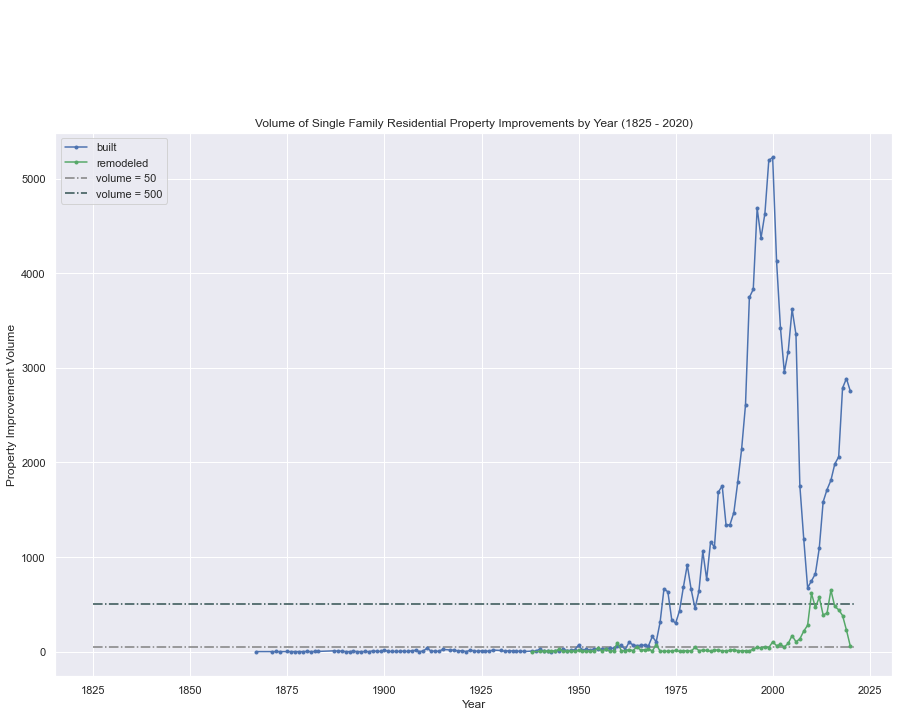

In [58]:
## Plot Volume by Year Built and Remodels

# Set Figure labels and size
plt.figure(figsize=(15,10))
plt.title('Volume of Single Family Residential Property Improvements by Year (1825 - 2020)')
plt.xlabel('Year')
plt.ylabel('Property Improvement Volume')

plt.plot(df_sfres_yr_built['Built_Year'], df_sfres_yr_built['count'], 'b.-', label = 'built')
plt.plot(df_sfres_yr_remod['Remodeled_Year'], df_sfres_yr_remod['count'], 'g.-', label = 'remodeled')
plt.hlines(50, xmin=1825,xmax=2021, colors='gray', linestyles='dashdot', label='volume = 50', data=None)
plt.hlines(500, xmin=1825,xmax=2021, colors='darkslategray', linestyles='dashdot', label='volume = 500', data=None)
plt.annotate("2000", (2000,6744))

plt.legend(loc='upper left')

plt.show()

In [59]:
# Check for any duplicated records in the dataframe - specific columns
df_PI_sfres.duplicated(subset=["Account_No"],keep ='first').sum()

293

In [60]:
# Check for any duplicated records in the dataframe - specific columns
df_PI_sfres.duplicated(subset=["Account_No","Building_ID"],keep ='first').sum()

5

In [61]:
# Check for any duplicated records in the dataframe - specific columns
df_PI_sfres.duplicated(subset=["Account_No","Building_ID","Built_As"],keep ='first').sum()

0

In [62]:
# View the unique values
df_PI_sfres['Built_As'].unique()

array(['Ranch 1 Story', '1 1/2 Story Fin', 'Split Level', '2 Story',
       'Modular', 'Bi Level', 'Farm Utility Lean-Tos (124)', '3 Story',
       'Dome', 'Cabin', 'Earth Sheltered', 'Retail Store',
       '1 1/2 Story Unfin', '2 1/2 Story', 'A Frame',
       'Modular 1 12 Story', 'Office Building', 'Cottage'], dtype=object)

In [63]:
# View the unique values
df_PI_sfres['Built_As'].nunique()

18

In [64]:
# Look at the combination of Building id and Build as
# Building ID: Each building on a property is given a unique number, and all data pertaining to that improvement is 
#    associated with the number.
df_PI_sfres.value_counts(['Built_As'])

Built_As                   
2 Story                        67920
Ranch 1 Story                  22964
Split Level                     8155
Bi Level                        1303
1 1/2 Story Fin                  923
3 Story                          494
Modular                          163
Cabin                            124
2 1/2 Story                       35
Dome                              18
Earth Sheltered                   17
A Frame                           11
1 1/2 Story Unfin                  7
Retail Store                       3
Farm Utility Lean-Tos (124)        1
Modular 1 12 Story                 1
Office Building                    1
Cottage                            1
dtype: int64

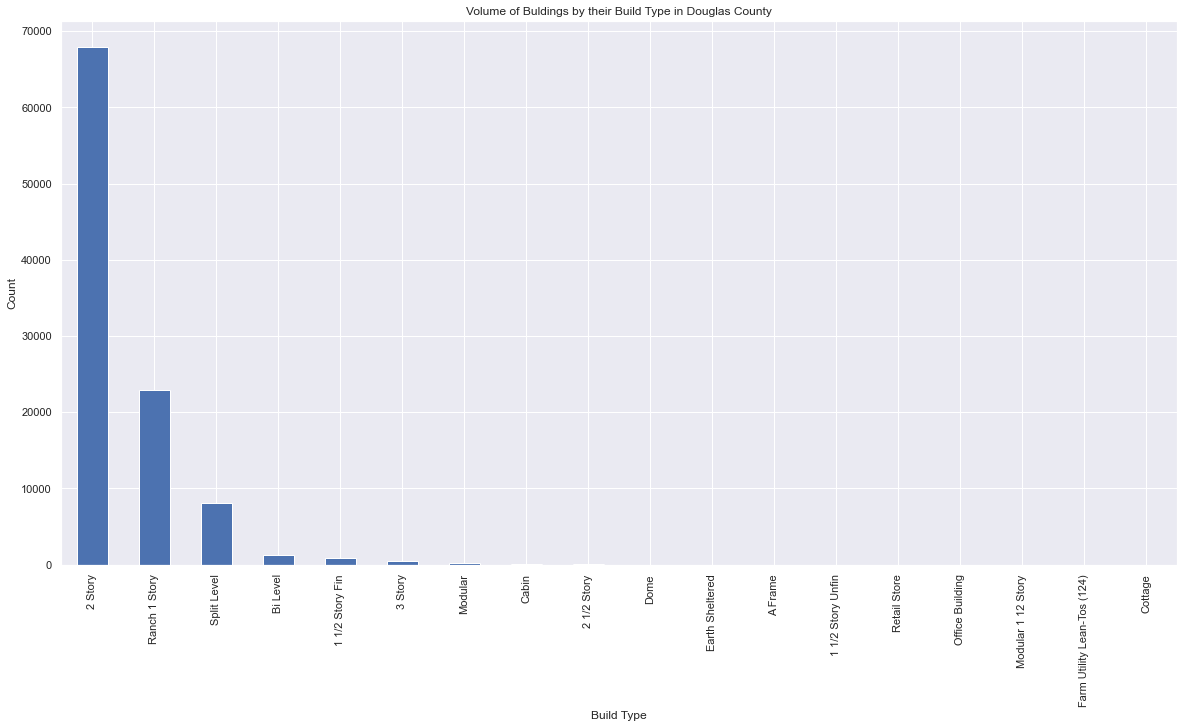

In [65]:
# View visually the top 30 values by Style
df_BuiltAs_sum = df_PI_sfres['Built_As'].value_counts()
df_BuiltAs_sum[0:30].plot(kind='bar', title = "Volume of Buldings by their Build Type in Douglas County",
                        xlabel = "Build Type", ylabel = "Count", figsize = (20,10))

plt.show()

In [66]:
# extract duplicate records
builtas_dups = df_PI_sfres.duplicated(subset=["Account_No","Building_ID"], keep = 'first')
builtas_dups_list = df_PI_sfres[builtas_dups]
builtas_dups_list

Account_No  Building_ID                      Style  Occupancy_Code  \
430     R0001812          1.0  Single Family Residential             100   
4183    R0051764          1.0  Single Family Residential             100   
64392   R0400127          1.0  Single Family Residential             100   
70497   R0409750          1.0  Single Family Residential             100   
89782   R0437998          9.0  Single Family Residential             100   

       Built_As_code                     Built_As Quality_Code  \
430             1124  Farm Utility Lean-Tos (124)      Average   
4183             353                 Retail Store      Average   
64392              8                      2 Story      Average   
70497            353                 Retail Store      Average   
89782              1                Ranch 1 Story      Average   

      Property_Type_Code  Improvement_Type_Code  Completion_Percent Unit_Type  \
430          Residential                   2554               100.0       NaN   
4183         Residential                   1853               100.0       NaN   
64392        Residential                   2648               100.0       NaN   
70497        Residential                   1703               100.0       NaN   
89782        Residential                   3916               100.0       NaN   

       No_of_Fireplace  Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
430                  0             1732                     N            1500   
4183                 1                0                     N             356   
64392                0                0                     N               0   
70497                0                0                     N               0   
89782                0              440                     N               0   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
430                             0                             0   
4183                            0                          1209   
64392                           0                             0   
70497                           0                             0   
89782                           0                             0   

      Roof_Construction_Type  Built_as_SF Exterior_Construction  \
430                     Shed          216                   NaN   
4183                   Gable          757                   NaN   
64392                  Gable         1658           Frame Vinyl   
70497                  Gable         1056                   NaN   
89782                    Hip         2766          Frame Siding   

      Interior_Construction  No_of_Story   Roof_Material_Code  \
430                     NaN          1.0                  NaN   
4183                    NaN          1.0                  NaN   
64392               Drywall          2.0  Composition Shingle   
70497                   NaN          1.0                  NaN   
89782               Drywall          1.0  Composition Shingle   

      Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
430                        NaN             NaN              NaN        1985   
4183                 Allowance             0.0              0.0        1918   
64392                Allowance             0.0              0.0        1887   
70497                      NaN             0.0              0.0        1900   
89782                Allowance             1.0              1.0        1997   

       Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
430               NaN                    0.0                   0.0   
4183           2006.0                    0.0                   0.0   
64392             0.0                    0.0                   0.0   
70497          1998.0                    0.0                   0.0   
89782             0.0                    0.0                   0.0   

       Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
430      

In [67]:
# Look at accounts and bulidings where the use has changed - There are 5 Buildings where the use has changed.
ba_dups = ['R0001812','R0051764','R0400127','R0409750','R0437998']
df_builtas_dups_rec = df_PI_sfres[df_PI_sfres.Account_No.isin(ba_dups)]
df_builtas_dups_rec.head(20)

Account_No  Building_ID                      Style  Occupancy_Code  \
429     R0001812          1.0  Single Family Residential             100   
430     R0001812          1.0  Single Family Residential             100   
4182    R0051764          1.0  Single Family Residential             100   
4183    R0051764          1.0  Single Family Residential             100   
64389   R0400127          1.0  Single Family Residential             100   
64392   R0400127          1.0  Single Family Residential             100   
70496   R0409750          1.0  Single Family Residential             100   
70497   R0409750          1.0  Single Family Residential             100   
89781   R0437998          9.0  Single Family Residential             100   
89782   R0437998          9.0  Single Family Residential             100   

       Built_As_code                     Built_As Quality_Code  \
429                2                     Bi Level      Average   
430             1124  Farm Utility Lean-Tos (124)      Average   
4182               1                Ranch 1 Story      Average   
4183             353                 Retail Store      Average   
64389            353                 Retail Store      Average   
64392              8                      2 Story      Average   
70496              1                Ranch 1 Story      Average   
70497            353                 Retail Store      Average   
89781            344              Office Building      Average   
89782              1                Ranch 1 Story      Average   

      Property_Type_Code  Improvement_Type_Code  Completion_Percent Unit_Type  \
429          Residential                   2554               100.0       NaN   
430          Residential                   2554               100.0       NaN   
4182         Residential                   1853               100.0       NaN   
4183         Residential                   1853               100.0       NaN   
64389        Residential                   2648               100.0       NaN   
64392        Residential                   2648               100.0       NaN   
70496        Residential                   1703               100.0       NaN   
70497        Residential                   1703               100.0       NaN   
89781        Residential                   3916               100.0       NaN   
89782        Residential                   3916               100.0       NaN   

       No_of_Fireplace  Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
429                  0             1732                     N            1500   
430                  0             1732                     N            1500   
4182                 1                0                     N             356   
4183                 1                0                     N             356   
64389                0                0                     N               0   
64392                0                0                     N               0   
70496                0                0                     N               0   
70497                0                0                     N               0   
89781                0              440                     N               0   
89782                0              440                     N               0   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
429                             0                             0   
430                             0                             0   
4182                            0                          1209   
4183                            0                          1209   
64389                           0                             0   
64392                           0                             0   
70496                           0                             0   
70497                           0                             0   
89781                           0                      

In [68]:
# Filter the dataframe for "Residential" properties
df_PI_sfres2 = df_PI_sfres[(df_PI_sfres['Built_As'] != 'Farm Utility Lean-Tos (124)') 
                    & (df_PI_sfres['Built_As'] != 'Retail Store') & (df_PI_sfres['Built_As'] != 'Office Building')]


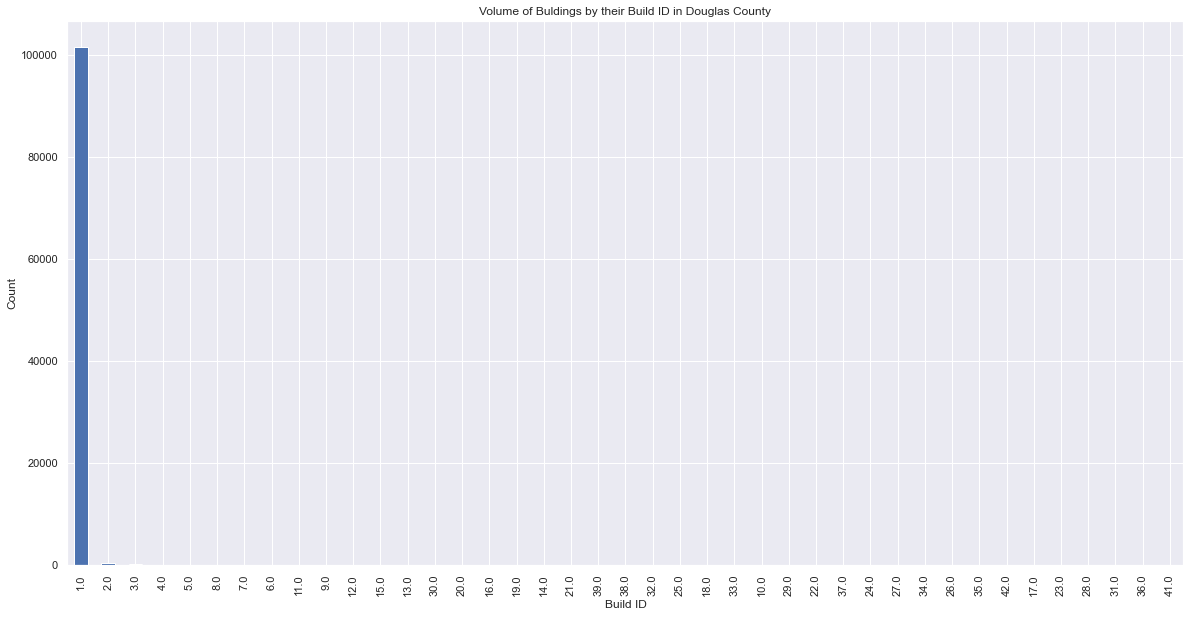

In [69]:
# View visually the numer of accounts by Building ID
df_PI_sfres2['Building_ID'].value_counts().plot(kind='bar',
                            title = "Volume of Buldings by their Build ID in Douglas County",
                            xlabel = "Build ID", ylabel = "Count", figsize = (20,10))

plt.show()

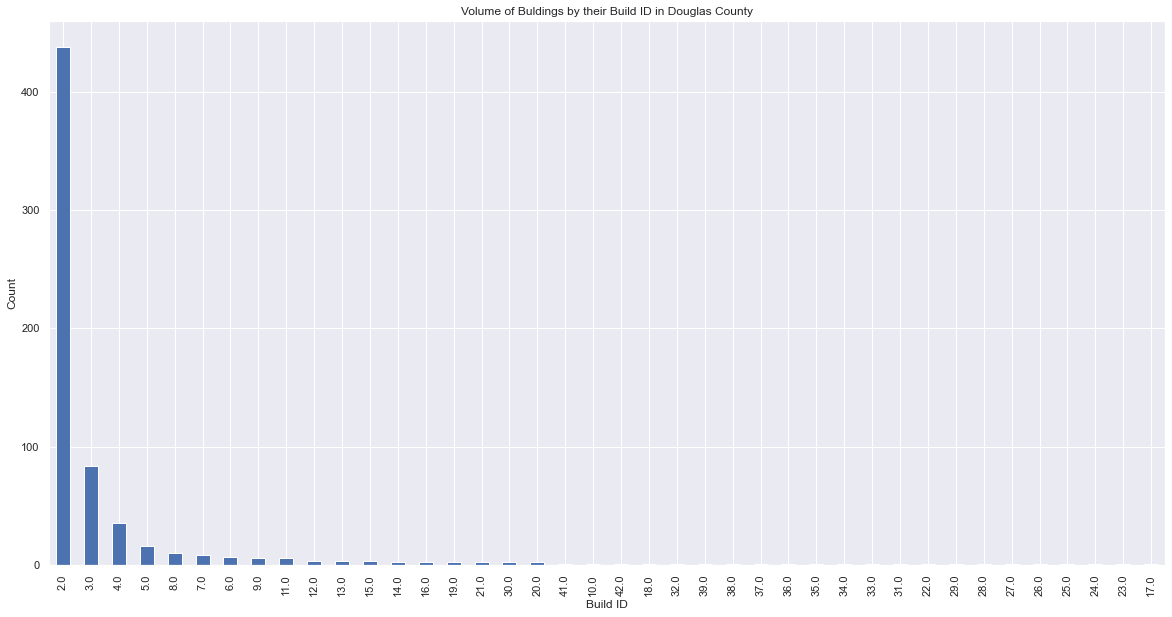

In [70]:
# View visually the Building_ID data
df_PI_sfres2plot = df_PI_sfres[(df_PI_sfres['Building_ID'] > 1.0)]
df_PI_sfres2plot['Building_ID'].value_counts().plot(kind='bar', 
                    title ="Volume of Buldings by their Build ID in Douglas County",
                    xlabel = "Build ID", ylabel = "Count", figsize = (20,10))
plt.show()

In [71]:
# View visually the numer of accounts by BuildingID and Built As
plotdata1 = df_PI_sfres2.groupby(['Built_As','Building_ID']).size()
plotdata1

Built_As            Building_ID
1 1/2 Story Fin     1.0              901
                    2.0               13
                    3.0                1
                    4.0                5
                    8.0                1
                    11.0               1
                    13.0               1
1 1/2 Story Unfin   1.0                6
                    3.0                1
2 1/2 Story         1.0               35
2 Story             1.0            67698
                    2.0              187
                    3.0               22
                    4.0                3
                    5.0                3
                    6.0                1
                    8.0                5
                    9.0                1
3 Story             1.0              492
                    2.0                1
                    20.0               1
A Frame             1.0               10
                    2.0                1
Bi Level            1.0  

In [72]:
# View the Accounts with Large Number of Buildings
Lrg_BldID = df_PI_sfres[(df_PI_sfres['Building_ID'] > 1.0)].sort_values('Building_ID')
Lrg_BldID_AcctNo = Lrg_BldID['Account_No']
Lrg_BldID

Account_No  Building_ID                      Style  Occupancy_Code  \
227      R0000211          2.0  Single Family Residential             100   
71493    R0411089          2.0  Single Family Residential             100   
70948    R0410388          2.0  Single Family Residential             100   
70947    R0410387          2.0  Single Family Residential             100   
70938    R0410378          2.0  Single Family Residential             100   
...           ...          ...                        ...             ...   
117942   R0482022         37.0  Single Family Residential             100   
117943   R0482022         38.0  Single Family Residential             100   
117944   R0482022         39.0  Single Family Residential             100   
117946   R0482022         41.0  Single Family Residential             100   
117947   R0482022         42.0  Single Family Residential             100   

        Built_As_code       Built_As Quality_Code Property_Type_Code  \
227                 1  Ranch 1 Story      Average        Residential   
71493               1  Ranch 1 Story         Good        Residential   
70948               8        2 Story         Good        Residential   
70947               8        2 Story         Good        Residential   
70938               8        2 Story    Very Good        Residential   
...               ...            ...          ...                ...   
117942              1  Ranch 1 Story      Average        Residential   
117943              1  Ranch 1 Story      Average        Residential   
117944              1  Ranch 1 Story      Average        Residential   
117946              1  Ranch 1 Story      Average        Residential   
117947              1  Ranch 1 Story      Average        Residential   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
227                       840               100.0       NaN                0   
71493                    2236               100.0       NaN                1   
70948                    2943               100.0       NaN                1   
70947                    2965               100.0       NaN                1   
70938                    3675               100.0       NaN                1   
...                       ...                 ...       ...              ...   
117942                   1636               100.0       End                1   
117943                   1636               100.0       End                1   
117944                   1600               100.0       End                1   
117946                   1641               100.0       End                1   
117947                   1605               100.0       End                1   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
227                   0                     N               0   
71493               482                     Y             392   
70948               736                     N             472   
70947               635                     N             405   
70938               746                     Y            1214   
...                 ...                   ...             ...   
117942              400                     N             270   
117943              400                     N             270   
117944              400                     N             245   
117946              400                     N             275   
117947              400                     N             245   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
227                              0                             0   
71493                         1050                           262   
70948                         1170                            62   
70947                         1300                           417   
70938                         1808                           119   
...                            ...                           ...   

In [73]:
# Review all of the records for large building ID Accounts
Lrg_BldID_rvw = df_PI_sfres[df_PI_sfres.Account_No.isin(Lrg_BldID_AcctNo)].sort_values('Building_ID')
Lrg_BldID_rvw

Account_No  Building_ID                      Style  Occupancy_Code  \
226      R0000211          1.0  Single Family Residential             100   
95388    R0445994          1.0  Single Family Residential             100   
95188    R0445277          1.0  Single Family Residential             100   
15182    R0161162          1.0  Single Family Residential             100   
95170    R0445253          1.0  Single Family Residential             100   
...           ...          ...                        ...             ...   
117942   R0482022         37.0  Single Family Residential             100   
117943   R0482022         38.0  Single Family Residential             100   
117944   R0482022         39.0  Single Family Residential             100   
117946   R0482022         41.0  Single Family Residential             100   
117947   R0482022         42.0  Single Family Residential             100   

        Built_As_code       Built_As Quality_Code Property_Type_Code  \
226                 1  Ranch 1 Story         Good        Residential   
95388               1  Ranch 1 Story      Average        Residential   
95188               8        2 Story    Excellent        Residential   
15182               1  Ranch 1 Story      Average        Residential   
95170               1  Ranch 1 Story    Very Good        Residential   
...               ...            ...          ...                ...   
117942              1  Ranch 1 Story      Average        Residential   
117943              1  Ranch 1 Story      Average        Residential   
117944              1  Ranch 1 Story      Average        Residential   
117946              1  Ranch 1 Story      Average        Residential   
117947              1  Ranch 1 Story      Average        Residential   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
226                      2964               100.0       NaN                1   
95388                    1439               100.0       NaN                1   
95188                    5241               100.0       NaN                2   
15182                    2936               100.0       NaN                1   
95170                    3620               100.0       NaN                1   
...                       ...                 ...       ...              ...   
117942                   1636               100.0       End                1   
117943                   1636               100.0       End                1   
117944                   1600               100.0       End                1   
117946                   1641               100.0       End                1   
117947                   1605               100.0       End                1   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
226                 768                     N             598   
95388               483                     N             549   
95188              1108                     Y            1682   
15182               675                     Y             621   
95170              1539                     Y            2559   
...                 ...                   ...             ...   
117942              400                     N             270   
117943              400                     N             270   
117944              400                     N             245   
117946              400                     N             275   
117947              400                     N             245   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
226                              0                             0   
95388                            0                          1271   
95188                         1312                          1318   
15182                         2788                           149   
95170                         2453                           832   
...                            ...                           ...   

In [74]:
# View the account with the most buliding IDs - Hmm...... Need to join data to Location.
LrgBld1 = df_PI_sfres[df_PI_sfres['Account_No'] == 'R0482022']
LrgBld1

Account_No  Building_ID                      Style  Occupancy_Code  \
117906   R0482022          1.0  Single Family Residential             100   
117907   R0482022          2.0  Single Family Residential             100   
117909   R0482022          4.0  Single Family Residential             100   
117910   R0482022          5.0  Single Family Residential             100   
117911   R0482022          6.0  Single Family Residential             100   
117912   R0482022          7.0  Single Family Residential             100   
117913   R0482022          8.0  Single Family Residential             100   
117914   R0482022          9.0  Single Family Residential             100   
117915   R0482022         10.0  Single Family Residential             100   
117916   R0482022         11.0  Single Family Residential             100   
117917   R0482022         12.0  Single Family Residential             100   
117918   R0482022         13.0  Single Family Residential             100   
117919   R0482022         14.0  Single Family Residential             100   
117920   R0482022         15.0  Single Family Residential             100   
117921   R0482022         16.0  Single Family Residential             100   
117922   R0482022         17.0  Single Family Residential             100   
117923   R0482022         18.0  Single Family Residential             100   
117924   R0482022         19.0  Single Family Residential             100   
117925   R0482022         20.0  Single Family Residential             100   
117926   R0482022         21.0  Single Family Residential             100   
117927   R0482022         22.0  Single Family Residential             100   
117928   R0482022         23.0  Single Family Residential             100   
117929   R0482022         24.0  Single Family Residential             100   
117930   R0482022         25.0  Single Family Residential             100   
117931   R0482022         26.0  Single Family Residential             100   
117932   R0482022         27.0  Single Family Residential             100   
117933   R0482022         28.0  Single Family Residential             100   
117934   R0482022         29.0  Single Family Residential             100   
117935   R0482022         30.0  Single Family Residential             100   
117936   R0482022         31.0  Single Family Residential             100   
117937   R0482022         32.0  Single Family Residential             100   
117938   R0482022         33.0  Single Family Residential             100   
117939   R0482022         34.0  Single Family Residential             100   
117940   R0482022         35.0  Single Family Residential             100   
117941   R0482022         36.0  Single Family Residential             100   
117942   R0482022         37.0  Single Family Residential             100   
117943   R0482022         38.0  Single Family Residential             100   
117944   R0482022         39.0  Single Family Residential             100   
117946   R0482022         41.0  Single Family Residential             100   
117947   R0482022         42.0  Single Family Residential             100   

        Built_As_code       Built_As Quality_Code Property_Type_Code  \
117906              1  Ranch 1 Story      Average        Residential   
117907              1  Ranch 1 Story      Average        Residential   
117909              1  Ranch 1 Story      Average        Residential   
117910              1  Ranch 1 Story      Average        Residential   
117911              1  Ranch 1 Story      Average        Residential   
117912              1  Ranch 1 Story      Average        Residential   
117913              1  Ranch 1 Story      Average        Residential   
117914              1  Ranch 1 Story      Average        Residential   
117915              1  Ranch 1 Story      Average        Residential   
117916              1  Ranch 1 Story      Average        Residential   
117917              1  Ranch 1 Story      Average        

In [75]:
# View the account with the most buliding IDs - Hmm...... Need to join data to Location.
Lrg_BldID_rvw2 = df_PI_sfres[df_PI_sfres['Building_ID'] >= 20]
Lrg_BldID_rvw2

Account_No  Building_ID                      Style  Occupancy_Code  \
96757    R0448867         21.0  Single Family Residential             100   
96766    R0448867         30.0  Single Family Residential             100   
98998    R0451642         20.0  Single Family Residential             100   
117925   R0482022         20.0  Single Family Residential             100   
117926   R0482022         21.0  Single Family Residential             100   
117927   R0482022         22.0  Single Family Residential             100   
117928   R0482022         23.0  Single Family Residential             100   
117929   R0482022         24.0  Single Family Residential             100   
117930   R0482022         25.0  Single Family Residential             100   
117931   R0482022         26.0  Single Family Residential             100   
117932   R0482022         27.0  Single Family Residential             100   
117933   R0482022         28.0  Single Family Residential             100   
117934   R0482022         29.0  Single Family Residential             100   
117935   R0482022         30.0  Single Family Residential             100   
117936   R0482022         31.0  Single Family Residential             100   
117937   R0482022         32.0  Single Family Residential             100   
117938   R0482022         33.0  Single Family Residential             100   
117939   R0482022         34.0  Single Family Residential             100   
117940   R0482022         35.0  Single Family Residential             100   
117941   R0482022         36.0  Single Family Residential             100   
117942   R0482022         37.0  Single Family Residential             100   
117943   R0482022         38.0  Single Family Residential             100   
117944   R0482022         39.0  Single Family Residential             100   
117946   R0482022         41.0  Single Family Residential             100   
117947   R0482022         42.0  Single Family Residential             100   

        Built_As_code       Built_As Quality_Code Property_Type_Code  \
96757               1  Ranch 1 Story      Average        Residential   
96766               1  Ranch 1 Story      Average        Residential   
98998              25        3 Story      Average        Residential   
117925              1  Ranch 1 Story      Average        Residential   
117926              1  Ranch 1 Story      Average        Residential   
117927              1  Ranch 1 Story      Average        Residential   
117928              1  Ranch 1 Story      Average        Residential   
117929              1  Ranch 1 Story      Average        Residential   
117930              1  Ranch 1 Story      Average        Residential   
117931              1  Ranch 1 Story      Average        Residential   
117932              1  Ranch 1 Story      Average        Residential   
117933              1  Ranch 1 Story      Average        Residential   
117934              1  Ranch 1 Story      Average        Residential   
117935              1  Ranch 1 Story      Average        Residential   
117936              1  Ranch 1 Story      Average        Residential   
117937              1  Ranch 1 Story      Average        Residential   
117938              1  Ranch 1 Story      Average        Residential   
117939              1  Ranch 1 Story      Average        Residential   
117940              1  Ranch 1 Story      Average        Residential   
117941              1  Ranch 1 Story      Average        Residential   
117942              1  Ranch 1 Story      Average        Residential   
117943              1  Ranch 1 Story      Average        Residential   
117944              1  Ranch 1 Story      Average        Residential   
117946              1  Ranch 1 Story      Average        Residential   
117947              1  Ranch 1 Story      Average        Residential   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
96757                    2632               100.0  

In [76]:
# Review the location information for the accounts with a large number of buldiings.... 
LrgBld2 = df_PI_sfres[df_PI_sfres['Account_No'] == 'R0448867']
LrgBld2

Account_No  Building_ID                      Style  Occupancy_Code  \
96742   R0448867          6.0  Single Family Residential             100   
96755   R0448867         19.0  Single Family Residential             100   
96757   R0448867         21.0  Single Family Residential             100   
96766   R0448867         30.0  Single Family Residential             100   

       Built_As_code       Built_As Quality_Code Property_Type_Code  \
96742              1  Ranch 1 Story      Average        Residential   
96755              1  Ranch 1 Story      Average        Residential   
96757              1  Ranch 1 Story      Average        Residential   
96766              1  Ranch 1 Story      Average        Residential   

       Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
96742                   2054               100.0       NaN                1   
96755                    610               100.0       NaN                0   
96757                   2632               100.0       NaN                0   
96766                   1196               100.0       NaN                1   

       Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
96742                0                     N               0   
96755                0                     N               0   
96757                0                     N             448   
96766                0                     N               0   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
96742                           0                             0   
96755                           0                           360   
96757                           0                             0   
96766                        1196                             0   

      Roof_Construction_Type  Built_as_SF Exterior_Construction  \
96742                  Gable         2054          Frame Siding   
96755                  Gable          610          Frame Siding   
96757                  Gable         2632          Frame Siding   
96766                    NaN         1196          Frame Siding   

      Interior_Construction  No_of_Story   Roof_Material_Code  \
96742               Drywall          1.0  Composition Shingle   
96755                   NaN          1.0  Composition Shingle   
96757                   NaN          1.0  Composition Shingle   
96766               Drywall          1.0  Composition Shingle   

      Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
96742                Allowance             0.0              0.0        1975   
96755                Allowance             0.0              0.0        1930   
96757                Allowance             0.0              0.0        1935   
96766                Allowance             0.0              0.0        1975   

       Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
96742             0.0                    0.0                   0.0   
96755          1950.0                    0.0                   0.0   
96757             0.0                    0.0                   0.0   
96766             0.0                    0.0                   0.0   

       Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
96742                   8.0         1.0                    0.0   Average   
96755                   8.0         1.0                    0.0   Average   
96757                   8.0         1.0                    0.0   Average   
96766                   8.0         1.0                    0.0   Average   

             HVAC  
96742  Forced Air  
96755  Forced Air  
96757  Forced Air  
96766  Forced Air

In [77]:
# Review the location information for the accounts with a large number of buldiings.... 
LrgBld3 = df_PI_sfres[df_PI_sfres['Account_No'] == 'R0451642']
LrgBld3

Account_No  Building_ID                      Style  Occupancy_Code  \
98998   R0451642         20.0  Single Family Residential             100   

       Built_As_code Built_As Quality_Code Property_Type_Code  \
98998             25  3 Story      Average        Residential   

       Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
98998                   2888               100.0       NaN                0   

       Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
98998                0                     N             288   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
98998                           0                             0   

      Roof_Construction_Type  Built_as_SF Exterior_Construction  \
98998                Gambrel         2888          Frame Siding   

      Interior_Construction  No_of_Story   Roof_Material_Code  \
98998               Drywall          3.0  Composition Shingle   

      Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
98998                Allowance             2.0              2.0        1981   

       Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
98998          2019.0                    0.0                   0.0   

       Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
98998                   8.0         1.0                    0.0   Average   

                     HVAC  
98998  Electric Baseboard

In [78]:
# View the account with the most buliding IDs - Hmm...... Need to join data to Location.
Lrg_BldID_rvw3 = df_PI_sfres[df_PI_sfres['Building_ID'] >= 10].sort_values('Building_ID')
Lrg_BldID_rvw3

Account_No  Building_ID                      Style  Occupancy_Code  \
117915   R0482022         10.0  Single Family Residential             100   
34338    R0346011         11.0  Single Family Residential             100   
45326    R0374153         11.0  Single Family Residential             100   
48301    R0377575         11.0  Single Family Residential             100   
96454    R0448361         11.0  Single Family Residential             100   
117916   R0482022         11.0  Single Family Residential             100   
109033   R0467699         11.0  Single Family Residential             100   
48302    R0377575         12.0  Single Family Residential             100   
95433    R0446082         12.0  Single Family Residential             100   
117917   R0482022         12.0  Single Family Residential             100   
132660   R0603425         13.0  Single Family Residential             100   
35768    R0349887         13.0  Single Family Residential             100   
117918   R0482022         13.0  Single Family Residential             100   
117919   R0482022         14.0  Single Family Residential             100   
17128    R0210403         14.0  Single Family Residential             100   
103938   R0460542         15.0  Single Family Residential             100   
17129    R0210403         15.0  Single Family Residential             100   
117920   R0482022         15.0  Single Family Residential             100   
71629    R0411200         16.0  Single Family Residential             100   
117921   R0482022         16.0  Single Family Residential             100   
117922   R0482022         17.0  Single Family Residential             100   
117923   R0482022         18.0  Single Family Residential             100   
96755    R0448867         19.0  Single Family Residential             100   
117924   R0482022         19.0  Single Family Residential             100   
117925   R0482022         20.0  Single Family Residential             100   
98998    R0451642         20.0  Single Family Residential             100   
96757    R0448867         21.0  Single Family Residential             100   
117926   R0482022         21.0  Single Family Residential             100   
117927   R0482022         22.0  Single Family Residential             100   
117928   R0482022         23.0  Single Family Residential             100   
117929   R0482022         24.0  Single Family Residential             100   
117930   R0482022         25.0  Single Family Residential             100   
117931   R0482022         26.0  Single Family Residential             100   
117932   R0482022         27.0  Single Family Residential             100   
117933   R0482022         28.0  Single Family Residential             100   
117934   R0482022         29.0  Single Family Residential             100   
117935   R0482022         30.0  Single Family Residential             100   
96766    R0448867         30.0  Single Family Residential             100   
117936   R0482022         31.0  Single Family Residential             100   
117937   R0482022         32.0  Single Family Residential             100   
117938   R0482022         33.0  Single Family Residential             100   
117939   R0482022         34.0  Single Family Residential             100   
117940   R0482022         35.0  Single Family Residential             100   
117941   R0482022         36.0  Single Family Residential             100   
117942   R0482022         37.0  Single Family Residential             100   
117943   R0482022         38.0  Single Family Residential             100   
117944   R0482022         39.0  Single Family Residential             100   
117946   R0482022         41.0  Single Family Residential             100   
117947   R0482022         42.0  Single Family Residential             100   

        Built_As_code         Built_As Quality_Code Property_Type_Code  \
117915              1    Ranch 1 Story      Average        Residential   
34338   

In [79]:
# View the account with the most buliding IDs - Hmm...... Need to join data to Location.
Lrg_BldID_rvw4 = df_PI_sfres[df_PI_sfres['Building_ID'] == 2].sort_values('Building_ID')
Lrg_BldID_rvw4

Account_No  Building_ID                      Style  Occupancy_Code  \
227      R0000211          2.0  Single Family Residential             100   
80976    R0425297          2.0  Single Family Residential             100   
80971    R0425294          2.0  Single Family Residential             100   
80936    R0425251          2.0  Single Family Residential             100   
80468    R0424680          2.0  Single Family Residential             100   
...           ...          ...                        ...             ...   
31422    R0341617          2.0  Single Family Residential             100   
31417    R0341612          2.0  Single Family Residential             100   
31124    R0340384          2.0  Single Family Residential             100   
36715    R0352309          2.0  Single Family Residential             100   
133836   R0611797          2.0  Single Family Residential             100   

        Built_As_code       Built_As Quality_Code Property_Type_Code  \
227                 1  Ranch 1 Story      Average        Residential   
80976               1  Ranch 1 Story         Good        Residential   
80971               8        2 Story         Good        Residential   
80936               1  Ranch 1 Story         Good        Residential   
80468               8        2 Story         Good        Residential   
...               ...            ...          ...                ...   
31422               8        2 Story      Average        Residential   
31417               8        2 Story      Average        Residential   
31124               8        2 Story    Very Good        Residential   
36715               8        2 Story      Average        Residential   
133836              8        2 Story         Good        Residential   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
227                       840               100.0       NaN                0   
80976                    1497               100.0       NaN                1   
80971                    1868               100.0       NaN                1   
80936                    2068               100.0       NaN                3   
80468                    3843               100.0       NaN                1   
...                       ...                 ...       ...              ...   
31422                    1582               100.0       NaN                1   
31417                    2002               100.0       NaN                1   
31124                    4436               100.0       NaN                1   
36715                    1865               100.0       NaN                1   
133836                   3225               100.0       NaN                0   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
227                   0                     N               0   
80976               798                     Y             516   
80971              1725                     Y            1355   
80936              1742                     N             498   
80468               800                     N            1054   
...                 ...                   ...             ...   
31422               420                     N             108   
31417               400                     N             199   
31124              1397                     N            1409   
36715               487                     N             176   
133836                0                     N             160   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
227                              0                             0   
80976                            0                           680   
80971                         1601                           849   
80936                            0                           326   
80468                            0                          1663   
...                            ...                           ...   

In [80]:
# Review the location information for the accounts with a large number of buldiings.... \
LrgBld4 = df_PI_sfres[df_PI_sfres['Account_No'] == 'R0000211']
LrgBld4

Account_No  Building_ID                      Style  Occupancy_Code  \
226   R0000211          1.0  Single Family Residential             100   
227   R0000211          2.0  Single Family Residential             100   

     Built_As_code       Built_As Quality_Code Property_Type_Code  \
226              1  Ranch 1 Story         Good        Residential   
227              1  Ranch 1 Story      Average        Residential   

     Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
226                   2964               100.0       NaN                1   
227                    840               100.0       NaN                0   

     Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
226              768                     N             598   
227                0                     N               0   

     Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
226                           0                             0   
227                           0                             0   

    Roof_Construction_Type  Built_as_SF Exterior_Construction  \
226                  Gable         2964          Frame Stucco   
227                  Gable          840          Frame Stucco   

    Interior_Construction  No_of_Story Roof_Material_Code  \
226               Drywall          1.0      Concrete Tile   
227               Drywall          1.0      Built Up Rock   

    Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
226                Allowance             3.0              2.0        1969   
227                Allowance             2.0              1.0        1969   

     Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
226             0.0                    0.0                   0.0   
227             0.0                    0.0                   0.0   

     Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
226                   8.0         1.0                    0.0   Average   
227                   8.0         1.0                    0.0   Average   

           HVAC  
226  Forced Air  
227  Forced Air

In [81]:
#View the shape of the filtered dataframe
df_PI_sfres2.shape

(102136, 35)

In [82]:
# Describe the filtered dataframe
df_PI_sfres2.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No    Building_ID                      Style  Occupancy_Code  \
count      102136  102136.000000                     102136        102136.0   
unique     101848            NaN                          1             NaN   
top      R0482022            NaN  Single Family Residential             NaN   
freq           40            NaN                     102136             NaN   
mean          NaN       1.019503                        NaN           100.0   
std           NaN       0.527476                        NaN             0.0   
min           NaN       1.000000                        NaN           100.0   
25%           NaN       1.000000                        NaN           100.0   
50%           NaN       1.000000                        NaN           100.0   
75%           NaN       1.000000                        NaN           100.0   
max           NaN      42.000000                        NaN           100.0   

        Built_As_code Built_As Quality_Code Property_Type_Code  \
count   102136.000000   102136       102123             102136   
unique            NaN       15            6                  1   
top               NaN  2 Story      Average        Residential   
freq              NaN    67920        66021             102136   
mean         6.354782      NaN          NaN                NaN   
std          3.283325      NaN          NaN                NaN   
min          1.000000      NaN          NaN                NaN   
25%          7.000000      NaN          NaN                NaN   
50%          8.000000      NaN          NaN                NaN   
75%          8.000000      NaN          NaN                NaN   
max         40.000000      NaN          NaN                NaN   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
count           102136.000000       102136.000000       135    102136.000000   
unique                    NaN                 NaN         2              NaN   
top                       NaN                 NaN       End              NaN   
freq                      NaN                 NaN       126              NaN   
mean              2390.618362           99.987615       NaN         0.989720   
std                813.755216            0.970558       NaN         0.556489   
min                  0.000000            0.000000       NaN         0.000000   
25%               1808.000000          100.000000       NaN         1.000000   
50%               2284.000000          100.000000       NaN         1.000000   
75%               2844.000000          100.000000       NaN         1.000000   
max              16807.000000          100.000000       NaN         8.000000   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
count     102136.000000                102136   102136.000000   
unique              NaN                     2             NaN   
top                 NaN                     N             NaN   
freq                NaN                 74853             NaN   
mean         603.233218                   NaN      450.556993   
std          265.029814                   NaN      462.813095   
min            0.000000                   NaN        0.000000   
25%          440.000000                   NaN      191.000000   
50%          579.000000                   NaN      337.000000   
75%          687.000000                   NaN      553.000000   
max         7745.000000                   NaN    16444.000000   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
count                102136.000000                 102136.000000   
unique                         NaN                           NaN   
top                            NaN                           NaN   
freq                           NaN                           NaN   
mean                    529.814620                    681.181660   
std                     692.257019                    637.488632   
min                       0.000000             

In [83]:
#View the first few records
df_PI_sfres2.head()

Account_No  Building_ID                      Style  Occupancy_Code  \
214   R0000027          1.0  Single Family Residential             100   
216   R0000051          1.0  Single Family Residential             100   
221   R0000174          1.0  Single Family Residential             100   
226   R0000211          1.0  Single Family Residential             100   
227   R0000211          2.0  Single Family Residential             100   

     Built_As_code         Built_As Quality_Code Property_Type_Code  \
214              1    Ranch 1 Story         Fair        Residential   
216              1    Ranch 1 Story      Average        Residential   
221              5  1 1/2 Story Fin      Average        Residential   
226              1    Ranch 1 Story         Good        Residential   
227              1    Ranch 1 Story      Average        Residential   

     Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
214                    969               100.0       NaN                0   
216                   1080               100.0       NaN                0   
221                   1938               100.0       NaN                0   
226                   2964               100.0       NaN                1   
227                    840               100.0       NaN                0   

     Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
214                0                     N              98   
216              379                     N             388   
221              900                     N             463   
226              768                     N             598   
227                0                     N               0   

     Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
214                           0                             0   
216                           0                             0   
221                         456                            34   
226                           0                             0   
227                           0                             0   

    Roof_Construction_Type  Built_as_SF Exterior_Construction  \
214                  Gable          969          Frame Siding   
216                  Gable         1080  Frame Masonry Veneer   
221                  Gable         1938          Frame Siding   
226                  Gable         2964          Frame Stucco   
227                  Gable          840          Frame Stucco   

    Interior_Construction  No_of_Story   Roof_Material_Code  \
214               Drywall          1.0  Composition Shingle   
216               Drywall          1.0  Composition Shingle   
221               Drywall          2.0  Composition Shingle   
226               Drywall          1.0        Concrete Tile   
227               Drywall          1.0        Built Up Rock   

    Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
214                Allowance             2.0              1.0        1957   
216                Allowance             3.0              1.0        1947   
221                Allowance             3.0              2.0        1935   
226                Allowance             3.0              2.0        1969   
227                Allowance             2.0              1.0        1969   

     Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
214             0.0                    0.0                   0.0   
216          1960.0                    0.0                   0.0   
221          1950.0                    0.0                   0.0   
226             0.0                    0.0                   0.0   
227             0.0                    0.0                   0.0   

     Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
214                   8.0         1.0                    0.0   Average   
216                   8.0         1.0                    0.0   Average   
221                   8.0         1.0    

In [84]:
# View the last few records
df_PI_sfres2.tail()

Account_No  Building_ID                      Style  Occupancy_Code  \
133836   R0611797          2.0  Single Family Residential             100   
133837   R0611797          3.0  Single Family Residential             100   
133855   R0611814          1.0  Single Family Residential             100   
133858   R0611815          1.0  Single Family Residential             100   
133864   R0612156          1.0  Single Family Residential             100   

        Built_As_code         Built_As Quality_Code Property_Type_Code  \
133836              8          2 Story         Good        Residential   
133837              8          2 Story         Good        Residential   
133855              1    Ranch 1 Story         Good        Residential   
133858              5  1 1/2 Story Fin         Good        Residential   
133864              1    Ranch 1 Story    Very Good        Residential   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
133836                   3225               100.0       NaN                0   
133837                    832               100.0       NaN                0   
133855                   3187               100.0       NaN                1   
133858                   3451               100.0       NaN                1   
133864                   3103               100.0       NaN                3   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
133836                0                     N             160   
133837                0                     N              36   
133855              840                     Y            4638   
133858              495                     N            1445   
133864             3347                     Y            1617   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
133836                           0                             0   
133837                           0                             0   
133855                        1553                          1606   
133858                        1747                           301   
133864                        2665                           439   

       Roof_Construction_Type  Built_as_SF   Exterior_Construction  \
133836                  Gable         3225  Masonry Concrete Block   
133837                  Gable          832            Frame Siding   
133855                  Gable         3187            Frame Siding   
133858                    Hip         3451            Frame Siding   
133864              Hip/Gable         3103            Frame Siding   

       Interior_Construction  No_of_Story   Roof_Material_Code  \
133836               Drywall          2.0  Composition Shingle   
133837               Drywall          2.0  Composition Shingle   
133855               Drywall          1.0           Wood Shake   
133858               Drywall          2.0        Concrete Tile   
133864               Drywall          1.0        Concrete Tile   

       Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
133836                Allowance             0.0              0.0        1930   
133837                Allowance             0.0              0.0        1930   
133855                Allowance             4.0              2.0        1980   
133858                Allowance             3.0              3.0        1978   
133864                Allowance             1.0              2.0        2019   

        Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
133836             0.0                    0.0                   0.0   
133837             0.0                    0.0                   0.0   
133855          1986.0                    0.0                   0.0   
133858          2015.0                    NaN                   NaN   
133864             NaN                    0.0                   0.0   

        Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
133836         

In [85]:
# View the unique values
df_PI_sfres2['Occupancy_Code'].unique()

array([100], dtype=int64)

In [86]:
#Dropping columns with only 1 value or un-needed columns
df_PI_sfres_det = df_PI_sfres2.drop(['Style','Occupancy_Code','Property_Type_Code'], axis = 1)

In [87]:
# View the shape of the dataframe
df_PI_sfres_det.shape

(102136, 32)

In [88]:
# Check for any duplicated records in the dataframe - specific columns
df_PI_sfres_det.duplicated(subset=["Account_No"],keep='first').sum()

288

In [89]:
# Check for any duplicated records in the dataframe - specific columns
df_PI_sfres_det.duplicated(subset=["Account_No","Built_As"],keep='first').sum()

170

In [90]:
# Describe the filtered dataframe
df_PI_sfres_det.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No    Building_ID  Built_As_code Built_As Quality_Code  \
count      102136  102136.000000  102136.000000   102136       102123   
unique     101848            NaN            NaN       15            6   
top      R0482022            NaN            NaN  2 Story      Average   
freq           40            NaN            NaN    67920        66021   
mean          NaN       1.019503       6.354782      NaN          NaN   
std           NaN       0.527476       3.283325      NaN          NaN   
min           NaN       1.000000       1.000000      NaN          NaN   
25%           NaN       1.000000       7.000000      NaN          NaN   
50%           NaN       1.000000       8.000000      NaN          NaN   
75%           NaN       1.000000       8.000000      NaN          NaN   
max           NaN      42.000000      40.000000      NaN          NaN   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
count           102136.000000       102136.000000       135    102136.000000   
unique                    NaN                 NaN         2              NaN   
top                       NaN                 NaN       End              NaN   
freq                      NaN                 NaN       126              NaN   
mean              2390.618362           99.987615       NaN         0.989720   
std                813.755216            0.970558       NaN         0.556489   
min                  0.000000            0.000000       NaN         0.000000   
25%               1808.000000          100.000000       NaN         1.000000   
50%               2284.000000          100.000000       NaN         1.000000   
75%               2844.000000          100.000000       NaN         1.000000   
max              16807.000000          100.000000       NaN         8.000000   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
count     102136.000000                102136   102136.000000   
unique              NaN                     2             NaN   
top                 NaN                     N             NaN   
freq                NaN                 74853             NaN   
mean         603.233218                   NaN      450.556993   
std          265.029814                   NaN      462.813095   
min            0.000000                   NaN        0.000000   
25%          440.000000                   NaN      191.000000   
50%          579.000000                   NaN      337.000000   
75%          687.000000                   NaN      553.000000   
max         7745.000000                   NaN    16444.000000   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
count                102136.000000                 102136.000000   
unique                         NaN                           NaN   
top                            NaN                           NaN   
freq                           NaN                           NaN   
mean                    529.814620                    681.181660   
std                     692.257019                    637.488632   
min                       0.000000                   -639.000000   
25%                       0.000000                    123.000000   
50%                       0.000000                    512.000000   
75%                     986.000000                   1093.000000   
max                   22450.000000                   6964.000000   

       Roof_Construction_Type    Built_as_SF Exterior_Construction  \
count                   88350  102136.000000                102116   
unique                      9            NaN                    30   
top                     Gable            NaN          Frame Siding   
freq                    63997            NaN                 87498   
mean                      NaN    2390.462423                   NaN   
std                       NaN     813.891864                   NaN   
min                       NaN       0.000000                   NaN   
25%        

### Property Location (Property_Location.txt) - 2

In [91]:
# read the text file into a pandas dataframe - files have no headers
df_loc=pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/Property_Location.txt', header=None, low_memory=False)

In [92]:
# Set the names of each of the columns as obtained from the Douglas County Asessors Website
# Note - headers are not included in the text file.
df_loc.columns = ["Account_No","Account_Type_Code","State_Parcel_No","Address_No","Pre_Directional_Code","Street_Name"
                  ,"Street_Type_Code","Unit_No","Location_Zip_Code","City_Name","Legal_Descr","Township"
                  ,"Range","Section","Quarter","Land_Economic_Area_Code","Vacant_Flag","Total_Net_Acres","Tax_District_No"
                  ,"Neighborhood_Code","Neighborhood_Extention"]

In [93]:
# View the shape (rows, columns) of the data frame
df_loc.shape

(159058, 21)

In [94]:
# View the data types of the columns
df_loc.dtypes

Account_No                  object
Account_Type_Code           object
State_Parcel_No             object
Address_No                  object
Pre_Directional_Code        object
Street_Name                 object
Street_Type_Code            object
Unit_No                     object
Location_Zip_Code          float64
City_Name                   object
Legal_Descr                 object
Township                   float64
Range                      float64
Section                    float64
Quarter                     object
Land_Economic_Area_Code     object
Vacant_Flag                 object
Total_Net_Acres            float64
Tax_District_No              int64
Neighborhood_Code           object
Neighborhood_Extention      object
dtype: object

In [95]:
# Use Describe to view descriptive statistics on each of the columns.
df_loc.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No Account_Type_Code State_Parcel_No Address_No  \
count      159058            159058          158146     139684   
unique     156630                15          146143      20749   
top      R0328424       Residential    223334402001       5050   
freq          406            116131             469        100   
mean          NaN               NaN             NaN        NaN   
std           NaN               NaN             NaN        NaN   
min           NaN               NaN             NaN        NaN   
25%           NaN               NaN             NaN        NaN   
50%           NaN               NaN             NaN        NaN   
75%           NaN               NaN             NaN        NaN   
max           NaN               NaN             NaN        NaN   

       Pre_Directional_Code   Street_Name Street_Type_Code Unit_No  \
count                 13670        140035           136214    9593   
unique                    4          4712               19    1426   
top                       E  PARK MEADOWS               DR       A   
freq                   5512           445            29708     613   
mean                    NaN           NaN              NaN     NaN   
std                     NaN           NaN              NaN     NaN   
min                     NaN           NaN              NaN     NaN   
25%                     NaN           NaN              NaN     NaN   
50%                     NaN           NaN              NaN     NaN   
75%                     NaN           NaN              NaN     NaN   
max                     NaN           NaN              NaN     NaN   

        Location_Zip_Code City_Name                             Legal_Descr  \
count        1.590430e+05    140619                                  156682   
unique                NaN        16                                  152293   
top                   NaN    PARKER  LOT 2 HIGHLANDS RANCH #26  17.631 AM/L   
freq                  NaN     39327                                     406   
mean         4.419358e+08       NaN                                     NaN   
std          3.984660e+08       NaN                                     NaN   
min          0.000000e+00       NaN                                     NaN   
25%          8.010900e+04       NaN                                     NaN   
50%          8.010400e+08       NaN                                     NaN   
75%          8.012900e+08       NaN                                     NaN   
max          8.038000e+08       NaN                                     NaN   

             Township          Range        Section Quarter  \
count   156752.000000  156752.000000  156752.000000  156619   
unique            NaN            NaN            NaN       5   
top               NaN            NaN            NaN      SE   
freq              NaN            NaN            NaN   39928   
mean        15.585741       6.588382      65.980115     NaN   
std          9.796591       1.212997       7.758444     NaN   
min          0.000000       0.000000       0.000000     NaN   
25%          8.000000       6.000000      66.000000     NaN   
50%         15.000000       6.000000      67.000000     NaN   
75%         23.000000       7.000000      68.000000     NaN   
max         36.000000      10.000000      71.000000     NaN   

       Land_Economic_Area_Code Vacant_Flag  Total_Net_Acres  Tax_District_No  \
count                   154597      159058    154613.000000    159058.000000   
unique                     413           2              NaN              NaN   
top                        2CC           N              NaN              NaN   
freq                     17337      128264              NaN              NaN   
mean                       NaN         NaN         4.777600      2300.515491   
std                        NaN         NaN       176.459022      1378.633328   
min                        NaN         NaN         0.000000        35.000000   
25%                        

In [96]:
# View the first few records
df_loc.head()

Account_No Account_Type_Code State_Parcel_No Address_No  \
0   C0193439    State Assessed           ER083        NaN   
1   C0214025    State Assessed           EL077        NaN   
2   C0214228    State Assessed           TL369        NaN   
3   C0214252    State Assessed           TL393        NaN   
4   C0214615    State Assessed           EL064        NaN   

  Pre_Directional_Code Street_Name Street_Type_Code Unit_No  \
0                  NaN         NaN              NaN     NaN   
1                  NaN         NaN              NaN     NaN   
2                  NaN         NaN              NaN     NaN   
3                  NaN         NaN              NaN     NaN   
4                  NaN         NaN              NaN     NaN   

   Location_Zip_Code City_Name Legal_Descr  Township  Range  Section Quarter  \
0                0.0       NaN         NaN       0.0    0.0      0.0       0   
1                0.0       NaN         NaN       0.0    0.0      0.0       0   
2                0.0       NaN         NaN       0.0    0.0      0.0       0   
3                0.0       NaN         NaN       0.0    0.0      0.0       0   
4                0.0       NaN         NaN       0.0    0.0      0.0       0   

  Land_Economic_Area_Code Vacant_Flag  Total_Net_Acres  Tax_District_No  \
0                     NaN           N              NaN             9999   
1                     NaN           N              NaN             9999   
2                     NaN           N              NaN             9999   
3                     NaN           N              NaN             9999   
4                     NaN           N              NaN             9999   

  Neighborhood_Code Neighborhood_Extention  
0               NaN                    NaN  
1               NaN                    NaN  
2               NaN                    NaN  
3               NaN                    NaN  
4               NaN                    NaN

In [97]:
# View the last few records
df_loc.tail()

Account_No Account_Type_Code State_Parcel_No Address_No  \
159053   R0612570       Vacant Land    250526415060        NaN   
159054   R0612571       Vacant Land    250526415061        NaN   
159055   R0612572       Vacant Land    250526499003        NaN   
159056   R0612573       Vacant Land    250526499004        NaN   
159057   R0612574       Vacant Land    250526499005        NaN   

       Pre_Directional_Code Street_Name Street_Type_Code Unit_No  \
159053                  NaN         NaN              NaN     NaN   
159054                  NaN         NaN              NaN     NaN   
159055                  NaN         NaN              NaN     NaN   
159056                  NaN         NaN              NaN     NaN   
159057                  NaN         NaN              NaN     NaN   

        Location_Zip_Code City_Name  \
159053            80104.0       NaN   
159054            80104.0       NaN   
159055            80104.0       NaN   
159056            80104.0       NaN   
159057            80104.0       NaN   

                                                                  Legal_Descr  \
159053  PART TRACT T LANTERNS 5    0.232 AM/L  MTD R0612568 R0612569 R0612571   
159054  PART TRACT T LANTERNS 5    0.146 AM/L  MTD R0612568 R0612569 R0612570   
159055                                    ROW WITHIN LANTERNS 5    2.174 AM/L   
159056                                    ROW WITHIN LANTERNS 5    0.613 AM/L   
159057                                    ROW WITHIN LANTERNS 5    0.526 AM/L   

        Township  Range  Section Quarter Land_Economic_Area_Code Vacant_Flag  \
159053      26.0    8.0     67.0      SE                   LEA04           N   
159054      26.0    8.0     67.0      SE                   LEA04           N   
159055      26.0    8.0     67.0      SE                   LEA04           N   
159056      26.0    8.0     67.0      SE                   LEA04           N   
159057      26.0    8.0     67.0      SE                   LEA04           N   

        Total_Net_Acres  Tax_District_No Neighborhood_Code  \
159053            0.232             3683              Null   
159054            0.146             3683              Null   
159055            2.174             3682              Null   
159056            0.613             3682              Null   
159057            0.526             3682              Null   

       Neighborhood_Extention  
159053                   Null  
159054                   Null  
159055                   Null  
159056                   Null  
159057                   Null

In [98]:
# Check for any duplicated records in the dataframe 
df_loc.duplicated(keep='first').sum()

0

In [99]:
# Check for any duplicated records in the dataframe - specific columns
df_loc.duplicated(subset=["Account_No"],keep='first').sum()

2428

In [100]:
# Check for any duplicated records in the dataframe - specific columns
df_loc.duplicated(subset=["Account_No","Account_Type_Code","State_Parcel_No"],keep='first').sum()

2428

In [101]:
# Check for any duplicated records in the dataframe - specific columns
df_loc.duplicated(subset=["Account_No","Address_No"],keep ='first').sum()

144

In [102]:
# Check for any duplicated records in the dataframe - specific columns
df_loc.duplicated(subset=["Account_No","Address_No","Street_Name"],keep ='first').sum()

58

In [103]:
# Check for any duplicated records in the dataframe - specific columns
df_loc.duplicated(subset=["Account_No","Address_No","Street_Name","Street_Type_Code","City_Name","Location_Zip_Code","Unit_No"],
                  keep ='first').sum()

0

In [104]:
# View the unique values
df_loc['Account_Type_Code'].unique()

array(['State Assessed', 'Mobile Home', 'Exempt', 'Personal', 'Leasing',
       'Vacant Land', 'Residential', 'Industrial', 'Commercial',
       'Severed Int', 'Agricultural', 'HOA', 'Producing Mine',
       'Utilities', 'Possessory Int'], dtype=object)

In [105]:
# Fill the "NaN" values in "Pre_Directional_Code" with blank ""
df_loc['Pre_Directional_Code'] = df_loc['Pre_Directional_Code'].fillna("")

In [106]:
# Change the "Location_Zip_Code" to a string and select the first 6 characters 
df_loc['Location_Zip_Code'] = df_loc['Location_Zip_Code'].astype('str').str[:5]

In [107]:
# Create a new field "Loc_Full_Address" by changing columns to string type and joining into a single column.
df_loc['Loc_Full_Address'] = df_loc['Address_No'].map(str) + " " + df_loc['Pre_Directional_Code'].map(str) + " " + df_loc['Street_Name'].map(str) + " " + df_loc['Street_Type_Code'].map(str) + " ," + df_loc['City_Name'].map(str) + " ," + "CO," + df_loc['Location_Zip_Code'].map(str)

In [108]:
# View the first few records
df_loc.head()

Account_No Account_Type_Code State_Parcel_No Address_No  \
0   C0193439    State Assessed           ER083        NaN   
1   C0214025    State Assessed           EL077        NaN   
2   C0214228    State Assessed           TL369        NaN   
3   C0214252    State Assessed           TL393        NaN   
4   C0214615    State Assessed           EL064        NaN   

  Pre_Directional_Code Street_Name Street_Type_Code Unit_No Location_Zip_Code  \
0                              NaN              NaN     NaN               0.0   
1                              NaN              NaN     NaN               0.0   
2                              NaN              NaN     NaN               0.0   
3                              NaN              NaN     NaN               0.0   
4                              NaN              NaN     NaN               0.0   

  City_Name Legal_Descr  Township  Range  Section Quarter  \
0       NaN         NaN       0.0    0.0      0.0       0   
1       NaN         NaN       0.0    0.0      0.0       0   
2       NaN         NaN       0.0    0.0      0.0       0   
3       NaN         NaN       0.0    0.0      0.0       0   
4       NaN         NaN       0.0    0.0      0.0       0   

  Land_Economic_Area_Code Vacant_Flag  Total_Net_Acres  Tax_District_No  \
0                     NaN           N              NaN             9999   
1                     NaN           N              NaN             9999   
2                     NaN           N              NaN             9999   
3                     NaN           N              NaN             9999   
4                     NaN           N              NaN             9999   

  Neighborhood_Code Neighborhood_Extention           Loc_Full_Address  
0               NaN                    NaN  nan  nan nan ,nan ,CO,0.0  
1               NaN                    NaN  nan  nan nan ,nan ,CO,0.0  
2               NaN                    NaN  nan  nan nan ,nan ,CO,0.0  
3               NaN                    NaN  nan  nan nan ,nan ,CO,0.0  
4               NaN                    NaN  nan  nan nan ,nan ,CO,0.0

In [109]:
# View the last few records
df_loc.tail()

Account_No Account_Type_Code State_Parcel_No Address_No  \
159053   R0612570       Vacant Land    250526415060        NaN   
159054   R0612571       Vacant Land    250526415061        NaN   
159055   R0612572       Vacant Land    250526499003        NaN   
159056   R0612573       Vacant Land    250526499004        NaN   
159057   R0612574       Vacant Land    250526499005        NaN   

       Pre_Directional_Code Street_Name Street_Type_Code Unit_No  \
159053                              NaN              NaN     NaN   
159054                              NaN              NaN     NaN   
159055                              NaN              NaN     NaN   
159056                              NaN              NaN     NaN   
159057                              NaN              NaN     NaN   

       Location_Zip_Code City_Name  \
159053             80104       NaN   
159054             80104       NaN   
159055             80104       NaN   
159056             80104       NaN   
159057             80104       NaN   

                                                                  Legal_Descr  \
159053  PART TRACT T LANTERNS 5    0.232 AM/L  MTD R0612568 R0612569 R0612571   
159054  PART TRACT T LANTERNS 5    0.146 AM/L  MTD R0612568 R0612569 R0612570   
159055                                    ROW WITHIN LANTERNS 5    2.174 AM/L   
159056                                    ROW WITHIN LANTERNS 5    0.613 AM/L   
159057                                    ROW WITHIN LANTERNS 5    0.526 AM/L   

        Township  Range  Section Quarter Land_Economic_Area_Code Vacant_Flag  \
159053      26.0    8.0     67.0      SE                   LEA04           N   
159054      26.0    8.0     67.0      SE                   LEA04           N   
159055      26.0    8.0     67.0      SE                   LEA04           N   
159056      26.0    8.0     67.0      SE                   LEA04           N   
159057      26.0    8.0     67.0      SE                   LEA04           N   

        Total_Net_Acres  Tax_District_No Neighborhood_Code  \
159053            0.232             3683              Null   
159054            0.146             3683              Null   
159055            2.174             3682              Null   
159056            0.613             3682              Null   
159057            0.526             3682              Null   

       Neighborhood_Extention             Loc_Full_Address  
159053                   Null  nan  nan nan ,nan ,CO,80104  
159054                   Null  nan  nan nan ,nan ,CO,80104  
159055                   Null  nan  nan nan ,nan ,CO,80104  
159056                   Null  nan  nan nan ,nan ,CO,80104  
159057                   Null  nan  nan nan ,nan ,CO,80104

In [110]:
# Review the location information for the accounts with a large number of buldiings.... 
# Aha! Commercial buldings like Retirment are Single Family Residential, will need to filter out all but Residential
LrgBld_loc = df_loc[df_loc['Account_No'] == 'R0482022']
LrgBld_loc

Account_No Account_Type_Code State_Parcel_No Address_No  \
130242   R0482022        Commercial    222901316009       2730   
130243   R0482022        Commercial    222901316009       2755   
130244   R0482022        Commercial    222901316009       2781   
130245   R0482022        Commercial    222901316009       9009   
130246   R0482022        Commercial    222901316009       9019   
130247   R0482022        Commercial    222901316009       9032   
130248   R0482022        Commercial    222901316009       9063   
130249   R0482022        Commercial    222901316009       9077   
130250   R0482022        Commercial    222901316009       9086   
130251   R0482022        Commercial    222901316009       9142   
130252   R0482022        Commercial    222901316009       9159   
130253   R0482022        Commercial    222901316009       9172   
130254   R0482022        Commercial    222901316009       2850   
130255   R0482022        Commercial    222901316009       2860   
130256   R0482022        Commercial    222901316009       9039   
130257   R0482022        Commercial    222901316009       9053   
130258   R0482022        Commercial    222901316009       9064   
130259   R0482022        Commercial    222901316009       9066   
130260   R0482022        Commercial    222901316009       9088   
130261   R0482022        Commercial    222901316009       9139   
130262   R0482022        Commercial    222901316009       9158   
130263   R0482022        Commercial    222901316009       9164   
130264   R0482022        Commercial    222901316009       9166   
130265   R0482022        Commercial    222901316009       2731   
130266   R0482022        Commercial    222901316009       9031   
130267   R0482022        Commercial    222901316009       9050   
130268   R0482022        Commercial    222901316009       9051   
130269   R0482022        Commercial    222901316009       9065   
130270   R0482022        Commercial    222901316009       9085   
130271   R0482022        Commercial    222901316009       9121   
130272   R0482022        Commercial    222901316009       9136   
130273   R0482022        Commercial    222901316009       9141   
130274   R0482022        Commercial    222901316009       9170   
130275   R0482022        Commercial    222901316009       9011   
130276   R0482022        Commercial    222901316009       9017   
130277   R0482022        Commercial    222901316009       9034   
130278   R0482022        Commercial    222901316009       9041   
130279   R0482022        Commercial    222901316009       9052   
130280   R0482022        Commercial    222901316009       9075   
130281   R0482022        Commercial    222901316009       9115   
130282   R0482022        Commercial    222901316009       9117   
130283   R0482022        Commercial    222901316009       9138   
130284   R0482022        Commercial    222901316009       9144   
130285   R0482022        Commercial    222901316009       9157   
130286   R0482022        Commercial    222901316009       9160   

       Pre_Directional_Code  Street_Name Street_Type_Code Unit_No  \
130242                           CLASSIC               DR     NaN   
130243                           CLASSIC               DR     NaN   
130244                           CLASSIC               DR     NaN   
130245                       RANCH RIVER              CIR     NaN   
130246                       RANCH RIVER              CIR     NaN   
130247                       RANCH RIVER              CIR     NaN   
130248                       RANCH RIVER              CIR     NaN   
130249                       RANCH RIVER              CIR     NaN   
130250                       RANCH RIVER              CIR     NaN   
130251                       RANCH RIVER              CIR     NaN   
130252                       RANCH RIVER              CIR     NaN   
130253                       RANCH RIVER              CIR     NaN   
130254                           CLASSIC               DR     NaN   
1302

In [111]:
# Review the location information for the accounts with a large number of buldiings....
# Aha! Commercial buldings like Retirment are Single Family Residential, will need to filter out all but Residential
AcctIDs_loc2 = ['R0451642','R0448867','R0000211']
LrgBld_loc2 = df_loc[df_loc.Account_No.isin(AcctIDs_loc2)]
LrgBld_loc2

Account_No Account_Type_Code State_Parcel_No Address_No  \
4637     R0000211       Residential    222934000001       6002   
105510   R0448867            Exempt    277125400002      15235   
107911   R0451642       Residential    250326200002       2073   

       Pre_Directional_Code Street_Name Street_Type_Code Unit_No  \
4637                           RON KING              TRL     NaN   
105510                           FURROW               RD     NaN   
107911                    S  PERRY PARK               RD     NaN   

       Location_Zip_Code  City_Name  \
4637               80125  LITTLETON   
105510             80118   LARKSPUR   
107911             80135    SEDALIA   

                                                                                                                                                                                                                                                                                               Legal_Descr  \
4637                                                                                                                                                                                                                                                               PT E1/2NE1/4. 34-6-68   44 AM/L 271-448   
105510  PT SE1/4  25-10-67 160.00 AM/L PT N1/2N1/2 PT NW1/4NE1/4 36-10-67 196.00 AM/L  PT SW1/4  30-10-66 29.90 AM/L TOTAL 385.83 AM/L  MFD HOMES ON PARCEL M0435822 & M0435823 RLTD IMPS ONLY 0352937 311.55 ACRES SUBJECT TO CONSERVATION EASEMENT 2003181045 (AMEND 2004029787, 2017043906-7)  LSP 4781   
107911                                                                                                                                                                                                                                                               TR IN N1/2NW1/4 26-8-68   36.204 AM/L   

        Township  Range  Section Quarter Land_Economic_Area_Code Vacant_Flag  \
4637        34.0    6.0     68.0      NE                     9CC           N   
105510      25.0   10.0     67.0      SE                   55192           N   
107911      26.0    8.0     68.0      NW                     9CC           N   

        Total_Net_Acres  Tax_District_No Neighborhood_Code  \
4637             44.000             3468               680   
105510          385.830              491              C000   
107911           36.204              570               680   

       Neighborhood_Extention                         Loc_Full_Address  
4637                       00  6002  RON KING TRL ,LITTLETON ,CO,80125  
105510                      A     15235  FURROW RD ,LARKSPUR ,CO,80118  
107911                     00  2073 S PERRY PARK RD ,SEDALIA ,CO,80135

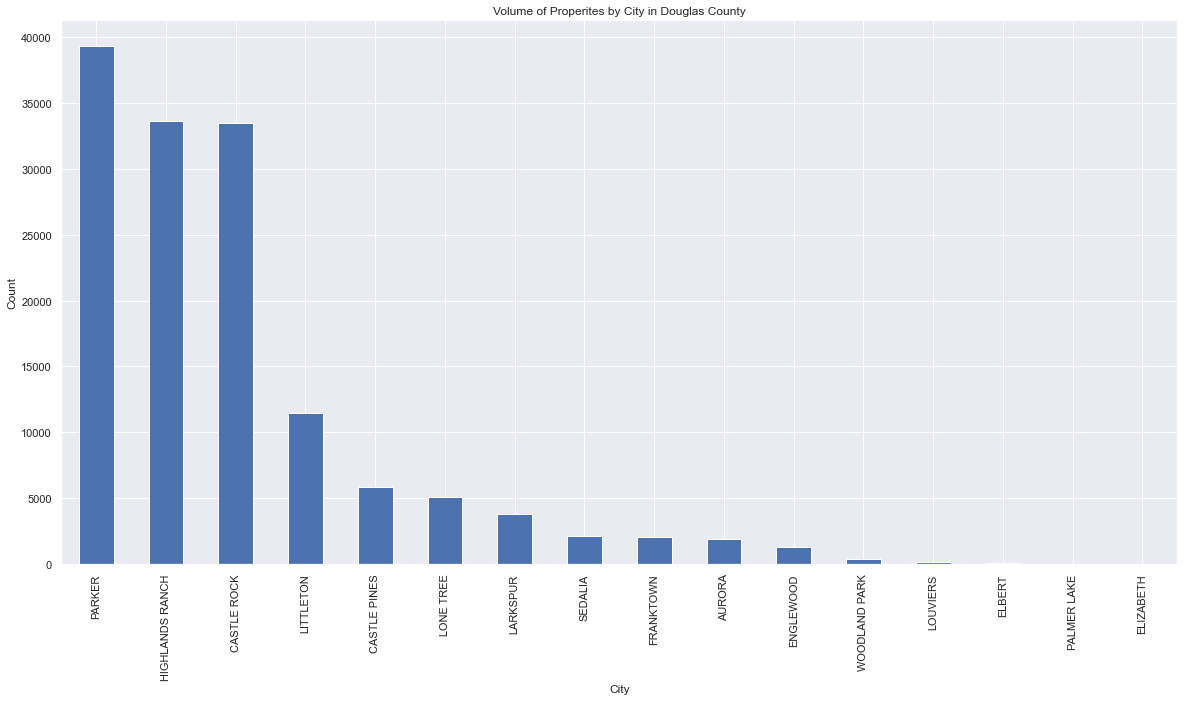

In [112]:
# View visually the numer of accounts by Style
df_loc['City_Name'].value_counts().plot(kind='bar', title = "Volume of Properites by City in Douglas County",
                            xlabel = "City", ylabel = "Count", figsize = (20,10))
plt.show()

In [113]:
# Filter the dataframe for \"Residential\" properties - remove commerical types and leave orginal residential detail.
df_loc_res = df_loc[(df_loc['Account_Type_Code'] == 'Residential')]

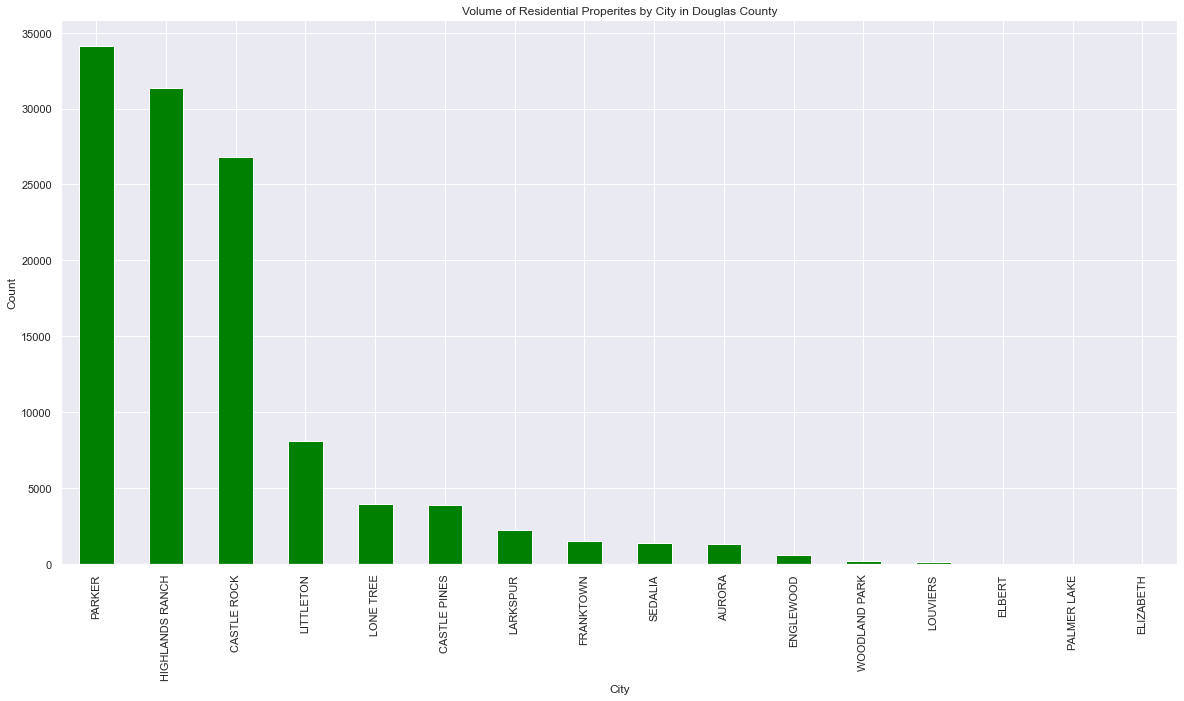

In [114]:
# View visually the numer of accounts by Style
df_loc_res['City_Name'].value_counts().plot(kind='bar',title="Volume of Residential Properites by City in Douglas County",
                                    xlabel = "City", ylabel = "Count", figsize = (20,10), color='green')
plt.show()

In [115]:
# View the unique values
df_loc_res['Account_Type_Code'].unique()

array(['Residential'], dtype=object)

In [116]:
# Check for any duplicated records in the dataframe - specific columns
df_loc_res.duplicated(subset=["Account_No"],keep='first').sum()

58

In [117]:
# Check for any duplicated records in the dataframe - specific columns
df_loc_res.duplicated(subset=["Account_No","Unit_No"],keep='first').sum()

56

In [118]:
# Check for any duplicated records in the dataframe - specific columns
df_loc_res.duplicated(subset=["Account_No","Unit_No","Loc_Full_Address"],keep='first').sum()

0

In [119]:
# extract duplicate records
loc_dups = df_loc_res.duplicated(subset=["Account_No"],keep='first')
loc_dups_list = df_loc_res[loc_dups]
loc_dups_list_acctno = loc_dups_list['Account_No']
df_loc_dups_rec = df_loc_res[df_loc_res.Account_No.isin(loc_dups_list_acctno)].sort_values('Account_No')
df_loc_dups_rec.head(60)

Account_No Account_Type_Code State_Parcel_No Address_No  \
4690    R0000887       Residential    222724000012       9765   
4691    R0000887       Residential    222724000012       9767   
7569    R0042622       Residential    250916000008        156   
7570    R0042622       Residential    250916000008        148   
9488    R0070990       Residential    250511137004        106   
9489    R0070990       Residential    250511137004        110   
9537    R0071503       Residential    250511124003        316   
9538    R0071503       Residential    250511124003        312   
9735    R0073841       Residential    250511132009        207   
9736    R0073841       Residential    250511132009        209   
9810    R0074835       Residential    250511210008        307   
9809    R0074835       Residential    250511210008        305   
9828    R0075070       Residential    250511137001        120   
9829    R0075070       Residential    250511137001        612   
10126   R0078414       Residential    250511105004        602   
10127   R0078414       Residential    250511105004        606   
10128   R0078422       Residential    250511108001        516   
10129   R0078422       Residential    250511108001        518   
10130   R0078422       Residential    250511108001        520   
10286   R0080282       Residential    250511122005        521   
10287   R0080282       Residential    250511122005        515   
10460   R0082413       Residential    250512211004        903   
10459   R0082413       Residential    250512211004        901   
10467   R0082510       Residential    250511117008        411   
10466   R0082510       Residential    250511117008        409   
10787   R0086457       Residential    260733104002        192   
10788   R0086457       Residential    260733104002        170   
14652   R0136629       Residential    234708000003       6305   
14653   R0136629       Residential    234708000003       6237   
16107   R0152194       Residential    250121001007        606   
16108   R0152194       Residential    250121001007        610   
16396   R0156136       Residential    276731303015      15954   
16397   R0156136       Residential    276731303015      15972   
16545   R0157999       Residential    235314402001       5612   
16546   R0157999       Residential    235314402001       5626   
18684   R0217779       Residential    250511136008        109   
18683   R0217779       Residential    250511136008        107   
20481   R0256831       Residential    250703000002       6646   
20482   R0256831       Residential    250703000002       6644   
36944   R0347952       Residential    276730300003      14634   
36945   R0347952       Residential    276730300003      14570   
36946   R0347952       Residential    276730300003      14760   
38031   R0350499       Residential    223311012002       7200   
38032   R0350499       Residential    223311012002       7200   
48201   R0372294       Residential    223521000027      11428   
48202   R0372294       Residential    223521000027      11426   
51779   R0377629       Residential    260733104008       9216   
51780   R0377629       Residential    260733104008        151   
88948   R0428265       Residential    234718000008       9698   
88947   R0428265       Residential    234718000008       9696   
95718   R0437145       Residential    250534001020        100   
95719   R0437145       Residential    250534001020         98   
95720   R0437145       Residential    250534001020         96   
96142   R0438057       Residential    223127201036       9623   
96143   R0438057       Residential    223127201036       9627   
96144   R0438057       Residential    223127201036       9625   
96544   R0438517       Residential    250511109017        656   
96543   R0438517       Residential    250511109017        662   
96546   R0438518       Residential    250511109018        678   
96545   R0438518       Residential    250511109018        670   

      Pre_Directional_Code        Street

### Property Owner (Property_Ownership.txt) - 3

In [120]:
# read the text file into a pandas dataframe - files have no headers
df_own=pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/Property_Ownership.txt', header=None,low_memory=False)

In [121]:
# Set the names of each of the columns as obtained from the Douglas County Asessors Website
# Note - headers are not included in the text file.
df_own.columns = ["Account_No","Owner_Name","Mailing_Address_Line_1","Mailing_Address_Line_2","Mailing_City_Name"
                    ,"Mailing_State","Mailing_Zip_Code"]

In [122]:
# View the shape (rows, columns) of the data frame
df_own.shape

(156734, 7)

In [123]:
# View the datatypes in the data frame
df_own.dtypes

Account_No                object
Owner_Name                object
Mailing_Address_Line_1    object
Mailing_Address_Line_2    object
Mailing_City_Name         object
Mailing_State             object
Mailing_Zip_Code          object
dtype: object

In [124]:
# View the first few rows of the owners dataframe
df_own.head()

Account_No                               Owner_Name Mailing_Address_Line_1  \
0   C0193439          MOUNTAIN VIEW ELECTRIC ASSN INC  C/O PROPERTY TAX DEPT   
1   C0214025  INTERMOUNTAIN RURAL ELECTRICASSOCIATION  C/O PROPERTY TAX DEPT   
2   C0214228                      AT&T COMMUNICATIONS               TAX DEPT   
3   C0214252                        QWEST CORPORATION     1025 ELDORADO BLVD   
4   C0214615         PUBLIC SERVICE CO OF COLO (XCEL)      TAX SERVICES DEPT   

    Mailing_Address_Line_2 Mailing_City_Name Mailing_State Mailing_Zip_Code  
0  PO BOX 1600 1655 5TH ST             LIMON            CO        808281600  
1             P O DRAWER A           SEDALIA            CO            80135  
2      P O BOX 7207 2B112A        BEDMINSTER            NJ            07921  
3                      NaN        BROOMFIELD            CO        800218254  
4             P O BOX 1979            DENVER            CO        802011979

In [125]:
# View the last few rows of the owners dataframe
df_own.tail()

Account_No           Owner_Name Mailing_Address_Line_1  \
156729   R0612570  TOWN OF CASTLE ROCK          100 WILCOX ST   
156730   R0612571  TOWN OF CASTLE ROCK          100 WILCOX ST   
156731   R0612572  TOWN OF CASTLE ROCK          100 WILCOX ST   
156732   R0612573  TOWN OF CASTLE ROCK          100 WILCOX ST   
156733   R0612574  TOWN OF CASTLE ROCK          100 WILCOX ST   

       Mailing_Address_Line_2 Mailing_City_Name Mailing_State Mailing_Zip_Code  
156729                    NaN       CASTLE ROCK            CO        801041907  
156730                    NaN       CASTLE ROCK            CO        801041907  
156731                    NaN       CASTLE ROCK            CO        801041907  
156732                    NaN       CASTLE ROCK            CO        801041907  
156733                    NaN       CASTLE ROCK            CO        801041907

In [126]:
# Check for any duplicated records in the dataframe
df_own.duplicated(subset = ['Account_No'],keep ='first').sum()

0

In [127]:
# View visually the numer of accounts Owner
owners = df_own['Owner_Name'].value_counts().to_frame()

<AxesSubplot:title={'center':'Volume of Properites by Owner in Douglas County'}, xlabel='Owner', ylabel='Count'>

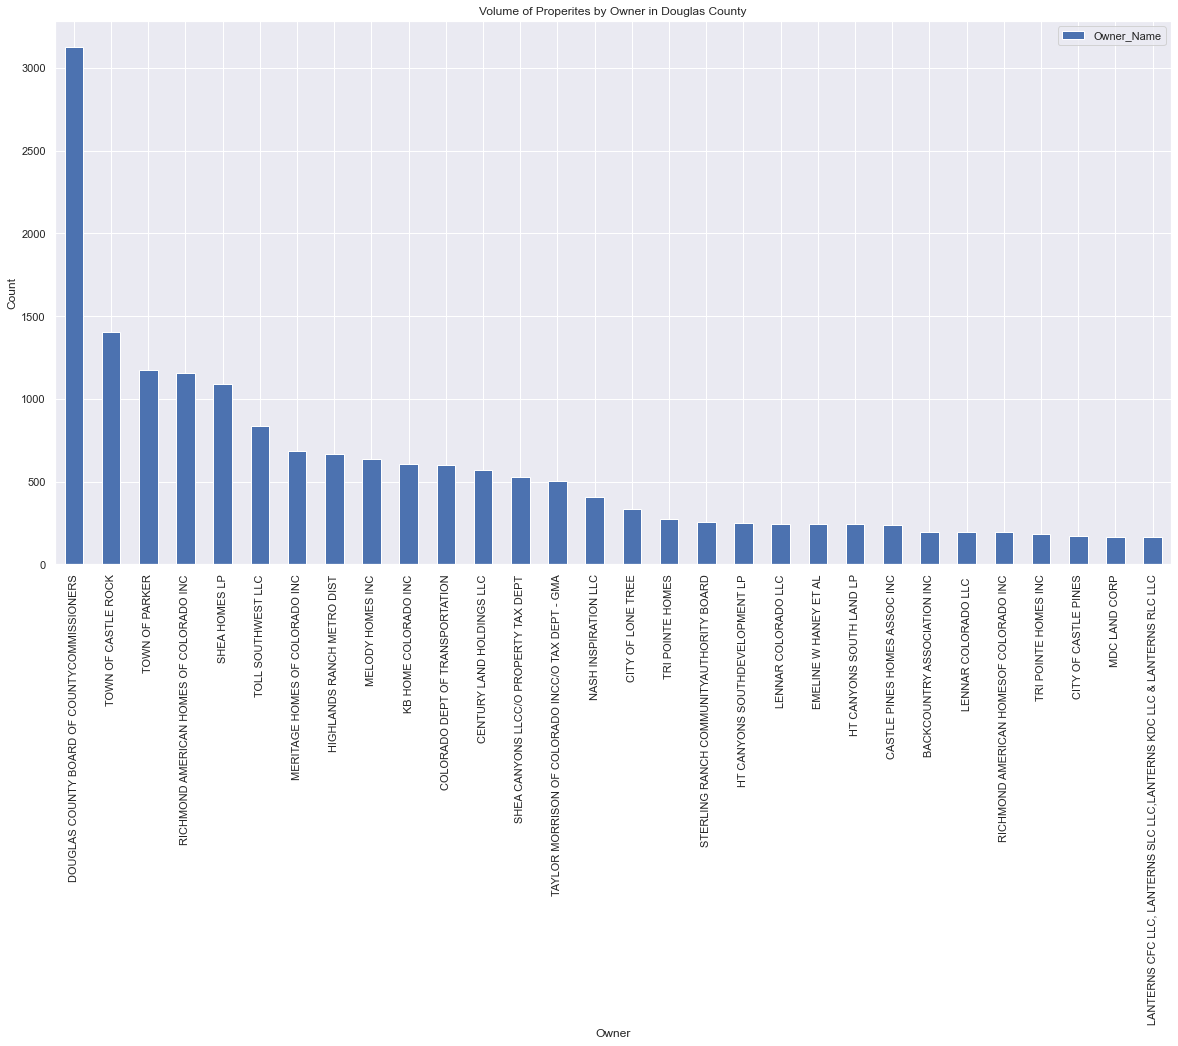

In [128]:
# View the top owners of property in douglas county
owners[0:30].plot(kind='bar', title = "Volume of Properites by Owner in Douglas County",
                  xlabel = "Owner", ylabel = "Count", figsize = (20,10))

### Property Subdivision (Property_Subdivision.txt) - 4

In [129]:
# read the text file into a pandas dataframe - files have no headers
df_sub=pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/Property_Subdivision.txt',
                   header=None,low_memory=False)

In [130]:
# Set the names of each of the columns as obtained from the Douglas County Asessors Website
# Note - headers are not included in the text file.
df_sub.columns = ["Account_No","Sub_Filing_Recording_No","Subdivision_Name","Lot_No","Block_No","Tract_No"]

In [131]:
# View the shape (rows, columns) of the data frame
df_sub.shape

(152280, 6)

In [132]:
# View the datatypes of the subdivision dataframe
df_sub.dtypes

Account_No                 object
Sub_Filing_Recording_No     int64
Subdivision_Name           object
Lot_No                     object
Block_No                   object
Tract_No                   object
dtype: object

In [133]:
# Change the datatype to an Object
df_sub['Sub_Filing_Recording_No'] = df_sub['Sub_Filing_Recording_No'].astype('object')

In [134]:
# View the first few records
df_sub.head()

Account_No Sub_Filing_Recording_No Subdivision_Name Lot_No Block_No Tract_No
0   M0211043                  152884         WOLHURST      0        0        0
1   M0211051                  152884         WOLHURST      0        0        0
2   M0211078                  152884         WOLHURST      0        0        0
3   M0211086                  152884         WOLHURST      0        0        0
4   M0211094                  152884         WOLHURST      0        0        0

In [135]:
# View the last few records
df_sub.tail()

Account_No Sub_Filing_Recording_No Subdivision_Name Lot_No Block_No  \
152275   R0612570              2020115852         LANTERNS    NaN      NaN   
152276   R0612571              2020115852         LANTERNS    NaN      NaN   
152277   R0612572              2020115852         LANTERNS    NaN      NaN   
152278   R0612573              2020115852         LANTERNS    NaN      NaN   
152279   R0612574              2020115852         LANTERNS    NaN      NaN   

       Tract_No  
152275        T  
152276        T  
152277      NaN  
152278      NaN  
152279      NaN

In [136]:
# Check for any duplicated records in the dataframe
df_sub.duplicated(subset = ['Account_No'],keep ='first').sum()

0

In [137]:
# Use Describe to view descriptive statistics on each of the columns.
df_sub.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No  Sub_Filing_Recording_No Subdivision_Name  Lot_No Block_No  \
count      152280                   152280           152280  146430   128165   
unique     152280                     4484              974    4678      332   
top      R0386294                       51  HIGHLANDS RANCH       0        0   
freq            1                     7555            32155   14634    63188   

       Tract_No  
count     14066  
unique      612  
top           0  
freq       4860

In [138]:
# View visually the numer of accounts Owner
subs = df_sub['Subdivision_Name'].value_counts().to_frame()

<AxesSubplot:title={'center':'Top 30 SubDivisions by Volume in Douglas County'}, xlabel='City', ylabel='Count'>

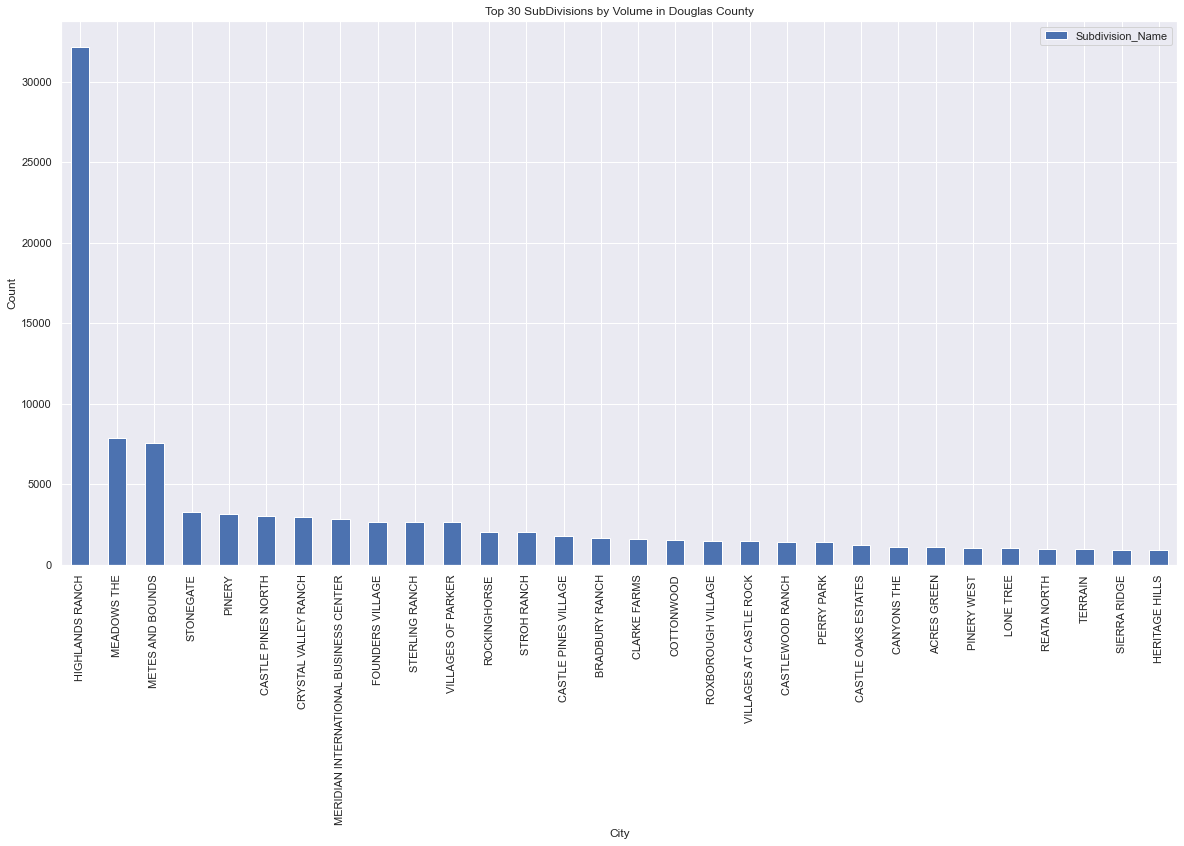

In [139]:
# View the top owners of property in douglas county
subs[0:30].plot(kind='bar', title = "Top 30 SubDivisions by Volume in Douglas County",
                xlabel = "City", ylabel = "Count", figsize = (20,10))

### Property Sales (Property_Sales.txt) - 5

In [140]:
# read the text file into a pandas dataframe - files have no headers
df_sale=pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/Property_Sales.txt', header=None,low_memory=False)

In [141]:
# Set the names of each of the columns as obtained from the Douglas County Asessors Website
# Note - headers are not included in the text file.
df_sale.columns = ["Account_No","Sale_Date","Sale _Price","Deed_Type","Grantor","Grantee","Book","Page","Recording_No"]

In [142]:
# View the shape (rows, columns) of the data frame
df_sale.shape

(587643, 9)

In [143]:
# View the columns in the file
df_sale.columns

Index(['Account_No', 'Sale_Date', 'Sale _Price', 'Deed_Type', 'Grantor',
       'Grantee', 'Book', 'Page', 'Recording_No'],
      dtype='object')

In [144]:
# View the datatypes in the file
df_sale.dtypes

Account_No       object
Sale_Date        object
Sale _Price     float64
Deed_Type        object
Grantor          object
Grantee          object
Book             object
Page             object
Recording_No     object
dtype: object

In [170]:
# Modify the datatype for sale date to a date/time
df_sale['Sale_Date']=pd.to_datetime(df_sale['Sale_Date'])
df_sale.dtypes

Account_No              object
Sale_Date       datetime64[ns]
Sale_Price             float64
Deed_Type               object
Grantor                 object
Grantee                 object
Book                    object
Page                    object
Recording_No            object
dtype: object

In [171]:
# Sort the dataframe
df_sale.sort_values(['Account_No','Sale_Date'])

Account_No  Sale_Date  Sale_Price          Deed_Type  \
0        M0211043 2012-08-10     55000.0  Manufactured Home   
1        M0211078 2014-07-15     45000.0  Manufactured Home   
2        M0211086 2012-11-08     22000.0  Manufactured Home   
3        M0211086 2014-11-10     30000.0  Manufactured Home   
4        M0211107 2009-08-28      3800.0  Manufactured Home   
...           ...        ...         ...                ...   
587638   R0612214 2020-01-24         0.0     Bargain & Sale   
587639   R0612215 2020-01-24         0.0     Bargain & Sale   
587640   R0612216 2020-01-24         0.0     Bargain & Sale   
587641   R0612217 2020-01-24         0.0     Bargain & Sale   
587642   R0612218 2020-01-24         0.0     Bargain & Sale   

                                              Grantor  \
0                                     RUBY L ANDERSON   
1                   ROBERT L MOUNT & VIRGINIA M MOUNT   
2                 ROBERT GOETSCHEL & BILLIE GOETSCHEL   
3                                          JUDY SMITH   
4       SCOTT & MARCIA J MCEACHRON TRUST DATED DEC 98   
...                                               ...   
587638                         DFC STERLING RANCH LLC   
587639                         DFC STERLING RANCH LLC   
587640                         DFC STERLING RANCH LLC   
587641                         DFC STERLING RANCH LLC   
587642                         DFC STERLING RANCH LLC   

                                         Grantee Book Page Recording_No  
0                BRUCE E MILLER & NANCY J MILLER  NaN  NaN   2013033317  
1                     GREGORY CRUM & SHEILA CRUM  NaN  NaN   2014043178  
2                                     JUDY SMITH  NaN  NaN   2012085946  
3                              CAROLYN LEE COOKE  NaN  NaN   2014068250  
4            DANIEL J HEIMER & KATHLEEN S HEIMER  NaN  NaN   2009068937  
...                                          ...  ...  ...          ...  
587638  STERLING RANCH COMMUNITY AUTHORITY BOARD  NaN  NaN   2020120482  
587639  STERLING RANCH COMMUNITY AUTHORITY BOARD  NaN  NaN   2020120482  
587640  STERLING RANCH COMMUNITY AUTHORITY BOARD  NaN  NaN   2020120482  
587641  STERLING RANCH COMMUNITY AUTHORITY BOARD  NaN  NaN   2020120482  
587642  STERLING RANCH COMMUNITY AUTHORITY BOARD  NaN  NaN   2020120482  

[587643 rows x 9 columns]

In [172]:
# View the first few rows of the dataframe
df_sale.head()

Account_No  Sale_Date  Sale_Price          Deed_Type  \
0   M0211043 2012-08-10     55000.0  Manufactured Home   
1   M0211078 2014-07-15     45000.0  Manufactured Home   
2   M0211086 2012-11-08     22000.0  Manufactured Home   
3   M0211086 2014-11-10     30000.0  Manufactured Home   
4   M0211107 2009-08-28      3800.0  Manufactured Home   

                                         Grantor  \
0                                RUBY L ANDERSON   
1              ROBERT L MOUNT & VIRGINIA M MOUNT   
2            ROBERT GOETSCHEL & BILLIE GOETSCHEL   
3                                     JUDY SMITH   
4  SCOTT & MARCIA J MCEACHRON TRUST DATED DEC 98   

                               Grantee Book Page Recording_No  
0      BRUCE E MILLER & NANCY J MILLER  NaN  NaN   2013033317  
1           GREGORY CRUM & SHEILA CRUM  NaN  NaN   2014043178  
2                           JUDY SMITH  NaN  NaN   2012085946  
3                    CAROLYN LEE COOKE  NaN  NaN   2014068250  
4  DANIEL J HEIMER & KATHLEEN S HEIMER  NaN  NaN   2009068937

In [173]:
# View the last few rows of the dataframe
df_sale.tail()

Account_No  Sale_Date  Sale_Price       Deed_Type  \
587638   R0612214 2020-01-24         0.0  Bargain & Sale   
587639   R0612215 2020-01-24         0.0  Bargain & Sale   
587640   R0612216 2020-01-24         0.0  Bargain & Sale   
587641   R0612217 2020-01-24         0.0  Bargain & Sale   
587642   R0612218 2020-01-24         0.0  Bargain & Sale   

                       Grantor                                   Grantee Book  \
587638  DFC STERLING RANCH LLC  STERLING RANCH COMMUNITY AUTHORITY BOARD  NaN   
587639  DFC STERLING RANCH LLC  STERLING RANCH COMMUNITY AUTHORITY BOARD  NaN   
587640  DFC STERLING RANCH LLC  STERLING RANCH COMMUNITY AUTHORITY BOARD  NaN   
587641  DFC STERLING RANCH LLC  STERLING RANCH COMMUNITY AUTHORITY BOARD  NaN   
587642  DFC STERLING RANCH LLC  STERLING RANCH COMMUNITY AUTHORITY BOARD  NaN   

       Page Recording_No  
587638  NaN   2020120482  
587639  NaN   2020120482  
587640  NaN   2020120482  
587641  NaN   2020120482  
587642  NaN   2020120482

In [174]:
# Use Describe to view descriptive statistics on each of the columns.
df_sale.describe(include=['object','float64','int64','datetime64[ns]'], datetime_is_numeric=True)

Account_No                      Sale_Date    Sale_Price      Deed_Type  \
count      587643                         587643  5.876430e+05         587643   
unique     139197                            NaN           NaN             45   
top      R0393550                            NaN           NaN  Warranty Deed   
freq           40                            NaN           NaN         219627   
mean          NaN  2004-09-14 05:35:52.398706816  6.607664e+05            NaN   
min           NaN            1880-07-05 00:00:00  0.000000e+00            NaN   
25%           NaN            1997-10-04 00:00:00  0.000000e+00            NaN   
50%           NaN            2004-08-06 00:00:00  1.839000e+05            NaN   
75%           NaN            2013-05-30 00:00:00  3.900000e+05            NaN   
max           NaN            2029-11-24 00:00:00  2.700000e+08            NaN   
std           NaN                            NaN  2.605629e+06            NaN   

                 Grantor                                  Grantee    Book  \
count             587640                                   587612  244195   
unique            277148                                   368680    2315   
top     MISSION VIEJO CO  RICHMOND AMERICAN HOMES OF COLORADO INC    1470   
freq               20291                                     8918    2934   
mean                 NaN                                      NaN     NaN   
min                  NaN                                      NaN     NaN   
25%                  NaN                                      NaN     NaN   
50%                  NaN                                      NaN     NaN   
75%                  NaN                                      NaN     NaN   
max                  NaN                                      NaN     NaN   
std                  NaN                                      NaN     NaN   

          Page Recording_No  
count   244184       587641  
unique    3930       458507  
top       1312      9755353  
freq      2861         2779  
mean       NaN          NaN  
min        NaN          NaN  
25%        NaN          NaN  
50%        NaN          NaN  
75%        NaN          NaN  
max        NaN          NaN  
std        NaN          NaN

In [175]:
# Rename columns to remove spaces
df_sale.rename(columns = {'Sale _Price':'Sale_Price'}, inplace = True)
df_sale.columns

Index(['Account_No', 'Sale_Date', 'Sale_Price', 'Deed_Type', 'Grantor',
       'Grantee', 'Book', 'Page', 'Recording_No'],
      dtype='object')

In [176]:
# View the unique values in deed type
df_sale['Deed_Type'].unique()

array(['Manufactured Home', "Personal Representative's",
       'Re-Recorded Deed', 'Correction Deed', 'Warranty Deed Joint',
       'Warranty Deed', "Public Trustee's Deed", 'Special Warranty Deed',
       'Bargain & Sale', 'Bill of Sale', 'Bargain & Sale Common',
       'Bargain & Sale Joint', "Conservator's Deed", 'Quit Claim',
       'Quit Claim Common', 'Quit Claim Joint', 'Unknown', 'Deed J',
       'Beneficiary Deed', "Personal Representative's Common",
       'Special Warranty Deed Joint', "Trustee's Deed",
       "Treasurer's Deed", "Personal Representative's Joint",
       'Court Decree/Order', 'Warranty Deed Common', 'Court Order',
       'Special Warranty Deed Common', 'Guardian Deed', 'Grant Deed',
       "Administrator's Deed", 'Deed C', "Sheriff's Deed",
       'Certificate of Merger', 'Deed in Lieu of Foreclosure',
       'Grant Deed Common', 'Grant Deed Joint',
       "Public Trustee's Deed Joint", "Public Trustee's Deed Common",
       'Mineral Deed', 'Patent', 'Judge

In [177]:
# Check for any duplicated records in the dataframe
df_sale.duplicated(subset = ['Account_No'],keep ='first').sum()

448446

In [178]:
# Check for any duplicated records in the dataframe
df_sale.duplicated(subset = ['Account_No','Sale_Date'],keep ='first').sum()

29239

In [179]:
# Check for any duplicated records in the dataframe
df_sale.duplicated(subset = ['Account_No','Sale_Date','Deed_Type',],keep ='first').sum()

13711

In [180]:
# Check for any duplicated records in the dataframe
df_sale.duplicated(subset = ['Account_No','Sale_Date','Deed_Type','Grantor'],keep ='first').sum()

4573

In [181]:
# Check for any duplicated records in the dataframe
df_sale.duplicated(subset = ['Account_No','Sale_Date','Deed_Type','Grantor','Grantee'],keep ='first').sum()

1681

In [182]:
# Check for any duplicated records in the dataframe
df_sale.duplicated(subset = ['Account_No','Sale_Date','Deed_Type','Grantor','Grantee','Sale_Price'],keep ='first').sum()

1136

In [183]:
# Check for any duplicated records in the dataframe
df_sale.duplicated(subset = ['Account_No','Sale_Date','Deed_Type','Grantor','Grantee','Sale_Price','Recording_No'],
                   keep ='first').sum()

0

In [184]:
# Check for any duplicated records in the dataframe
df_sale.duplicated(subset = ['Account_No','Recording_No'], keep ='first').sum()

0

In [185]:
# Create a column for the Number of Sales for that Account/Property
acct_no_sales = df_sale['Account_No'].value_counts().to_frame()
acct_no_sales.reset_index(inplace=True)
acct_no_sales.rename(columns={'Account_No':'No_of_Sales' },inplace = True)
acct_no_sales = acct_no_sales.rename(columns = {'index':'Account_No'})
acct_no_sales

Account_No  No_of_Sales
0        R0393550           40
1        R0337061           37
2        R0415801           34
3        R0447909           29
4        R0447769           28
...           ...          ...
139192   R0440445            1
139193   R0607273            1
139194   R0477179            1
139195   R0606380            1
139196   R0479288            1

[139197 rows x 2 columns]

In [186]:
# Get the min sales price with associated columns
acct_min_sale = df_sale.loc[df_sale.groupby('Account_No').Sale_Price.idxmin()].reset_index(drop=True)
acct_min_sale_col = acct_min_sale[['Account_No','Sale_Date','Sale_Price']]
acct_min_sale_col.columns = ['Account_No','Sale_Date_toMin','Sale_Price_Min']
acct_min_sale_col

Account_No Sale_Date_toMin  Sale_Price_Min
0        M0211043      2012-08-10         55000.0
1        M0211078      2014-07-15         45000.0
2        M0211086      2012-11-08         22000.0
3        M0211107      2009-08-28          3800.0
4        M0211115      2013-10-03             0.0
...           ...             ...             ...
139192   R0612214      2020-01-24             0.0
139193   R0612215      2020-01-24             0.0
139194   R0612216      2020-01-24             0.0
139195   R0612217      2020-01-24             0.0
139196   R0612218      2020-01-24             0.0

[139197 rows x 3 columns]

In [187]:
# Get the max sales price with associated columns
acct_max_sale = df_sale.loc[df_sale.groupby('Account_No').Sale_Price.idxmax()]
acct_max_sale_col = acct_max_sale[['Account_No','Sale_Date','Sale_Price']]
acct_max_sale_col.columns = ['Account_No','Sale_Date_toMax','Sale_Price_Max']
acct_max_sale_col

Account_No Sale_Date_toMax  Sale_Price_Max
0        M0211043      2012-08-10         55000.0
1        M0211078      2014-07-15         45000.0
3        M0211086      2014-11-10         30000.0
4        M0211107      2009-08-28          3800.0
7        M0211115      2017-08-29         63000.0
...           ...             ...             ...
587638   R0612214      2020-01-24             0.0
587639   R0612215      2020-01-24             0.0
587640   R0612216      2020-01-24             0.0
587641   R0612217      2020-01-24             0.0
587642   R0612218      2020-01-24             0.0

[139197 rows x 3 columns]

In [188]:
# Get the original sale date of the property
acct_min_sale_dt = df_sale.loc[df_sale.groupby('Account_No').Sale_Date.idxmin()]
acct_min_sale_dt_col = acct_min_sale_dt[['Account_No','Sale_Date','Sale_Price']]
acct_min_sale_dt_col.columns = ['Account_No','Min_Sale_Date','Sale_Price_toMin']
acct_min_sale_dt_col

Account_No Min_Sale_Date  Sale_Price_toMin
0        M0211043    2012-08-10           55000.0
1        M0211078    2014-07-15           45000.0
2        M0211086    2012-11-08           22000.0
4        M0211107    2009-08-28            3800.0
5        M0211115    2013-10-03               0.0
...           ...           ...               ...
587638   R0612214    2020-01-24               0.0
587639   R0612215    2020-01-24               0.0
587640   R0612216    2020-01-24               0.0
587641   R0612217    2020-01-24               0.0
587642   R0612218    2020-01-24               0.0

[139197 rows x 3 columns]

In [189]:
# Get the last sale date of the property
acct_max_sale_dt = df_sale.loc[df_sale.groupby('Account_No').Sale_Date.idxmax()]
acct_max_sale_dt_col = acct_max_sale_dt[['Account_No','Sale_Date','Sale_Price']]
acct_max_sale_dt_col.columns = ['Account_No','Max_Sale_Date','Sale_Price_toMax']
acct_max_sale_dt_col

Account_No Max_Sale_Date  Sale_Price_toMax
0        M0211043    2012-08-10           55000.0
1        M0211078    2014-07-15           45000.0
3        M0211086    2014-11-10           30000.0
4        M0211107    2009-08-28            3800.0
7        M0211115    2017-08-29           63000.0
...           ...           ...               ...
587638   R0612214    2020-01-24               0.0
587639   R0612215    2020-01-24               0.0
587640   R0612216    2020-01-24               0.0
587641   R0612217    2020-01-24               0.0
587642   R0612218    2020-01-24               0.0

[139197 rows x 3 columns]

In [190]:
# Joing the new sale df's into a single df for Sales
df_sale_det = pd.merge((pd.merge((pd.merge((pd.merge(acct_no_sales, acct_min_sale_col, how="left", on="Account_No"))
                    ,acct_max_sale_col, how="left", on="Account_No"))
                    ,acct_min_sale_dt_col, how="left", on="Account_No"))
                    ,acct_max_sale_dt_col, how="left", on="Account_No")
df_sale_det

Account_No  No_of_Sales Sale_Date_toMin  Sale_Price_Min  \
0        R0393550           40      2000-04-19             0.0   
1        R0337061           37      2018-10-16             0.0   
2        R0415801           34      2002-12-27             0.0   
3        R0447909           29      2003-09-25             0.0   
4        R0447769           28      2003-09-25             0.0   
...           ...          ...             ...             ...   
139192   R0440445            1      2007-12-21        490300.0   
139193   R0607273            1      2019-09-12       5190000.0   
139194   R0477179            1      2018-01-18      18750000.0   
139195   R0606380            1      2019-08-23       3734300.0   
139196   R0479288            1      2014-03-25        970700.0   

       Sale_Date_toMax  Sale_Price_Max Min_Sale_Date  Sale_Price_toMin  \
0           1999-08-31        875000.0    1987-02-05               0.0   
1           2018-10-16       3100000.0    1988-11-21               0.0   
2           2002-12-20       2500000.0    1998-12-30          480000.0   
3           2004-04-29       2275000.0    2003-09-18               0.0   
4           2004-07-06       3087000.0    2003-09-18               0.0   
...                ...             ...           ...               ...   
139192      2007-12-21        490300.0    2007-12-21          490300.0   
139193      2019-09-12       5190000.0    2019-09-12         5190000.0   
139194      2018-01-18      18750000.0    2018-01-18        18750000.0   
139195      2019-08-23       3734300.0    2019-08-23         3734300.0   
139196      2014-03-25        970700.0    2014-03-25          970700.0   

       Max_Sale_Date  Sale_Price_toMax  
0         2020-04-02               0.0  
1         2018-10-16         3100000.0  
2         2018-11-30          183600.0  
3         2020-10-15               0.0  
4         2020-04-21               0.0  
...              ...               ...  
139192    2007-12-21          490300.0  
139193    2019-09-12         5190000.0  
139194    2018-01-18        18750000.0  
139195    2019-08-23         3734300.0  
139196    2014-03-25          970700.0  

[139197 rows x 10 columns]

In [191]:
# Check for any duplicated records in the dataframe
df_sale_det.duplicated(subset = ['Account_No'],keep ='first').sum()

0

In [192]:
# Use Describe to view descriptive statistics on each of the columns.
df_sale_det.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Account_No    No_of_Sales                Sale_Date_toMin  \
count      139197  139197.000000                         139197   
unique     139197            NaN                            NaN   
top      R0386294            NaN                            NaN   
freq            1            NaN                            NaN   
mean          NaN       4.221664  2005-10-10 17:31:28.876925184   
min           NaN       1.000000            1880-07-05 00:00:00   
25%           NaN       2.000000            2000-02-15 00:00:00   
50%           NaN       4.000000            2006-01-05 00:00:00   
75%           NaN       6.000000            2014-03-26 00:00:00   
max           NaN      40.000000            2029-11-24 00:00:00   
std           NaN       2.808665                            NaN   

        Sale_Price_Min                Sale_Date_toMax  Sale_Price_Max  \
count     1.391970e+05                         139197    1.391970e+05   
unique             NaN                            NaN             NaN   
top                NaN                            NaN             NaN   
freq               NaN                            NaN             NaN   
mean      4.314810e+05  2007-06-21 02:53:00.637529856    2.010428e+06   
min       0.000000e+00            1880-07-05 00:00:00    0.000000e+00   
25%       0.000000e+00            2000-02-21 00:00:00    2.590000e+05   
50%       0.000000e+00            2007-06-22 00:00:00    4.750000e+05   
75%       1.958000e+05            2016-10-31 00:00:00    1.504500e+06   
max       2.700000e+08            2021-01-28 00:00:00    2.700000e+08   
std       2.676661e+06                            NaN    4.844156e+06   

                        Min_Sale_Date  Sale_Price_toMin  \
count                          139197      1.391970e+05   
unique                            NaN               NaN   
top                               NaN               NaN   
freq                              NaN               NaN   
mean    1999-10-24 20:32:26.214398848      1.496856e+06   
min               1880-07-05 00:00:00      0.000000e+00   
25%               1992-11-13 00:00:00      2.050000e+04   
50%               1999-10-21 00:00:00      2.000000e+05   
75%               2007-02-09 00:00:00      8.300000e+05   
max               2021-01-27 00:00:00      2.700000e+08   
std                               NaN      4.149305e+06   

                        Max_Sale_Date  Sale_Price_toMax  
count                          139197      1.391970e+05  
unique                            NaN               NaN  
top                               NaN               NaN  
freq                              NaN               NaN  
mean    2012-05-06 08:04:56.075291904      7.545203e+05  
min               1880-07-05 00:00:00      0.000000e+00  
25%               2007-06-05 00:00:00      0.000000e+00  
50%               2015-07-27 00:00:00      3.059450e+05  
75%               2018-12-03 00:00:00      4.937000e+05  
max               2029-11-24 00:00:00      2.700000e+08  
std                               NaN      3.482118e+06

In [193]:
# Check for the number of "Nan" values in each column of the dataframe
df_sale_det.isna().sum()

Account_No          0
No_of_Sales         0
Sale_Date_toMin     0
Sale_Price_Min      0
Sale_Date_toMax     0
Sale_Price_Max      0
Min_Sale_Date       0
Sale_Price_toMin    0
Max_Sale_Date       0
Sale_Price_toMax    0
dtype: int64

### Property Filings (Property_Filing.txt) - 6

In [194]:
# read the text file into a pandas dataframe - files have no headers
df_file=pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/Property_Filing.txt', header=None,low_memory=False)

In [195]:
# Set the names of each of the columns as obtained from the Douglas County Asessors Website
# Note - headers are not included in the text file.
df_file.columns = ["Sub_Filing_Recording_No","Subdivision_Name","Filing_No","Filing_Descr"]

In [196]:
# View the shape (rows, columns) of the data frame
df_file.shape

(4871, 4)

In [197]:
# View the first few records
df_file.head()

Sub_Filing_Recording_No           Subdivision_Name Filing_No Filing_Descr
0                 0000001            SEDALIA TOWN OF         0          NaN
1                 0000002                  PEMBERTON         0          NaN
2                 0000003                  PEMBERTON         0          NaN
3                 0000004  CRAIG AND GOULDS ADDITION         0          NaN
4                 0000005                  PEMBERTON         0          NaN

In [198]:
# View the last few records
df_file.tail()

Sub_Filing_Recording_No                        Subdivision_Name  \
4866                99104313               PEASLEE MINOR DEVELOPMENT   
4867                99104981  MERIDIAN INTERNATIONAL BUSINESS CENTER   
4868                99105025                         HIGHLANDS RANCH   
4869                99106546                               STONEGATE   
4870                99107833                       REWARD CENTER THE   

     Filing_No Filing_Descr  
4866         1          NaN  
4867         6          NaN  
4868       138          NaN  
4869         2  AMENDMENT 6  
4870         0          NaN

In [199]:
# View the data types in the dataframe
df_file.dtypes

Sub_Filing_Recording_No    object
Subdivision_Name           object
Filing_No                  object
Filing_Descr               object
dtype: object

In [200]:
# Use Describe to view descriptive statistics on each of the columns.
df_file.describe(include=['object','float64','int64','datetime64[ns]'])

Sub_Filing_Recording_No Subdivision_Name Filing_No Filing_Descr
count                     4871             4871      4871         2710
unique                    4871             1017       475          649
top                 2007090968  HIGHLANDS RANCH         0  AMENDMENT 1
freq                         1              581      1836          563

In [201]:
# Check for any duplicated records in the dataframe
df_file.duplicated(keep ='first').sum()

0

In [202]:
# Check for any duplicated records in the dataframe by column
df_file.duplicated('Sub_Filing_Recording_No',keep ='first').sum()

0

In [203]:
# View the unique values for a column (subdivision name)
df_file['Subdivision_Name'].unique()

array(['SEDALIA TOWN OF', 'PEMBERTON', 'CRAIG AND GOULDS ADDITION', ...,
       'VETTERS PIKES PEAK', 'TRAILSIDE VILLAGE', 'REWARD CENTER THE'],
      dtype=object)

### Property Values (Property_Values.txt) - 7

In [204]:
# read the text file into a pandas dataframe - files have no headers
df_value=pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/Property_Values.txt', header=None,low_memory=False)

In [205]:
# Set the names of each of the columns as obtained from the Douglas County Asessors Website
# Note - headers are not included in the text file.
df_value.columns = ["Account_No","Actual_Value","Assessed_Value","Valuation_Class_Code","Valuation_Description"
                    ,"Exempt_Flag","Account_Subtype_Code","Valuation_Type_Code","Account_Type_Code"]

In [206]:
# View the shape (rows, columns) of the data frame
df_value.shape

(281735, 9)

In [207]:
# View the first few records
df_value.head()

Account_No  Actual_Value  Assessed_Value Valuation_Class_Code  \
0   C0193439           0.0             0.0                 8451   
1   C0193439           0.0             0.0                 8251   
2   C0214025           0.0             0.0                 8451   
3   C0214025           0.0             0.0                 8251   
4   C0214228           0.0             0.0                 8240   

                    Valuation_Description Exempt_Flag Account_Subtype_Code  \
0         RURAL ELECTRIC COMPANIES - PERS           N                State   
1         RURAL ELECTRIC COMPANIES - REAL           N                State   
2         RURAL ELECTRIC COMPANIES - PERS           N                State   
3         RURAL ELECTRIC COMPANIES - REAL           N                State   
4  GENERAL TELEPHONE AND TELEGRAPH - REAL           N                State   

  Valuation_Type_Code Account_Type_Code  
0                   P    State Assessed  
1                   I    State Assessed  
2                   P    State Assessed  
3                   I    State Assessed  
4                   I    State Assessed

In [208]:
# View the last few records
df_value.tail()

Account_No  Actual_Value  Assessed_Value Valuation_Class_Code  \
281730   R0612570           0.0             0.0                 9999   
281731   R0612571           0.0             0.0                 9999   
281732   R0612572           0.0             0.0                 9999   
281733   R0612573           0.0             0.0                 9999   
281734   R0612574           0.0             0.0                 9999   

           Valuation_Description Exempt_Flag Account_Subtype_Code  \
281730  DUMMY EXEMPT-INTEGRATION           N                 Real   
281731  DUMMY EXEMPT-INTEGRATION           N                 Real   
281732  DUMMY EXEMPT-INTEGRATION           N                 Real   
281733  DUMMY EXEMPT-INTEGRATION           N                 Real   
281734  DUMMY EXEMPT-INTEGRATION           N                 Real   

       Valuation_Type_Code Account_Type_Code  
281730                   L       Vacant Land  
281731                   L       Vacant Land  
281732                   L       Vacant Land  
281733                   L       Vacant Land  
281734                   L       Vacant Land

In [209]:
# view the data types of the dataframe
df_value.dtypes

Account_No                object
Actual_Value             float64
Assessed_Value           float64
Valuation_Class_Code      object
Valuation_Description     object
Exempt_Flag               object
Account_Subtype_Code      object
Valuation_Type_Code       object
Account_Type_Code         object
dtype: object

In [210]:
# Use Describe to view descriptive statistics on each of the columns.
df_value.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No  Actual_Value  Assessed_Value Valuation_Class_Code  \
count      281735  2.817350e+05    2.817350e+05               281735   
unique     156482           NaN             NaN                  306   
top      R0605376           NaN             NaN                 1212   
freq            7           NaN             NaN               102287   
mean          NaN  2.767647e+05    3.054423e+04                  NaN   
std           NaN  1.357757e+06    3.527846e+05                  NaN   
min           NaN  0.000000e+00    0.000000e+00                  NaN   
25%           NaN  8.041700e+04    6.190000e+03                  NaN   
50%           NaN  1.422010e+05    1.520000e+04                  NaN   
75%           NaN  3.647425e+05    2.683000e+04                  NaN   
max           NaN  2.350649e+08    6.816883e+07                  NaN   

           Valuation_Description Exempt_Flag Account_Subtype_Code  \
count                     281735      281735               281735   
unique                       282           2                    3   
top     SINGLE FAMILY RES - IMPS           N                 Real   
freq                      102287      270301               277338   
mean                         NaN         NaN                  NaN   
std                          NaN         NaN                  NaN   
min                          NaN         NaN                  NaN   
25%                          NaN         NaN                  NaN   
50%                          NaN         NaN                  NaN   
75%                          NaN         NaN                  NaN   
max                          NaN         NaN                  NaN   

       Valuation_Type_Code Account_Type_Code  
count               281735            281735  
unique                   3                15  
top                      L       Residential  
freq                151946            234760  
mean                   NaN               NaN  
std                    NaN               NaN  
min                    NaN               NaN  
25%                    NaN               NaN  
50%                    NaN               NaN  
75%                    NaN               NaN  
max                    NaN               NaN

In [211]:
# Check for any duplicated records in the dataframe
df_value.duplicated(subset = ['Account_No'],keep ='first').sum()

125253

In [212]:
# Check for any duplicated records in the dataframe
df_value.duplicated(subset = ['Account_No','Valuation_Type_Code'],keep ='first').sum()

5741

In [213]:
# Check for any duplicated records in the dataframe
df_value.duplicated(subset = ['Account_No','Valuation_Type_Code','Account_Type_Code'],keep ='first').sum()

5741

In [214]:
# Check for any duplicated records in the dataframe
df_value.duplicated(subset = ['Account_No','Valuation_Type_Code','Account_Type_Code','Account_Subtype_Code'],
                    keep ='first').sum()

5741

In [215]:
# Check for any duplicated records in the dataframe
df_value.duplicated(subset = ['Account_No','Valuation_Type_Code','Account_Type_Code','Account_Subtype_Code',
                              'Valuation_Class_Code'], keep ='first').sum()

3

In [217]:
# Check for any duplicated records in the dataframe
df_value.duplicated(subset = ['Account_No','Valuation_Type_Code','Account_Type_Code','Account_Subtype_Code',
                              'Valuation_Class_Code', 'Exempt_Flag','Valuation_Description'], keep ='first').sum()

3

In [218]:
# Check for any duplicated records in the dataframe
df_value.duplicated(subset = ['Account_No','Valuation_Type_Code','Account_Type_Code','Account_Subtype_Code',
                              'Valuation_Class_Code', 'Exempt_Flag','Valuation_Description','Assessed_Value'],
                    keep ='first').sum()

0

In [221]:
# Check for any duplicated records in the dataframe
df_value.duplicated(subset = ['Account_No','Valuation_Class_Code','Assessed_Value'],
                    keep ='first').sum()

0

In [222]:
# view the column names of the dataframe
df_value.columns

Index(['Account_No', 'Actual_Value', 'Assessed_Value', 'Valuation_Class_Code',
       'Valuation_Description', 'Exempt_Flag', 'Account_Subtype_Code',
       'Valuation_Type_Code', 'Account_Type_Code'],
      dtype='object')

In [223]:
# View the unique values of the column
df_value['Account_Type_Code'].unique()

array(['State Assessed', 'Mobile Home', 'Exempt', 'Personal', 'Leasing',
       'Vacant Land', 'Residential', 'Industrial', 'Commercial',
       'Severed Int', 'Agricultural', 'HOA', 'Producing Mine',
       'Utilities', 'Possessory Int'], dtype=object)

In [224]:
# View the unique values of the column
df_value['Account_Subtype_Code'].unique()

array(['State', 'Real', 'Personal'], dtype=object)

In [225]:
# View the unique values of the column
df_value['Valuation_Description'].unique()

array(['RURAL ELECTRIC COMPANIES - PERS',
       'RURAL ELECTRIC COMPANIES - REAL',
       'GENERAL TELEPHONE AND TELEGRAPH - REAL',
       'GENERAL TELEPHONE & TELEGRAPH - PERS',
       'ELECTRIC COMPANIES - REAL', 'ELECTRIC COMPANIES - PERS',
       'GAS TRANSMISSION PIPELINE - PERS',
       'GAS TRANSMISSION PIPELINE - REAL',
       'RAIL CAR LINE COMPANIES - REAL', 'RAIL CAR LINE COMPANIES - PERS',
       'PETROCHEMICAL PIPELINE COMPANIES - PERS',
       'PETROCHEMICAL PIPELINE COMPANIES - REAL',
       'INDEPENDENT TELEPHONE COMPANIES - REAL',
       'INDEPENDENT TELEPHONE COMPANIES - PERS',
       'RADIO MOBILE TELEPHONE COMPANIES - REAL',
       'RADIO MOBILE TELEPHONE COMPANIES - PERS',
       'AIRLINE COMPANIES - REAL', 'AIRLINE COMPANIES - PERS',
       'TOTAL TELEPHONE & TELEGRAPH - PERS',
       'TOTAL TELEPHONE & TELEGRAPH - REAL',
       'COMMON CARRIERS REGULAR PROPERTY - REAL',
       'COMMON CARRIERS REGULAR PROPERTY - PERS', 'TELEPHONE RESELLERS',
       'MFG HOUSING 

In [226]:
# View unique values in valuation type
df_value['Valuation_Type_Code'].unique()

array(['P', 'I', 'L'], dtype=object)

In [227]:
# Filter to specific rows based on a column value (Residential records)
df_val_res = df_value[(df_value['Account_Type_Code'] == 'Residential') 
                            & (df_value['Valuation_Description'] == ('SINGLE FAMILY RES - IMPS'))] 

df_val_res.shape

(102016, 9)

In [228]:
# View the unique values of the column
df_val_res['Valuation_Description'].unique()

array(['SINGLE FAMILY RES - IMPS'], dtype=object)

In [229]:
# View unique values in account subtype
df_val_res['Account_Subtype_Code'].unique()

array(['Real'], dtype=object)

In [230]:
# I = Improvement, P = Property, L = Land
df_val_res['Valuation_Type_Code'].unique()

array(['I'], dtype=object)

In [231]:
# Check for any duplicated records in the dataframe
df_val_res.duplicated(subset = ['Account_No'],keep ='first').sum()

0

In [232]:
# Use Describe to view descriptive statistics on each of the columns.
df_val_res.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No  Actual_Value  Assessed_Value Valuation_Class_Code  \
count      102016  1.020160e+05   102016.000000               102016   
unique     102016           NaN             NaN                    1   
top      R0386294           NaN             NaN                 1212   
freq            1           NaN             NaN               102016   
mean          NaN  4.261631e+05    30470.663425                  NaN   
std           NaN  1.828258e+05    13072.050260                  NaN   
min           NaN  0.000000e+00        0.000000                  NaN   
25%           NaN  3.264375e+05    23340.000000                  NaN   
50%           NaN  3.861085e+05    27610.000000                  NaN   
75%           NaN  4.686418e+05    33510.000000                  NaN   
max           NaN  7.560927e+06   540610.000000                  NaN   

           Valuation_Description Exempt_Flag Account_Subtype_Code  \
count                     102016      102016               102016   
unique                         1           1                    1   
top     SINGLE FAMILY RES - IMPS           N                 Real   
freq                      102016      102016               102016   
mean                         NaN         NaN                  NaN   
std                          NaN         NaN                  NaN   
min                          NaN         NaN                  NaN   
25%                          NaN         NaN                  NaN   
50%                          NaN         NaN                  NaN   
75%                          NaN         NaN                  NaN   
max                          NaN         NaN                  NaN   

       Valuation_Type_Code Account_Type_Code  
count               102016            102016  
unique                   1                 1  
top                      I       Residential  
freq                102016            102016  
mean                   NaN               NaN  
std                    NaN               NaN  
min                    NaN               NaN  
25%                    NaN               NaN  
50%                    NaN               NaN  
75%                    NaN               NaN  
max                    NaN               NaN

In [233]:
# Check for the number of "Nan" values in each column of the dataframe
df_val_res.isna().sum()

Account_No               0
Actual_Value             0
Assessed_Value           0
Valuation_Class_Code     0
Valuation_Description    0
Exempt_Flag              0
Account_Subtype_Code     0
Valuation_Type_Code      0
Account_Type_Code        0
dtype: int64

## Merge Assessors data text files

###### Step 1 - Manipulations of the data to prepare for Join/Merge"

In [234]:
# View shape of dataframe
df_PI_sfres_det.shape

(102136, 32)

In [235]:
# View shape of dataframe
df_loc_res.shape

(116131, 22)

In [236]:
# View shape of dataframe
df_own.shape

(156734, 7)

In [237]:
# View shape of dataframe
df_sub.shape

(152280, 6)

In [238]:
# View shape of dataframe
df_sale_det.shape

(139197, 10)

In [239]:
# View shape of dataframe
df_file.shape

(4871, 4)

In [240]:
# View shape of dataframe
df_val_res.shape

(102016, 9)

In [241]:
# Filter the dataframe for non "Residential" properties 
df_loc_nonres = df_loc[(df_loc['Account_Type_Code'] != 'Residential')]
df_loc_nonres_acctno = df_loc_nonres['Account_No']

# Identify the Single Family Residential Properties that are not residential
df_PI_nonres = df_PI_sfres_det[df_PI_sfres_det.Account_No.isin(df_loc_nonres_acctno)]
df_PI_nonres.shape

(260, 32)

In [242]:
# View the last few records
df_PI_nonres.sort_values('Building_ID').tail()

Account_No  Building_ID  Built_As_code       Built_As Quality_Code  \
117942   R0482022         37.0              1  Ranch 1 Story      Average   
117943   R0482022         38.0              1  Ranch 1 Story      Average   
117944   R0482022         39.0              1  Ranch 1 Story      Average   
117946   R0482022         41.0              1  Ranch 1 Story      Average   
117947   R0482022         42.0              1  Ranch 1 Story      Average   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
117942                   1636               100.0       End                1   
117943                   1636               100.0       End                1   
117944                   1600               100.0       End                1   
117946                   1641               100.0       End                1   
117947                   1605               100.0       End                1   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
117942              400                     N             270   
117943              400                     N             270   
117944              400                     N             245   
117946              400                     N             275   
117947              400                     N             245   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
117942                           0                          1636   
117943                        1157                           479   
117944                        1151                           449   
117946                        1136                           505   
117947                           0                          1605   

       Roof_Construction_Type  Built_as_SF Exterior_Construction  \
117942                  Gable         1636          Frame Siding   
117943                  Gable         1636          Frame Siding   
117944                  Gable         1600          Frame Siding   
117946                  Gable         1641          Frame Siding   
117947                  Gable         1605          Frame Siding   

       Interior_Construction  No_of_Story   Roof_Material_Code  \
117942               Drywall          1.0  Composition Shingle   
117943               Drywall          1.0  Composition Shingle   
117944               Drywall          1.0  Composition Shingle   
117946               Drywall          1.0  Composition Shingle   
117947               Drywall          1.0  Composition Shingle   

       Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
117942                Allowance             2.0              2.0        2008   
117943                Allowance             2.0              2.0        2008   
117944                Allowance             2.0              2.0        2008   
117946                Allowance             2.0              2.0        2008   
117947                Allowance             2.0              2.0        2007   

        Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
117942             0.0                    0.0                   0.0   
117943             0.0                    0.0                   0.0   
117944             0.0                    0.0                   0.0   
117946             0.0                    0.0                   0.0   
117947             0.0                    0.0                   0.0   

        Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
117942                   9.0         1.0                    0.0      Good   
117943                   9.0         1.0                    0.0      Good   
117944                   9.0         1.0                    0.0      Good   
117946                   9.0         1.0                    0.0      Good   
117947                   9.0         1.0                    0.0      Good   

                      HVAC  
117942  Central Air to Air  
117943  Central Air to Air  

In [243]:
# Filter the non residential properties from the PI file
df_PI_sfres_det2 = df_PI_sfres_det[~df_PI_sfres_det.Account_No.isin(df_loc_nonres_acctno)]

In [244]:
# View the shape of the dataframe
df_PI_sfres_det2.shape

(101876, 32)

In [245]:
# Check for any duplicated records in the dataframe - specific columns
df_PI_sfres_det2.duplicated(subset=["Account_No"],keep='first').sum()

204

In [246]:
# Review PI accounts that have duplicate addresses in loc
df_PI_sfres_det_rvw = df_PI_sfres_det2[df_PI_sfres_det2.Account_No.isin(loc_dups_list_acctno)]
df_PI_sfres_det_rvw

Account_No  Building_ID  Built_As_code           Built_As Quality_Code  \
304      R0000887          1.0              5    1 1/2 Story Fin      Average   
305      R0000887          2.0             21            Modular          Low   
3019     R0042622          1.0              1      Ranch 1 Story         Good   
3021     R0042622          3.0              8            2 Story         Good   
5947     R0070990          1.0              8            2 Story      Average   
5998     R0071503          1.0              1      Ranch 1 Story      Average   
5999     R0071503          2.0              8            2 Story      Average   
6264     R0074835          3.0              6  1 1/2 Story Unfin      Average   
6746     R0080282          1.0              5    1 1/2 Story Fin      Average   
6930     R0082510          1.0              1      Ranch 1 Story      Average   
7238     R0086457          1.0              1      Ranch 1 Story         Fair   
7239     R0086457          2.0             10              Cabin         Fair   
12785    R0136629          1.0              1      Ranch 1 Story      Average   
12786    R0136629          2.0              1      Ranch 1 Story      Average   
14457    R0152194          1.0              1      Ranch 1 Story      Average   
14458    R0152194          2.0             11            A Frame      Average   
14800    R0157999          1.0              1      Ranch 1 Story      Average   
14801    R0157999          2.0              1      Ranch 1 Story         Fair   
19568    R0256831          1.0              5    1 1/2 Story Fin         Fair   
19569    R0256831          2.0              1      Ranch 1 Story         Fair   
35849    R0350499          1.0              8            2 Story    Very Good   
44906    R0372294          1.0              8            2 Story    Very Good   
44907    R0372294          2.0              8            2 Story    Excellent   
48331    R0377629          1.0             21            Modular      Average   
48332    R0377629          2.0              1      Ranch 1 Story      Average   
89411    R0437145          1.0              5    1 1/2 Story Fin      Average   
89412    R0437145          2.0              1      Ranch 1 Story      Average   
89856    R0438057          3.0              8            2 Story         Good   
111578   R0471593          1.0              1      Ranch 1 Story      Average   
114247   R0475890          1.0              1      Ranch 1 Story      Average   
114248   R0475890          2.0              1      Ranch 1 Story      Average   
115563   R0478667          5.0              8            2 Story      Average   
115564   R0478667          6.0             10              Cabin          Low   
115665   R0478796          1.0              1      Ranch 1 Story      Average   
115666   R0478796          2.0              1      Ranch 1 Story      Average   
125110   R0490917          1.0              1      Ranch 1 Story         Fair   
130439   R0498309          1.0              8            2 Story          Low   
130440   R0498309          2.0              1      Ranch 1 Story          Low   
132647   R0603425          1.0              1      Ranch 1 Story         Good   
132660   R0603425         13.0              5    1 1/2 Story Fin      Average   
133349   R0607320          1.0              5    1 1/2 Story Fin         Fair   
133351   R0607320          3.0              1      Ranch 1 Story          Low   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
304                       990               100.0       NaN                0   
305                      1152               100.0       NaN                0   
3019                     2394               100.0       NaN                1   
3021                     1450               100.0       NaN                1   
5947                     1924               100.0       NaN                1   
5998                      700              

In [247]:
# View the shape of the dataframe
df_PI_sfres_det_rvw.shape

(42, 32)

In [248]:
# Identify where there are duplicate PI records that also have a duplicate Loc record
df_PI_sfres_det2_dups = df_PI_sfres_det2.duplicated(subset=["Account_No"],keep='first')
df_PI_sfres_det2_dups_list = df_PI_sfres_det2[df_PI_sfres_det2_dups]
df_PI_sfres_det2_rvw = df_PI_sfres_det2_dups_list[df_PI_sfres_det2_dups_list.Account_No.isin(loc_dups_list_acctno)]
df_PI_sfres_det2_rvw

Account_No  Building_ID  Built_As_code         Built_As Quality_Code  \
305      R0000887          2.0             21          Modular          Low   
3021     R0042622          3.0              8          2 Story         Good   
5999     R0071503          2.0              8          2 Story      Average   
7239     R0086457          2.0             10            Cabin         Fair   
12786    R0136629          2.0              1    Ranch 1 Story      Average   
14458    R0152194          2.0             11          A Frame      Average   
14801    R0157999          2.0              1    Ranch 1 Story         Fair   
19569    R0256831          2.0              1    Ranch 1 Story         Fair   
44907    R0372294          2.0              8          2 Story    Excellent   
48332    R0377629          2.0              1    Ranch 1 Story      Average   
89412    R0437145          2.0              1    Ranch 1 Story      Average   
114248   R0475890          2.0              1    Ranch 1 Story      Average   
115564   R0478667          6.0             10            Cabin          Low   
115666   R0478796          2.0              1    Ranch 1 Story      Average   
130440   R0498309          2.0              1    Ranch 1 Story          Low   
132660   R0603425         13.0              5  1 1/2 Story Fin      Average   
133351   R0607320          3.0              1    Ranch 1 Story          Low   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
305                      1152               100.0       NaN                0   
3021                     1450               100.0       NaN                1   
5999                     1920               100.0       NaN                0   
7239                      664               100.0       NaN                0   
12786                    1060               100.0       NaN                1   
14458                     921               100.0       NaN                0   
14801                     420               100.0       NaN                0   
19569                     744               100.0       NaN                0   
44907                   15073                50.0       NaN                2   
48332                    1244               100.0       NaN                1   
89412                     672               100.0       NaN                0   
114248                    768               100.0       NaN                0   
115564                    480               100.0       NaN                0   
115666                    352               100.0       NaN                0   
130440                   1484               100.0       NaN                0   
132660                   1528               100.0       NaN                0   
133351                   1200               100.0       NaN                0   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
305                   0                     N             112   
3021               1152                     Y             105   
5999               1488                     N               0   
7239                  0                     N             320   
12786               870                     Y             756   
14458                 0                     N              42   
14801                 0                     N               0   
19569                 0                     N               0   
44907              4746                     Y           16444   
48332                 0                     N             304   
89412                 0                     N             264   
114248                0                     N              16   
115564                0                     N               0   
115666                0                     N               0   
130440                0                     N               0   
132660                0                     N             176   
133351                0               

In [249]:
# View the shape of the dataframe
df_PI_sfres_det2_rvw.shape

(17, 32)

In [250]:
# Use Describe to view descriptive statistics on each of the columns.
df_PI_sfres_det2.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No    Building_ID  Built_As_code Built_As Quality_Code  \
count      101876  101876.000000  101876.000000   101876       101864   
unique     101672            NaN            NaN       15            6   
top      R0463038            NaN            NaN  2 Story      Average   
freq            4            NaN            NaN    67884        65853   
mean          NaN       1.007774       6.362745      NaN          NaN   
std           NaN       0.147081       3.276329      NaN          NaN   
min           NaN       1.000000       1.000000      NaN          NaN   
25%           NaN       1.000000       7.000000      NaN          NaN   
50%           NaN       1.000000       8.000000      NaN          NaN   
75%           NaN       1.000000       8.000000      NaN          NaN   
max           NaN      20.000000      40.000000      NaN          NaN   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
count           101876.000000       101876.000000       101    101876.000000   
unique                    NaN                 NaN         2              NaN   
top                       NaN                 NaN       End              NaN   
freq                      NaN                 NaN        92              NaN   
mean              2392.202923           99.989546       NaN         0.990901   
std                812.256873            0.919930       NaN         0.555729   
min                  0.000000            0.000000       NaN         0.000000   
25%               1810.000000          100.000000       NaN         1.000000   
50%               2285.000000          100.000000       NaN         1.000000   
75%               2844.000000          100.000000       NaN         1.000000   
max              16807.000000          100.000000       NaN         8.000000   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
count     101876.000000                101876   101876.000000   
unique              NaN                     2             NaN   
top                 NaN                     N             NaN   
freq                NaN                 74655             NaN   
mean         603.940182                   NaN      450.750285   
std          264.141445                   NaN      462.171974   
min            0.000000                   NaN        0.000000   
25%          440.000000                   NaN      192.000000   
50%          580.000000                   NaN      337.000000   
75%          687.000000                   NaN      553.000000   
max         7745.000000                   NaN    16444.000000   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
count                101876.000000                 101876.000000   
unique                         NaN                           NaN   
top                            NaN                           NaN   
freq                           NaN                           NaN   
mean                    530.304350                    681.617967   
std                     692.394178                    637.348965   
min                       0.000000                   -639.000000   
25%                       0.000000                    124.000000   
50%                       0.000000                    513.000000   
75%                     986.000000                   1093.250000   
max                   22450.000000                   6964.000000   

       Roof_Construction_Type    Built_as_SF Exterior_Construction  \
count                   88138  101876.000000                101864   
unique                      9            NaN                    30   
top                     Gable            NaN          Frame Siding   
freq                    63812            NaN                 87305   
mean                      NaN    2392.085388                   NaN   
std                       NaN     812.380831                   NaN   
min                       NaN       0.000000                   NaN   
25%        

In [251]:
# Drop to the duplicate locations - will prevent erroneous duplciates in the merge file.
# Note - raw data for location needs to contain an Building_ID to identify which of the buildings for each account
# an location applies to.
df_loc_res2 = df_loc_res.drop_duplicates(subset=["Account_No"],keep='first')

In [252]:
# View the shape of the dataframe
df_loc_res2.shape

(116073, 22)

##### Step 2 - Merge the subdivision and filing data 

In [253]:
# Join the Subdivision information to the Filing information
df_subfile = pd.merge(df_sub, df_file, how="left", on="Sub_Filing_Recording_No")

In [254]:
# view the shape of the new dataframe (rows, columns)
df_subfile.shape

(152280, 9)

In [255]:
# View column names
df_subfile.columns

Index(['Account_No', 'Sub_Filing_Recording_No', 'Subdivision_Name_x', 'Lot_No',
       'Block_No', 'Tract_No', 'Subdivision_Name_y', 'Filing_No',
       'Filing_Descr'],
      dtype='object')

In [256]:
# Drop the duplicate subdivision name column
df_subfile.drop('Subdivision_Name_y', axis = 1, inplace=True)

In [257]:
# Rename columns
df_subfile.rename(columns={"Subdivision_Name_x":"Subdivision_Name"}, inplace=True)

In [258]:
# view the shape of the new dataframe (rows, columns)
df_subfile.shape

(152280, 8)

In [259]:
# Use Describe to view descriptive statistics on each of the columns.
df_subfile.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No  Sub_Filing_Recording_No Subdivision_Name  Lot_No Block_No  \
count      152280                   152280           152280  146430   128165   
unique     152280                     4484              974    4678      332   
top      R0386294                       51  HIGHLANDS RANCH       0        0   
freq            1                     7555            32155   14634    63188   

       Tract_No Filing_No Filing_Descr  
count     14066         0            0  
unique      612         0            0  
top           0       NaN          NaN  
freq       4860       NaN          NaN

##### Step 3 - Merge the subdivision and location data

In [260]:
# view the shape of the loc dataframe (rows, columns) before the merge
df_loc.shape

(159058, 22)

In [261]:
# merge the df_loc_res2 and df_subfile dataframes and the resulting shape (rows, columns) of the new dataframe
df_location = pd.merge(df_loc_res2, df_subfile, how="left", on="Account_No")
df_location.shape

(116073, 29)

In [262]:
# Use Describe to view descriptive statistics on each of the columns.
df_location.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No Account_Type_Code State_Parcel_No Address_No  \
count      116073            116073          116073     115536   
unique     116073                 1          111270      19961   
top      R0386294       Residential    223334402001        532   
freq            1            116073             468         92   
mean          NaN               NaN             NaN        NaN   
std           NaN               NaN             NaN        NaN   
min           NaN               NaN             NaN        NaN   
25%           NaN               NaN             NaN        NaN   
50%           NaN               NaN             NaN        NaN   
75%           NaN               NaN             NaN        NaN   
max           NaN               NaN             NaN        NaN   

       Pre_Directional_Code Street_Name Street_Type_Code Unit_No  \
count                116073      115536           112976    6552   
unique                    5        4107               15    1039   
top                           IRONSTONE               DR       B   
freq                 106463         380            25019     446   
mean                    NaN         NaN              NaN     NaN   
std                     NaN         NaN              NaN     NaN   
min                     NaN         NaN              NaN     NaN   
25%                     NaN         NaN              NaN     NaN   
50%                     NaN         NaN              NaN     NaN   
75%                     NaN         NaN              NaN     NaN   
max                     NaN         NaN              NaN     NaN   

       Location_Zip_Code City_Name  \
count             116073    115538   
unique                22        16   
top                80134    PARKER   
freq               25089     34093   
mean                 NaN       NaN   
std                  NaN       NaN   
min                  NaN       NaN   
25%                  NaN       NaN   
50%                  NaN       NaN   
75%                  NaN       NaN   
max                  NaN       NaN   

                                               Legal_Descr       Township  \
count                                               116073  116073.000000   
unique                                              116063            NaN   
top     IMPS ON PUBLIC LAND IN 13-8-70  RTLD LAND R0601818            NaN   
freq                                                     4            NaN   
mean                                                   NaN      15.647661   
std                                                    NaN       9.517708   
min                                                    NaN       1.000000   
25%                                                    NaN       8.000000   
50%                                                    NaN      15.000000   
75%                                                    NaN      23.000000   
max                                                    NaN      36.000000   

                Range        Section Quarter Land_Economic_Area_Code  \
count   116073.000000  116073.000000  116073                  116073   
unique            NaN            NaN       4                     117   
top               NaN            NaN      SE                     2CC   
freq              NaN            NaN   30455                   16582   
mean         6.570133      66.871495     NaN                     NaN   
std          0.855301       0.928046     NaN                     NaN   
min          6.000000      65.000000     NaN                     NaN   
25%          6.000000      66.000000     NaN                     NaN   
50%          6.000000      67.000000     NaN                     NaN   
75%          7.000000      68.000000     NaN                     NaN   
max         10.000000      70.000000     NaN                     NaN   

       Vacant_Flag  Total_Net_Acres  Tax_District_No Neighborhood_Code  \
count       116073    116073.000000    116073.000000            116073   
un

##### Step 4 - Merge the owner and location data

In [263]:
# view the shape of the own dataframe (rows, columns) before the merge
df_location.shape

(116073, 29)

In [264]:
# merge the df_own and df_location dataframes and the resulting shape (rows, columns) of the new dataframe
df_location2 = pd.merge(df_location, df_own, how="left", on="Account_No")
df_location2.shape

(116073, 35)

In [265]:
# Use Describe to view descriptive statistics on each of the columns.
df_location2.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No Account_Type_Code State_Parcel_No Address_No  \
count      116073            116073          116073     115536   
unique     116073                 1          111270      19961   
top      R0386294       Residential    223334402001        532   
freq            1            116073             468         92   
mean          NaN               NaN             NaN        NaN   
std           NaN               NaN             NaN        NaN   
min           NaN               NaN             NaN        NaN   
25%           NaN               NaN             NaN        NaN   
50%           NaN               NaN             NaN        NaN   
75%           NaN               NaN             NaN        NaN   
max           NaN               NaN             NaN        NaN   

       Pre_Directional_Code Street_Name Street_Type_Code Unit_No  \
count                116073      115536           112976    6552   
unique                    5        4107               15    1039   
top                           IRONSTONE               DR       B   
freq                 106463         380            25019     446   
mean                    NaN         NaN              NaN     NaN   
std                     NaN         NaN              NaN     NaN   
min                     NaN         NaN              NaN     NaN   
25%                     NaN         NaN              NaN     NaN   
50%                     NaN         NaN              NaN     NaN   
75%                     NaN         NaN              NaN     NaN   
max                     NaN         NaN              NaN     NaN   

       Location_Zip_Code City_Name  \
count             116073    115538   
unique                22        16   
top                80134    PARKER   
freq               25089     34093   
mean                 NaN       NaN   
std                  NaN       NaN   
min                  NaN       NaN   
25%                  NaN       NaN   
50%                  NaN       NaN   
75%                  NaN       NaN   
max                  NaN       NaN   

                                               Legal_Descr       Township  \
count                                               116073  116073.000000   
unique                                              116063            NaN   
top     IMPS ON PUBLIC LAND IN 13-8-70  RTLD LAND R0601818            NaN   
freq                                                     4            NaN   
mean                                                   NaN      15.647661   
std                                                    NaN       9.517708   
min                                                    NaN       1.000000   
25%                                                    NaN       8.000000   
50%                                                    NaN      15.000000   
75%                                                    NaN      23.000000   
max                                                    NaN      36.000000   

                Range        Section Quarter Land_Economic_Area_Code  \
count   116073.000000  116073.000000  116073                  116073   
unique            NaN            NaN       4                     117   
top               NaN            NaN      SE                     2CC   
freq              NaN            NaN   30455                   16582   
mean         6.570133      66.871495     NaN                     NaN   
std          0.855301       0.928046     NaN                     NaN   
min          6.000000      65.000000     NaN                     NaN   
25%          6.000000      66.000000     NaN                     NaN   
50%          6.000000      67.000000     NaN                     NaN   
75%          7.000000      68.000000     NaN                     NaN   
max         10.000000      70.000000     NaN                     NaN   

       Vacant_Flag  Total_Net_Acres  Tax_District_No Neighborhood_Code  \
count       116073    116073.000000    116073.000000            116073   
un

##### Step 5 - Merge the location and PI 

In [266]:
# view the shape of the own dataframe (rows, columns) before the merge
df_PI_sfres_det2.shape

(101876, 32)

In [267]:
# merge the df_PI and df_location2 dataframes and the resulting shape (rows, columns) of the new dataframe
df_properties = pd.merge(df_PI_sfres_det2, df_location2, how="left", on="Account_No")
df_properties.shape

(101876, 66)

In [268]:
# Use Describe to view descriptive statistics on each of the columns.
df_properties.describe(include=['object','float64','int64','datetime64[ns]'])

Account_No    Building_ID  Built_As_code Built_As Quality_Code  \
count      101876  101876.000000  101876.000000   101876       101864   
unique     101672            NaN            NaN       15            6   
top      R0463038            NaN            NaN  2 Story      Average   
freq            4            NaN            NaN    67884        65853   
mean          NaN       1.007774       6.362745      NaN          NaN   
std           NaN       0.147081       3.276329      NaN          NaN   
min           NaN       1.000000       1.000000      NaN          NaN   
25%           NaN       1.000000       7.000000      NaN          NaN   
50%           NaN       1.000000       8.000000      NaN          NaN   
75%           NaN       1.000000       8.000000      NaN          NaN   
max           NaN      20.000000      40.000000      NaN          NaN   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
count           101876.000000       101876.000000       101    101876.000000   
unique                    NaN                 NaN         2              NaN   
top                       NaN                 NaN       End              NaN   
freq                      NaN                 NaN        92              NaN   
mean              2392.202923           99.989546       NaN         0.990901   
std                812.256873            0.919930       NaN         0.555729   
min                  0.000000            0.000000       NaN         0.000000   
25%               1810.000000          100.000000       NaN         1.000000   
50%               2285.000000          100.000000       NaN         1.000000   
75%               2844.000000          100.000000       NaN         1.000000   
max              16807.000000          100.000000       NaN         8.000000   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
count     101876.000000                101876   101876.000000   
unique              NaN                     2             NaN   
top                 NaN                     N             NaN   
freq                NaN                 74655             NaN   
mean         603.940182                   NaN      450.750285   
std          264.141445                   NaN      462.171974   
min            0.000000                   NaN        0.000000   
25%          440.000000                   NaN      192.000000   
50%          580.000000                   NaN      337.000000   
75%          687.000000                   NaN      553.000000   
max         7745.000000                   NaN    16444.000000   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
count                101876.000000                 101876.000000   
unique                         NaN                           NaN   
top                            NaN                           NaN   
freq                           NaN                           NaN   
mean                    530.304350                    681.617967   
std                     692.394178                    637.348965   
min                       0.000000                   -639.000000   
25%                       0.000000                    124.000000   
50%                       0.000000                    513.000000   
75%                     986.000000                   1093.250000   
max                   22450.000000                   6964.000000   

       Roof_Construction_Type    Built_as_SF Exterior_Construction  \
count                   88138  101876.000000                101864   
unique                      9            NaN                    30   
top                     Gable            NaN          Frame Siding   
freq                    63812            NaN                 87305   
mean                      NaN    2392.085388                   NaN   
std                       NaN     812.380831                   NaN   
min                       NaN       0.000000                   NaN   
25%        

##### Step 6 - Merge the Property to Value and Sale

In [269]:
# view the shape of the own dataframe (rows, columns) before the merge
df_properties.shape

(101876, 66)

In [270]:
# merge the df_properties and df_val_res dataframes and the resulting shape (rows, columns) of the new dataframe
df_properties = pd.merge(df_properties, df_val_res, how="left", on="Account_No")
df_properties.shape

(101876, 74)

In [271]:
# merge the df_properties and df_sale_det dataframes and the resulting shape (rows, columns) of the new dataframe
df_properties = pd.merge(df_properties, df_sale_det, how="left", on="Account_No")
df_properties.shape

(101876, 83)

In [273]:
# Check for any duplicated records in the dataframe
df_properties.duplicated(subset = ['Account_No','Building_ID'], keep ='first').sum()

0

## Exploratory Data Analysis


The dataframe created from the manipulation of the 7 text files of assessment data (df_properties) has the following descrption (see code below).

    Shape:  101,876 Records (rows), 83 Columns

    Granularity:  Each row is unique by Account ID and Building ID ( 1 row per building on a property)
        - There are 193 Accounts with more than one building on the property. 
        - 10 have more than 2 buildings on the property.
    
    Data Types:  object, float64, int64, datetime64[ns]
    
    Data Range:  
     - Built Year:  1867 to 2021
     


In [274]:
# Check the shape of the dataframe
df_properties.shape

(101876, 83)

In [275]:
# View the first few records in the dataframe
df_properties.head()

Account_No  Building_ID  Built_As_code         Built_As Quality_Code  \
0   R0000027          1.0              1    Ranch 1 Story         Fair   
1   R0000051          1.0              1    Ranch 1 Story      Average   
2   R0000174          1.0              5  1 1/2 Story Fin      Average   
3   R0000211          1.0              1    Ranch 1 Story         Good   
4   R0000211          2.0              1    Ranch 1 Story      Average   

   Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
0                    969               100.0       NaN                0   
1                   1080               100.0       NaN                0   
2                   1938               100.0       NaN                0   
3                   2964               100.0       NaN                1   
4                    840               100.0       NaN                0   

   Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
0                0                     N              98   
1              379                     N             388   
2              900                     N             463   
3              768                     N             598   
4                0                     N               0   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
0                           0                             0   
1                           0                             0   
2                         456                            34   
3                           0                             0   
4                           0                             0   

  Roof_Construction_Type  Built_as_SF Exterior_Construction  \
0                  Gable          969          Frame Siding   
1                  Gable         1080  Frame Masonry Veneer   
2                  Gable         1938          Frame Siding   
3                  Gable         2964          Frame Stucco   
4                  Gable          840          Frame Stucco   

  Interior_Construction  No_of_Story   Roof_Material_Code  \
0               Drywall          1.0  Composition Shingle   
1               Drywall          1.0  Composition Shingle   
2               Drywall          2.0  Composition Shingle   
3               Drywall          1.0        Concrete Tile   
4               Drywall          1.0        Built Up Rock   

  Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
0                Allowance             2.0              1.0        1957   
1                Allowance             3.0              1.0        1947   
2                Allowance             3.0              2.0        1935   
3                Allowance             3.0              2.0        1969   
4                Allowance             2.0              1.0        1969   

   Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
0             0.0                    0.0                   0.0   
1          1960.0                    0.0                   0.0   
2          1950.0                    0.0                   0.0   
3             0.0                    0.0                   0.0   
4             0.0                    0.0                   0.0   

   Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
0                   8.0         1.0                    0.0   Average   
1                   8.0         1.0                    0.0   Average   
2                   8.0         1.0                    0.0   Average   
3                   8.0         1.0                    0.0   Average   
4                   8.0         1.0                    0.0   Average   

         HVAC Account_Type_Code_x State_Parcel_No Address_No  \
0  Forced Air         Residential    222934002015       8191   
1  Forced Air         Residential    222934002005       8149   
2  Forced Air         Residential    222934002014       8207   
3  Forced Air         Residential    222934000001       6002   
4  Forced Air      

In [276]:
# View the last few records in the dataframe
df_properties.tail()

Account_No  Building_ID  Built_As_code         Built_As Quality_Code  \
101871   R0611792          1.0              8          2 Story      Average   
101872   R0611793          1.0              8          2 Story      Average   
101873   R0611814          1.0              1    Ranch 1 Story         Good   
101874   R0611815          1.0              5  1 1/2 Story Fin         Good   
101875   R0612156          1.0              1    Ranch 1 Story    Very Good   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
101871                   2809               100.0       NaN                1   
101872                   2233               100.0       NaN                1   
101873                   3187               100.0       NaN                1   
101874                   3451               100.0       NaN                1   
101875                   3103               100.0       NaN                3   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
101871              473                     N              60   
101872              425                     N             328   
101873              840                     Y            4638   
101874              495                     N            1445   
101875             3347                     Y            1617   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
101871                           0                          1429   
101872                           0                           992   
101873                        1553                          1606   
101874                        1747                           301   
101875                        2665                           439   

       Roof_Construction_Type  Built_as_SF Exterior_Construction  \
101871                  Gable         2809          Frame Siding   
101872                  Gable         2233          Frame Siding   
101873                  Gable         3187          Frame Siding   
101874                    Hip         3451          Frame Siding   
101875              Hip/Gable         3103          Frame Siding   

       Interior_Construction  No_of_Story   Roof_Material_Code  \
101871               Drywall          2.0  Composition Shingle   
101872               Drywall          2.0  Composition Shingle   
101873               Drywall          1.0           Wood Shake   
101874               Drywall          2.0        Concrete Tile   
101875               Drywall          1.0        Concrete Tile   

       Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
101871                Allowance             4.0              4.0        2020   
101872                Allowance             3.0              3.0        2020   
101873                Allowance             4.0              2.0        1980   
101874                Allowance             3.0              3.0        1978   
101875                Allowance             1.0              2.0        2019   

        Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
101871             NaN                    0.0                   0.0   
101872             NaN                    0.0                   0.0   
101873          1986.0                    0.0                   0.0   
101874          2015.0                    NaN                   NaN   
101875             NaN                    0.0                   0.0   

        Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
101871                  10.0         1.0                    0.0   Average   
101872                  10.0         1.0                    0.0   Average   
101873                   8.0         1.0                    0.0   Average   
101874                   8.0         1.0                    0.0   Average   
101875                  10.0         1.0                    0.0   Average   

                      HVAC Account_Type_Code_x State_Parcel_No Address_No 

In [277]:
# View the column names in the dataframe
df_properties.columns

Index(['Account_No', 'Building_ID', 'Built_As_code', 'Built_As',
       'Quality_Code', 'Improvement_Type_Code', 'Completion_Percent',
       'Unit_Type', 'No_of_Fireplace', 'Total_Garage_SF',
       'Walkout_Basement_Flag', 'Total_Porch_SF', 'Total_Finished_Basement_SF',
       'Total_Unfinished_Basement_SF', 'Roof_Construction_Type', 'Built_as_SF',
       'Exterior_Construction', 'Interior_Construction', 'No_of_Story',
       'Roof_Material_Code', 'Floor_Material_Type_Code', 'No_of_Bedrooms',
       'No_of_Bathrooms', 'Built_Year', 'Remodeled_Year',
       'Length_of_Mobile_Home', 'Width_of_Mobile_Home', 'Average_Story_Height',
       'No_Of_Unit', 'Sprinkler_Coverage_SF', 'Condition', 'HVAC',
       'Account_Type_Code_x', 'State_Parcel_No', 'Address_No',
       'Pre_Directional_Code', 'Street_Name', 'Street_Type_Code', 'Unit_No',
       'Location_Zip_Code', 'City_Name', 'Legal_Descr', 'Township', 'Range',
       'Section', 'Quarter', 'Land_Economic_Area_Code', 'Vacant_Flag',
       

In [278]:
# View the datatypes of the different columns
df_properties.dtypes

Account_No                              object
Building_ID                            float64
Built_As_code                            int64
Built_As                                object
Quality_Code                            object
Improvement_Type_Code                    int64
Completion_Percent                     float64
Unit_Type                               object
No_of_Fireplace                          int64
Total_Garage_SF                          int64
Walkout_Basement_Flag                   object
Total_Porch_SF                           int64
Total_Finished_Basement_SF               int64
Total_Unfinished_Basement_SF             int64
Roof_Construction_Type                  object
Built_as_SF                              int64
Exterior_Construction                   object
Interior_Construction                   object
No_of_Story                            float64
Roof_Material_Code                      object
Floor_Material_Type_Code                object
No_of_Bedroom

In [279]:
# Check the number of duplicate values
df_properties.duplicated(subset=['Account_No'], keep = 'first').sum()

204

In [280]:
# Check the number of duplicate values - this dataset is unique by Account_No and Building_ID
df_properties.duplicated(subset=['Account_No','Building_ID'], keep = 'first').sum()

0

In [281]:
# Use Describe to view descriptive statistics on each of the columns.
df_properties.describe(include=['object','float64','int64','datetime64[ns]'], datetime_is_numeric=True)

Account_No    Building_ID  Built_As_code Built_As Quality_Code  \
count      101876  101876.000000  101876.000000   101876       101864   
unique     101672            NaN            NaN       15            6   
top      R0463038            NaN            NaN  2 Story      Average   
freq            4            NaN            NaN    67884        65853   
mean          NaN       1.007774       6.362745      NaN          NaN   
min           NaN       1.000000       1.000000      NaN          NaN   
25%           NaN       1.000000       7.000000      NaN          NaN   
50%           NaN       1.000000       8.000000      NaN          NaN   
75%           NaN       1.000000       8.000000      NaN          NaN   
max           NaN      20.000000      40.000000      NaN          NaN   
std           NaN       0.147081       3.276329      NaN          NaN   

        Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
count           101876.000000       101876.000000       101    101876.000000   
unique                    NaN                 NaN         2              NaN   
top                       NaN                 NaN       End              NaN   
freq                      NaN                 NaN        92              NaN   
mean              2392.202923           99.989546       NaN         0.990901   
min                  0.000000            0.000000       NaN         0.000000   
25%               1810.000000          100.000000       NaN         1.000000   
50%               2285.000000          100.000000       NaN         1.000000   
75%               2844.000000          100.000000       NaN         1.000000   
max              16807.000000          100.000000       NaN         8.000000   
std                812.256873            0.919930       NaN         0.555729   

        Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
count     101876.000000                101876   101876.000000   
unique              NaN                     2             NaN   
top                 NaN                     N             NaN   
freq                NaN                 74655             NaN   
mean         603.940182                   NaN      450.750285   
min            0.000000                   NaN        0.000000   
25%          440.000000                   NaN      192.000000   
50%          580.000000                   NaN      337.000000   
75%          687.000000                   NaN      553.000000   
max         7745.000000                   NaN    16444.000000   
std          264.141445                   NaN      462.171974   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
count                101876.000000                 101876.000000   
unique                         NaN                           NaN   
top                            NaN                           NaN   
freq                           NaN                           NaN   
mean                    530.304350                    681.617967   
min                       0.000000                   -639.000000   
25%                       0.000000                    124.000000   
50%                       0.000000                    513.000000   
75%                     986.000000                   1093.250000   
max                   22450.000000                   6964.000000   
std                     692.394178                    637.348965   

       Roof_Construction_Type    Built_as_SF Exterior_Construction  \
count                   88138  101876.000000                101864   
unique                      9            NaN                    30   
top                     Gable            NaN          Frame Siding   
freq                    63812            NaN                 87305   
mean                      NaN    2392.085388                   NaN   
min                       NaN       0.000000                   NaN   
25%                       NaN    1810.000000                   NaN   
50%        

##### EDA Question 1 - How many Accounts have more than one building on the property (make up the 204 duplicate rows)?

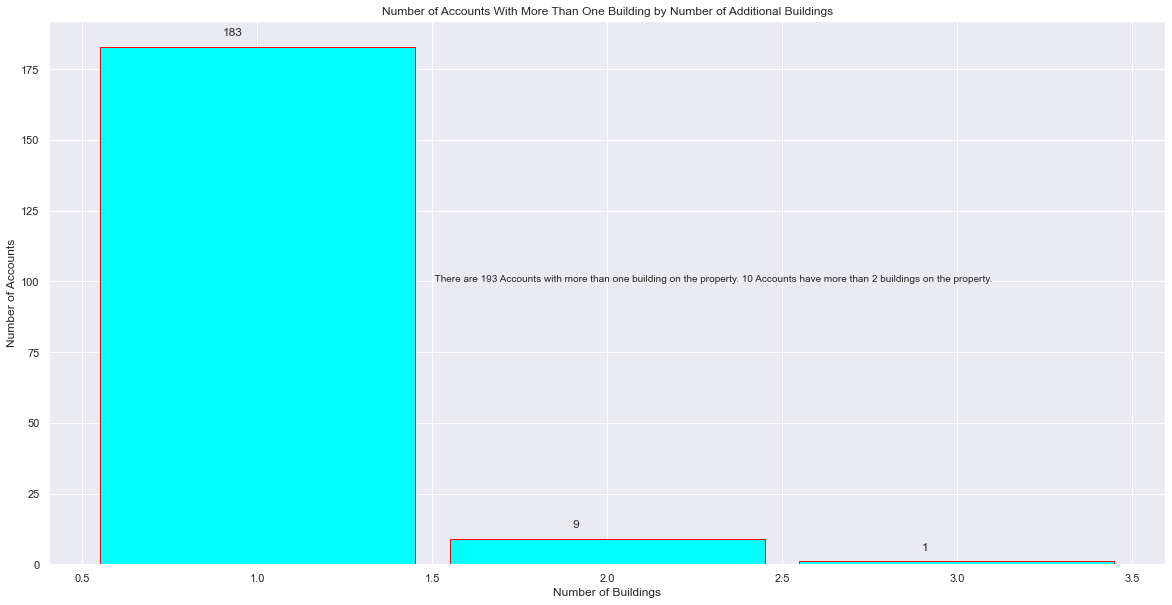

In [282]:
# How many Accounts have more than one building on the property (make up the 204 duplicate rows)?
# Extract the duplicate records from the dataframe
account_dups = df_properties.duplicated(subset=['Account_No'], keep = 'first')
account_dups_list = df_properties[account_dups]

# Summarize the data.
account_dups_sum = account_dups_list['Account_No'].value_counts().to_frame()
account_dups_sum2 = account_dups_sum['Account_No'].value_counts().to_frame().reset_index()

# Set Figure Size
plt.figure(figsize = (20,10))

# Pass parameters to the bar function for plotting
plt.bar(account_dups_sum2['index'], account_dups_sum2['Account_No'], width= 0.9, align='center',color='cyan', edgecolor = 'red')

# Add a Title
plt.title("Number of Accounts With More Than One Building by Number of Additional Buildings")

# Add Axis Labels
plt.xlabel('Number of Buildings')
plt.ylabel('Number of Accounts')

 
# Text on the top of each bar
text1 = account_dups_sum2['index']
text2 = account_dups_sum2['Account_No']
for i in range(len(text1)):
    plt.text(x = text1[i]-0.1 , y = text2[i]+ 4.0, s = text2[i], size = 12)  

# Add annotation
plt.annotate (" There are 193 Accounts with more than one building on the property. 10 Accounts have more than 2 buildings on the property.", 
             (1.5, 100))
    
plt.show()

##### EDA Question 2 - How many New Property Improvements (buildings) and Remodels were done each year?

In [283]:
# Aggregate Volume by Built_Year
df_properties_built = df_properties.groupby(['Built_Year']).size().to_frame('count').reset_index().drop([141],axis = 0)
# Aggregate Volume by Remodeled_Year and drop the first 2 records (non-remodels and weird entry)
df_properties_remod = df_properties.groupby(['Remodeled_Year']).size().to_frame('count').reset_index().drop([0],axis = 0)

In [284]:
# View the last few records in the dataframe
df_properties_built.tail(30)

Built_Year  count
111        1991   1792
112        1992   2140
113        1993   2608
114        1994   3743
115        1995   3830
116        1996   4682
117        1997   4367
118        1998   4628
119        1999   5188
120        2000   5220
121        2001   4129
122        2002   3423
123        2003   2954
124        2004   3169
125        2005   3617
126        2006   3352
127        2007   1739
128        2008   1169
129        2009    676
130        2010    747
131        2011    824
132        2012   1091
133        2013   1584
134        2014   1712
135        2015   1808
136        2016   1981
137        2017   2057
138        2018   2784
139        2019   2880
140        2020   2746

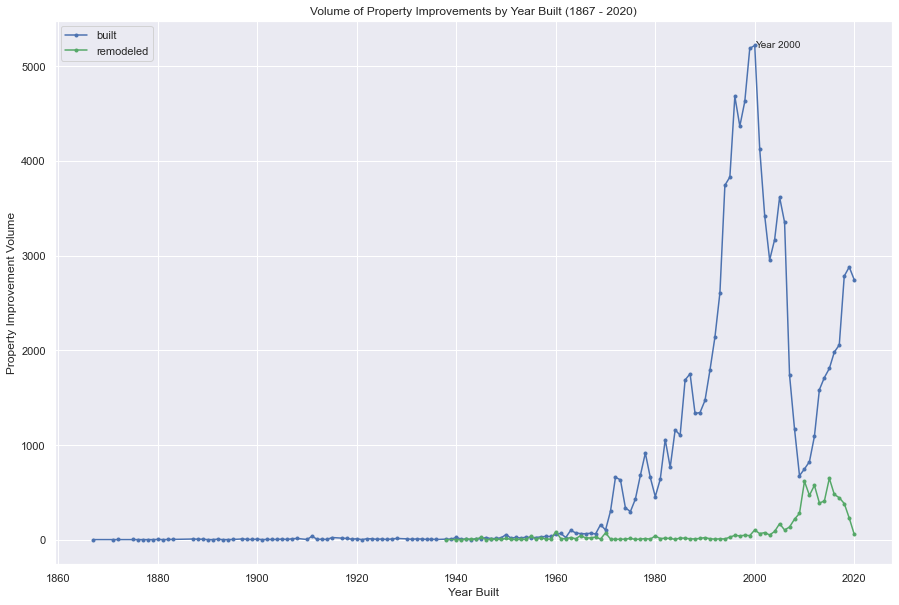

In [285]:
## Plot Volume by Year Built and Remodels

# Set Figure labels and size
plt.figure(figsize=(15,10))
plt.title('Volume of Property Improvements by Year Built (1867 - 2020)')
plt.xlabel('Year Built')
plt.ylabel('Property Improvement Volume')

# Pass parameters to function for plotting
plt.plot(df_properties_built['Built_Year'], df_properties_built['count'], 'b.-', label = 'built')
plt.plot(df_properties_remod['Remodeled_Year'], df_properties_remod['count'], 'g.-', label = 'remodeled')

plt.annotate("Year 2000", (2000,5200))

plt.legend(loc='upper left')

plt.show()


##### EDA Question 3 - What are the top Cities, Subdivisions and Build Types for Single Family Residential Homes in Douglas County?

<ipython-input-286-a1e0d7ee809d>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(cities2['index'], rotation=45, ha='right')
<ipython-input-286-a1e0d7ee809d>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(subdiv2['index'], rotation=45, ha='right')
<ipython-input-286-a1e0d7ee809d>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(buildtype2['index'], rotation=45, ha='right')


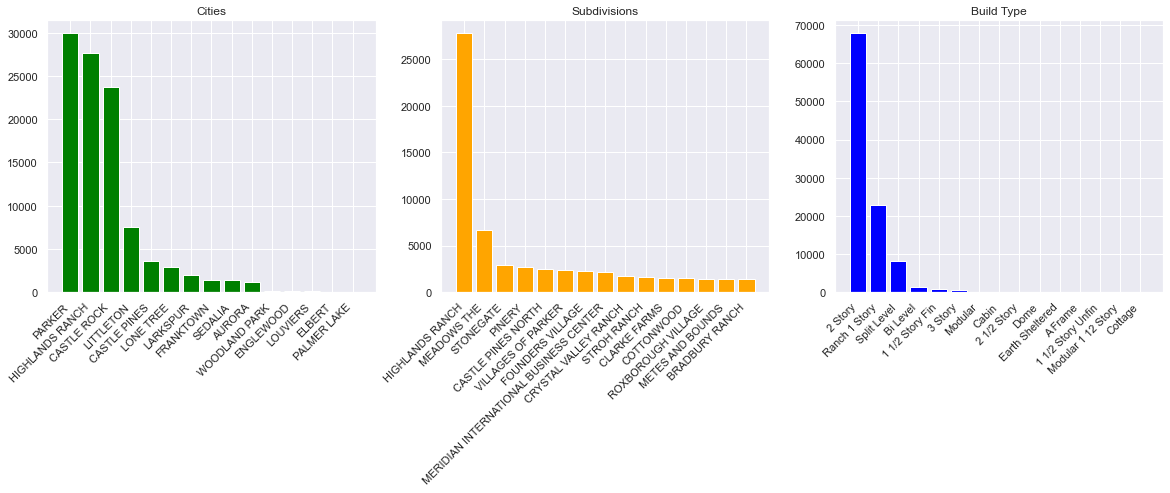

In [286]:
# Create Summary for Cities
cities = df_properties['City_Name'].value_counts().to_frame('count').reset_index()
cities2 = cities[0:15]

# Create Summary for Subdivisions
subdiv = df_properties['Subdivision_Name'].value_counts().to_frame('count').reset_index()
subdiv2 = subdiv[0:15]

# Create Summary for Build Type
buildtype = df_properties['Built_As'].value_counts().to_frame('count').reset_index()
buildtype2 = buildtype[0:15]

# Stacking the plots (4 graphs)
fig, axs = plt.subplots(1,3, figsize=(20, 5))
          
           
# View the top cities with properties in douglas county
axs[0].bar(cities2['index'], cities2['count'], color='green')
axs[0].set_xticklabels(cities2['index'], rotation=45, ha='right')
axs[0].set_title("Cities")


# View the top subdivisions with properties in douglas county
axs[1].bar(subdiv2['index'], subdiv2['count'], color='orange')
axs[1].set_xticklabels(subdiv2['index'], rotation=45, ha='right')
axs[1].set_title("Subdivisions")

# View the top Build Types with properties in douglas county
axs[2].bar(buildtype2['index'], buildtype2['count'], color='blue')
axs[2].set_xticklabels(buildtype2['index'], rotation=45, ha='right')
axs[2].set_title("Build Type")

plt.show()

### Review Null and Nan Values

In [287]:
# Check for the number of "Nan" values in each column of the dataframe
df_properties.isna().sum()

Account_No                           0
Building_ID                          0
Built_As_code                        0
Built_As                             0
Quality_Code                        12
Improvement_Type_Code                0
Completion_Percent                   0
Unit_Type                       101775
No_of_Fireplace                      0
Total_Garage_SF                      0
Walkout_Basement_Flag                0
Total_Porch_SF                       0
Total_Finished_Basement_SF           0
Total_Unfinished_Basement_SF         0
Roof_Construction_Type           13738
Built_as_SF                          0
Exterior_Construction               12
Interior_Construction               20
No_of_Story                          1
Roof_Material_Code                  15
Floor_Material_Type_Code            31
No_of_Bedrooms                      33
No_of_Bathrooms                     34
Built_Year                           0
Remodeled_Year                   16219
Length_of_Mobile_Home    

In [288]:
# Review the information on the dataframe (columns, non-null count, data types, index range, )
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101876 entries, 0 to 101875
Data columns (total 83 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Account_No                    101876 non-null  object        
 1   Building_ID                   101876 non-null  float64       
 2   Built_As_code                 101876 non-null  int64         
 3   Built_As                      101876 non-null  object        
 4   Quality_Code                  101864 non-null  object        
 5   Improvement_Type_Code         101876 non-null  int64         
 6   Completion_Percent            101876 non-null  float64       
 7   Unit_Type                     101 non-null     object        
 8   No_of_Fireplace               101876 non-null  int64         
 9   Total_Garage_SF               101876 non-null  int64         
 10  Walkout_Basement_Flag         101876 non-null  object        
 11  Total_Porch_S

##### Create an Index Column

In [289]:
# create a column from index value
df_properties.reset_index(inplace=True)
df_properties.head()

index Account_No  Building_ID  Built_As_code         Built_As Quality_Code  \
0      0   R0000027          1.0              1    Ranch 1 Story         Fair   
1      1   R0000051          1.0              1    Ranch 1 Story      Average   
2      2   R0000174          1.0              5  1 1/2 Story Fin      Average   
3      3   R0000211          1.0              1    Ranch 1 Story         Good   
4      4   R0000211          2.0              1    Ranch 1 Story      Average   

   Improvement_Type_Code  Completion_Percent Unit_Type  No_of_Fireplace  \
0                    969               100.0       NaN                0   
1                   1080               100.0       NaN                0   
2                   1938               100.0       NaN                0   
3                   2964               100.0       NaN                1   
4                    840               100.0       NaN                0   

   Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
0                0                     N              98   
1              379                     N             388   
2              900                     N             463   
3              768                     N             598   
4                0                     N               0   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
0                           0                             0   
1                           0                             0   
2                         456                            34   
3                           0                             0   
4                           0                             0   

  Roof_Construction_Type  Built_as_SF Exterior_Construction  \
0                  Gable          969          Frame Siding   
1                  Gable         1080  Frame Masonry Veneer   
2                  Gable         1938          Frame Siding   
3                  Gable         2964          Frame Stucco   
4                  Gable          840          Frame Stucco   

  Interior_Construction  No_of_Story   Roof_Material_Code  \
0               Drywall          1.0  Composition Shingle   
1               Drywall          1.0  Composition Shingle   
2               Drywall          2.0  Composition Shingle   
3               Drywall          1.0        Concrete Tile   
4               Drywall          1.0        Built Up Rock   

  Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
0                Allowance             2.0              1.0        1957   
1                Allowance             3.0              1.0        1947   
2                Allowance             3.0              2.0        1935   
3                Allowance             3.0              2.0        1969   
4                Allowance             2.0              1.0        1969   

   Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
0             0.0                    0.0                   0.0   
1          1960.0                    0.0                   0.0   
2          1950.0                    0.0                   0.0   
3             0.0                    0.0                   0.0   
4             0.0                    0.0                   0.0   

   Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
0                   8.0         1.0                    0.0   Average   
1                   8.0         1.0                    0.0   Average   
2                   8.0         1.0                    0.0   Average   
3                   8.0         1.0                    0.0   Average   
4                   8.0         1.0                    0.0   Average   

         HVAC Account_Type_Code_x State_Parcel_No Address_No  \
0  Forced Air         Residential    222934002015       8191   
1  Forced Air         Residential    222934002005       8149   
2  Forced Air         Residential    222934002014       8207   
3  Forced Air         Residential    22293

In [290]:
# View the shape of the dataframe
df_properties.shape

(101876, 84)

In [291]:
# View Description of dataframe
df_properties.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index Account_No    Building_ID  Built_As_code Built_As  \
count   101876.000000     101876  101876.000000  101876.000000   101876   
unique            NaN     101672            NaN            NaN       15   
top               NaN   R0463038            NaN            NaN  2 Story   
freq              NaN          4            NaN            NaN    67884   
mean     50937.500000        NaN       1.007774       6.362745      NaN   
min          0.000000        NaN       1.000000       1.000000      NaN   
25%      25468.750000        NaN       1.000000       7.000000      NaN   
50%      50937.500000        NaN       1.000000       8.000000      NaN   
75%      76406.250000        NaN       1.000000       8.000000      NaN   
max     101875.000000        NaN      20.000000      40.000000      NaN   
std      29409.212349        NaN       0.147081       3.276329      NaN   

       Quality_Code  Improvement_Type_Code  Completion_Percent Unit_Type  \
count        101864          101876.000000       101876.000000       101   
unique            6                    NaN                 NaN         2   
top         Average                    NaN                 NaN       End   
freq          65853                    NaN                 NaN        92   
mean            NaN            2392.202923           99.989546       NaN   
min             NaN               0.000000            0.000000       NaN   
25%             NaN            1810.000000          100.000000       NaN   
50%             NaN            2285.000000          100.000000       NaN   
75%             NaN            2844.000000          100.000000       NaN   
max             NaN           16807.000000          100.000000       NaN   
std             NaN             812.256873            0.919930       NaN   

        No_of_Fireplace  Total_Garage_SF Walkout_Basement_Flag  \
count     101876.000000    101876.000000                101876   
unique              NaN              NaN                     2   
top                 NaN              NaN                     N   
freq                NaN              NaN                 74655   
mean           0.990901       603.940182                   NaN   
min            0.000000         0.000000                   NaN   
25%            1.000000       440.000000                   NaN   
50%            1.000000       580.000000                   NaN   
75%            1.000000       687.000000                   NaN   
max            8.000000      7745.000000                   NaN   
std            0.555729       264.141445                   NaN   

        Total_Porch_SF  Total_Finished_Basement_SF  \
count    101876.000000               101876.000000   
unique             NaN                         NaN   
top                NaN                         NaN   
freq               NaN                         NaN   
mean        450.750285                  530.304350   
min           0.000000                    0.000000   
25%         192.000000                    0.000000   
50%         337.000000                    0.000000   
75%         553.000000                  986.000000   
max       16444.000000                22450.000000   
std         462.171974                  692.394178   

        Total_Unfinished_Basement_SF Roof_Construction_Type    Built_as_SF  \
count                  101876.000000                  88138  101876.000000   
unique                           NaN                      9            NaN   
top                              NaN                  Gable            NaN   
freq                             NaN                  63812            NaN   
mean                      681.617967                    NaN    2392.085388   
min                      -639.000000                    NaN       0.000000   
25%                       124.000000                    NaN    1810.000000   
50%                       513.000000                    NaN    2285.000000   
75%                      1093.250000                    Na

### Replace NaN values in columns

###### Unit Type

In [292]:
# View the records for "Unit Type" to determine if the column needs to be retained.
# This term refers to the way Condominium or Townhouse properties are typically constructed in groups
# where some of the walls are common or shared. A unit’s location in the overall structure can influence
# its market value, based on whether it is an interior or end unit
df_unit_type = df_properties.groupby(['Built_As','No_Of_Unit','Unit_Type']).size().to_frame('count')
df_unit_type

count
Built_As      No_Of_Unit Unit_Type       
2 Story       1.0        End           32
                         Inside         6
Ranch 1 Story 1.0        End           60
                         Inside         3

In [293]:
# Fill any "Nan" values with descriptive value "Individual"
df_properties['Unit_Type'].fillna(value='Individual', inplace=True)

###### Quality Code

In [294]:
# View the records for "Quality Code"
df_properties['Quality_Code'].value_counts()

Average      65853
Good         27172
Very Good     7217
Excellent     1244
Fair           330
Low             48
Name: Quality_Code, dtype: int64

In [295]:
# View Quality Code N/A built as values
df_qual_code = df_properties[(df_properties['Quality_Code'].isna())].groupby(['Built_As']).size().to_frame('count')
df_qual_code

count
Built_As            
2 Story            8
Ranch 1 Story      4

In [296]:
# Fill any "Nan" values with descriptive value "Not Rated"
df_properties['Quality_Code'].fillna(value='Not Rated', inplace=True)

###### Construction Materials Variables

In [297]:
# View Roof Construction N/A built as values
df_roof = df_properties[(df_properties['Roof_Construction_Type'].isna())].groupby(['Built_As']).size().to_frame('count')
df_roof

count
Built_As                
1 1/2 Story Fin      186
1 1/2 Story Unfin      1
2 Story             8357
Bi Level             341
Cabin                 10
Dome                   6
Earth Sheltered        4
Modular                5
Ranch 1 Story       2698
Split Level         2130

In [298]:
# Fill any "Nan" values with descriptive value "Unknown"
df_properties['Roof_Construction_Type'].fillna(value='Unknown', inplace=True)

In [299]:
# Fill any "Nan" values with descriptive value "Unknown"
df_properties['Exterior_Construction'].fillna(value='Unknown', inplace=True)
df_properties['Interior_Construction'].fillna(value='Unknown', inplace=True)
df_properties['Condition'].fillna(value='Unknown', inplace=True)
df_properties['HVAC'].fillna(value='Unknown', inplace=True)
df_properties['Roof_Material_Code'].fillna(value='Unknown', inplace=True)
df_properties['Floor_Material_Type_Code'].fillna(value='Unknown', inplace=True)



###### Completion Percentage

In [300]:
# View the values and counts for completion percent - what are the homes not 100% complete?
df_properties['Completion_Percent'].value_counts()

100.0    101861
50.0          7
0.0           6
75.0          1
10.0          1
Name: Completion_Percent, dtype: int64

In [301]:
# Create a new dataframe grouped by 2 columns with the counts of records
df_comp_perc = df_properties.groupby(['Built_As','Completion_Percent']).size().to_frame('count')
df_comp_perc

count
Built_As           Completion_Percent       
1 1/2 Story Fin    100.0                 910
1 1/2 Story Unfin  100.0                   5
2 1/2 Story        100.0                  35
2 Story            0.0                     3
                   10.0                    1
                   50.0                    3
                   75.0                    1
                   100.0               67876
3 Story            100.0                 493
A Frame            100.0                  11
Bi Level           50.0                    1
                   100.0                1298
Cabin              100.0                 115
Cottage            100.0                   1
Dome               100.0                  18
Earth Sheltered    100.0                  17
Modular            100.0                 156
Modular 1 12 Story 100.0                   1
Ranch 1 Story      0.0                     3
                   50.0                    2
                   100.0               22774
Split Level        50.0                    1
                   100.0                8151

In [302]:
# View records with completion % less than 100%
df_comp_perc_plot = df_properties[(df_properties['Completion_Percent'] < 100.0)]
df_comp_perc_plot

index Account_No  Building_ID  Built_As_code       Built_As  \
11134    11134   R0222308          1.0              7    Split Level   
33566    33566   R0372294          1.0              8        2 Story   
33567    33567   R0372294          2.0              8        2 Story   
84579    84579   R0467786          1.0              8        2 Story   
99976    99976   R0498558          1.0              8        2 Story   
100210  100210   R0499104          1.0              1  Ranch 1 Story   
100856  100856   R0600713          1.0              8        2 Story   
100961  100961   R0601073          1.0              1  Ranch 1 Story   
101187  101187   R0601929          1.0              8        2 Story   
101440  101440   R0602467          1.0              1  Ranch 1 Story   
101506  101506   R0603045          1.0              2       Bi Level   
101532  101532   R0603638          2.0              8        2 Story   
101585  101585   R0603783          1.0              1  Ranch 1 Story   
101723  101723   R0605146          1.0              8        2 Story   
101791  101791   R0606244          1.0              1  Ranch 1 Story   

       Quality_Code  Improvement_Type_Code  Completion_Percent   Unit_Type  \
11134       Average                   2118                50.0  Individual   
33566     Very Good                   4546                75.0  Individual   
33567     Excellent                  15073                50.0  Individual   
84579     Not Rated                   3803                 0.0  Individual   
99976     Not Rated                      0                10.0  Individual   
100210    Not Rated                   1966                 0.0  Individual   
100856    Not Rated                   3270                 0.0  Individual   
100961    Not Rated                   2493                 0.0  Individual   
101187      Average                   3899                50.0  Individual   
101440      Average                   1540                50.0  Individual   
101506         Good                   4919                50.0  Individual   
101532    Excellent                   2406                 0.0  Individual   
101585      Average                   1971                50.0  Individual   
101723    Not Rated                   4081                50.0  Individual   
101791      Average                   1574                 0.0  Individual   

        No_of_Fireplace  Total_Garage_SF Walkout_Basement_Flag  \
11134                 0              624                     N   
33566                 1              777                     N   
33567                 2             4746                     Y   
84579                 1              714                     N   
99976                 0              486                     N   
100210                1              492                     N   
100856                1              707                     N   
100961                1              696                     Y   
101187                1              803                     Y   
101440                1              511                     N   
101506                3             1133                     N   
101532                1              572                     N   
101585                1              520                     N   
101723                1              726                     N   
101791                0              420                     N   

        Total_Porch_SF  Total_Finished_Basement_SF  \
11134              120                           0   
33566                0                           0   
33567            16444                        2670   
84579              357                        1459   
99976              121                           0   
100210             268                           0   
100856             275                           0   
100961             360                           1   
101187             587                           0   
101440    

In [303]:
# Create an indicator for "Complete" or "Incomplete"
df_properties['Complete'] = np.where(df_properties['Completion_Percent']< 100.0, 0, 1)
df_properties.head(2)

index Account_No  Building_ID  Built_As_code       Built_As Quality_Code  \
0      0   R0000027          1.0              1  Ranch 1 Story         Fair   
1      1   R0000051          1.0              1  Ranch 1 Story      Average   

   Improvement_Type_Code  Completion_Percent   Unit_Type  No_of_Fireplace  \
0                    969               100.0  Individual                0   
1                   1080               100.0  Individual                0   

   Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
0                0                     N              98   
1              379                     N             388   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
0                           0                             0   
1                           0                             0   

  Roof_Construction_Type  Built_as_SF Exterior_Construction  \
0                  Gable          969          Frame Siding   
1                  Gable         1080  Frame Masonry Veneer   

  Interior_Construction  No_of_Story   Roof_Material_Code  \
0               Drywall          1.0  Composition Shingle   
1               Drywall          1.0  Composition Shingle   

  Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
0                Allowance             2.0              1.0        1957   
1                Allowance             3.0              1.0        1947   

   Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
0             0.0                    0.0                   0.0   
1          1960.0                    0.0                   0.0   

   Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
0                   8.0         1.0                    0.0   Average   
1                   8.0         1.0                    0.0   Average   

         HVAC Account_Type_Code_x State_Parcel_No Address_No  \
0  Forced Air         Residential    222934002015       8191   
1  Forced Air         Residential    222934002005       8149   

  Pre_Directional_Code Street_Name Street_Type_Code Unit_No Location_Zip_Code  \
0                             CORA               ST     NaN             80125   
1                             CORA               ST     NaN             80125   

   City_Name  \
0  LITTLETON   
1  LITTLETON   

                                                                                          Legal_Descr  \
0                  LOTS 4 THRU 7 BLK 7 KELLEY TOWNSITES AKA PARCEL IN SW1/4SW1/4 34-6-68    0.29 AM/L   
1  LOTS 11 & 12 BLK 8 KELLEY TOWNSITE AND THAT PART OF VACATED ROSE AVE ADJACENT TO PROPERTY .23 AM/L   

   Township  Range  Section Quarter Land_Economic_Area_Code Vacant_Flag  \
0      34.0    6.0     68.0      SW                     3FF           N   
1      34.0    6.0     68.0      SW                     3FF           N   

   Total_Net_Acres  Tax_District_No Neighborhood_Code Neighborhood_Extention  \
0         0.289991             3470               601                     00   
1         0.230005             3470               601                     00   

                     Loc_Full_Address Sub_Filing_Recording_No  \
0  8191  CORA ST ,LITTLETON ,CO,80125                   30631   
1  8149  CORA ST ,LITTLETON ,CO,80125                   30631   

  Subdivision_Name Lot_No Block_No Tract_No Filing_No Filing_Descr  \
0  KELLEY TOWNSITE      4        7      NaN       NaN          NaN   
1  KELLEY TOWNSITE     11        8      NaN       NaN          NaN   

                         Owner_Name Mailing_Address_Line_1  \
0  LEO D HRDLICKA &BETTE J HRDLICKA         8191 N CORA ST   
1                 RODNEY L JACOBSEN         8149 N CORA ST   

  Mailing_Address_Line_2 Mailing_City_Name Mailing_State Mailing_Zip_Code  \
0                    NaN         LITTLETON            CO        801259707   
1                    NaN         LITTLETON            CO        801259707   

   Actual_Value  Assessed_Value Valuation_Class_Cod

###### Number of Stories

In [304]:
# View missing No of Stories information
df_stories = df_properties[(df_properties['No_of_Story'].isna())]  
df_stories

index Account_No  Building_ID  Built_As_code Built_As Quality_Code  \
99976  99976   R0498558          1.0              8  2 Story    Not Rated   

       Improvement_Type_Code  Completion_Percent   Unit_Type  No_of_Fireplace  \
99976                      0                10.0  Individual                0   

       Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
99976              486                     N             121   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
99976                           0                          1137   

      Roof_Construction_Type  Built_as_SF Exterior_Construction  \
99976                Unknown            0               Unknown   

      Interior_Construction  No_of_Story Roof_Material_Code  \
99976               Unknown          NaN            Unknown   

      Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
99976                  Unknown             NaN              NaN        2020   

       Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
99976             NaN                    0.0                   0.0   

       Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
99976                  10.0         NaN                    0.0   Unknown   

          HVAC Account_Type_Code_x State_Parcel_No Address_No  \
99976  Unknown         Residential    223321314008      17358   

      Pre_Directional_Code  Street_Name Street_Type_Code Unit_No  \
99976                       SPRINGFIELD               DR     NaN   

      Location_Zip_Code City_Name  \
99976             80134    PARKER   

                                                Legal_Descr  Township  Range  \
99976  LOT 8 BLOCK 4 OLDE TOWN AT PARKER 1B-2    0.138 AM/L      21.0    6.0   

       Section Quarter Land_Economic_Area_Code Vacant_Flag  Total_Net_Acres  \
99976     66.0      SW                     1EE           N            0.138   

       Tax_District_No Neighborhood_Code Neighborhood_Extention  \
99976             3129               120                      C   

                              Loc_Full_Address Sub_Filing_Recording_No  \
99976  17358  SPRINGFIELD DR ,PARKER ,CO,80134              2018070436   

          Subdivision_Name Lot_No Block_No Tract_No Filing_No Filing_Descr  \
99976  OLDE TOWN AT PARKER      8        4      NaN       NaN          NaN   

                           Owner_Name      Mailing_Address_Line_1  \
99976  MERITAGE HOMES OF COLORADO INC  8800 E RAINTREE DR STE 300   

      Mailing_Address_Line_2 Mailing_City_Name Mailing_State Mailing_Zip_Code  \
99976                    NaN        SCOTTSDALE            AZ        852603966   

       Actual_Value  Assessed_Value Valuation_Class_Code  \
99976           0.0             0.0                 1212   

          Valuation_Description Exempt_Flag Account_Subtype_Code  \
99976  SINGLE FAMILY RES - IMPS           N                 Real   

      Valuation_Type_Code Account_Type_Code_y  No_of_Sales Sale_Date_toMin  \
99976                   I         Residential          NaN             NaT   

       Sale_Price_Min Sale_Date_toMax  Sale_Price_Max Min_Sale_Date  \
99976             NaN             NaT             NaN           NaT   

       Sale_Price_toMin Max_Sale_Date  Sale_Price_toMax  Complete  
99976               NaN           NaT               NaN         0

In [305]:
# Set missign data to "2" for stories based on built as type
df_properties['No_of_Story'].fillna(value=2, inplace=True)

###### Number of Units

In [306]:
# View missing No of Stories information
df_units = df_properties[(df_properties['No_Of_Unit'].isna())]  
df_units

index Account_No  Building_ID  Built_As_code Built_As Quality_Code  \
99976  99976   R0498558          1.0              8  2 Story    Not Rated   

       Improvement_Type_Code  Completion_Percent   Unit_Type  No_of_Fireplace  \
99976                      0                10.0  Individual                0   

       Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
99976              486                     N             121   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
99976                           0                          1137   

      Roof_Construction_Type  Built_as_SF Exterior_Construction  \
99976                Unknown            0               Unknown   

      Interior_Construction  No_of_Story Roof_Material_Code  \
99976               Unknown          2.0            Unknown   

      Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
99976                  Unknown             NaN              NaN        2020   

       Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
99976             NaN                    0.0                   0.0   

       Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
99976                  10.0         NaN                    0.0   Unknown   

          HVAC Account_Type_Code_x State_Parcel_No Address_No  \
99976  Unknown         Residential    223321314008      17358   

      Pre_Directional_Code  Street_Name Street_Type_Code Unit_No  \
99976                       SPRINGFIELD               DR     NaN   

      Location_Zip_Code City_Name  \
99976             80134    PARKER   

                                                Legal_Descr  Township  Range  \
99976  LOT 8 BLOCK 4 OLDE TOWN AT PARKER 1B-2    0.138 AM/L      21.0    6.0   

       Section Quarter Land_Economic_Area_Code Vacant_Flag  Total_Net_Acres  \
99976     66.0      SW                     1EE           N            0.138   

       Tax_District_No Neighborhood_Code Neighborhood_Extention  \
99976             3129               120                      C   

                              Loc_Full_Address Sub_Filing_Recording_No  \
99976  17358  SPRINGFIELD DR ,PARKER ,CO,80134              2018070436   

          Subdivision_Name Lot_No Block_No Tract_No Filing_No Filing_Descr  \
99976  OLDE TOWN AT PARKER      8        4      NaN       NaN          NaN   

                           Owner_Name      Mailing_Address_Line_1  \
99976  MERITAGE HOMES OF COLORADO INC  8800 E RAINTREE DR STE 300   

      Mailing_Address_Line_2 Mailing_City_Name Mailing_State Mailing_Zip_Code  \
99976                    NaN        SCOTTSDALE            AZ        852603966   

       Actual_Value  Assessed_Value Valuation_Class_Code  \
99976           0.0             0.0                 1212   

          Valuation_Description Exempt_Flag Account_Subtype_Code  \
99976  SINGLE FAMILY RES - IMPS           N                 Real   

      Valuation_Type_Code Account_Type_Code_y  No_of_Sales Sale_Date_toMin  \
99976                   I         Residential          NaN             NaT   

       Sale_Price_Min Sale_Date_toMax  Sale_Price_Max Min_Sale_Date  \
99976             NaN             NaT             NaN           NaT   

       Sale_Price_toMin Max_Sale_Date  Sale_Price_toMax  Complete  
99976               NaN           NaT               NaN         0

In [307]:
# Set missign data to "1" for units based on built as type
df_properties['No_Of_Unit'].fillna(value=1, inplace=True)

###### Number of Bedrooms

In [308]:
# View No of Bedroom N/A value
df_bedroom_nas = df_properties[(df_properties['No_of_Bedrooms'].isna())].groupby(['Built_Year','Built_As']).size().to_frame('count')
df_bedroom_nas


count
Built_Year Built_As            
2016       2 Story            1
2019       2 Story            1
2020       2 Story           15
           3 Story            5
           Bi Level           1
           Ranch 1 Story      9
2021       2 Story            1

In [309]:
# View the records
df_nas1 = df_properties[(df_properties['No_of_Bedrooms'].isna())]
df_nas1

index Account_No  Building_ID  Built_As_code       Built_As  \
76707    76707   R0448680          1.0              1  Ranch 1 Story   
84579    84579   R0467786          1.0              8        2 Story   
86252    86252   R0471422          1.0              8        2 Story   
95722    95722   R0491384          1.0              8        2 Story   
95742    95742   R0491409          1.0              1  Ranch 1 Story   
98311    98311   R0495320          1.0             25        3 Story   
98312    98312   R0495321          1.0             25        3 Story   
98560    98560   R0495646          1.0              1  Ranch 1 Story   
98816    98816   R0495965          1.0              1  Ranch 1 Story   
99544    99544   R0497152          1.0              8        2 Story   
99843    99843   R0498269          1.0              8        2 Story   
99976    99976   R0498558          1.0              8        2 Story   
100054  100054   R0498692          1.0              8        2 Story   
100210  100210   R0499104          1.0              1  Ranch 1 Story   
100745  100745   R0600471          1.0             25        3 Story   
100746  100746   R0600472          1.0             25        3 Story   
100749  100749   R0600475          1.0             25        3 Story   
100856  100856   R0600713          1.0              8        2 Story   
100873  100873   R0600763          1.0              1  Ranch 1 Story   
100875  100875   R0600777          1.0              8        2 Story   
100949  100949   R0601018          1.0              8        2 Story   
100954  100954   R0601023          1.0              8        2 Story   
100961  100961   R0601073          1.0              1  Ranch 1 Story   
101240  101240   R0602039          1.0              8        2 Story   
101271  101271   R0602080          1.0              8        2 Story   
101440  101440   R0602467          1.0              1  Ranch 1 Story   
101499  101499   R0602992          1.0              8        2 Story   
101506  101506   R0603045          1.0              2       Bi Level   
101526  101526   R0603613          1.0              8        2 Story   
101696  101696   R0604332          1.0              8        2 Story   
101740  101740   R0605218          1.0              8        2 Story   
101791  101791   R0606244          1.0              1  Ranch 1 Story   
101805  101805   R0606523          1.0              8        2 Story   

       Quality_Code  Improvement_Type_Code  Completion_Percent   Unit_Type  \
76707          Good                   3158               100.0  Individual   
84579     Not Rated                   3803                 0.0  Individual   
86252       Average                   2265               100.0  Individual   
95722       Average                   3766               100.0  Individual   
95742          Good                   2524               100.0  Individual   
98311       Average                   2201               100.0  Individual   
98312       Average                   2522               100.0  Individual   
98560     Not Rated                   2340               100.0  Individual   
98816       Average                   1797               100.0  Individual   
99544       Average                   2372               100.0  Individual   
99843     Very Good                   5364               100.0  Individual   
99976     Not Rated                      0                10.0  Individual   
100054      Average                   2135               100.0  Individual   
100210    Not Rated                   1966                 0.0  Individual   
100745      Average                   1921               100.0  Individual   
100746      Average                   2071               100.0  Individual   
100749      Average                   2071               100.0  Individual   
100856    Not Rated                   3270                 0.0  Individual   
100873      Average                   1783               100.0  Individual   


In [310]:
# How many columns are nan in the record?
df_properties.loc[[76707]].isna().sum().sum()

21

###### Remodeled Year

In [311]:
# Fill any "Nan" values with descriptive value "0"
df_properties['Remodeled_Year'].fillna(value= '0', inplace=True)

###### Address

In [312]:
# View City N/A value
df_city_missing = df_properties[(df_properties['City_Name'].isna())].groupby(['Built_Year','Subdivision_Name','Built_As']).size().to_frame('count')
df_city_missing

count
Built_Year Subdivision_Name  Built_As              
1903       METES AND BOUNDS  Cabin                1
1922       METES AND BOUNDS  Cabin                1
1923       METES AND BOUNDS  Cabin                1
1932       METES AND BOUNDS  Cabin                1
1933       METES AND BOUNDS  Cabin                1
1944       METES AND BOUNDS  Cabin                2
1950       METES AND BOUNDS  Cabin                2
1953       DEVRIES EXEMPTION Cabin                1
1955       METES AND BOUNDS  Cabin                2
1962       METES AND BOUNDS  Cabin                1
2015       ENCHANTMENT       1 1/2 Story Fin      1
2020       SLEEPING FOX      Ranch 1 Story        1

In [313]:
# Identify city/subdivision groups
df_city_subdivision = df_properties.groupby(['Subdivision_Name','City_Name']).size().to_frame('count').reset_index()
df_city_subdivision

Subdivision_Name    City_Name  count
0                           A AND B       PARKER      3
1                       ACRES GREEN    LITTLETON   1052
2                       ACRES GREEN    LONE TREE      1
3    ADDINGTON GEARKE 2ND EXEMPTION      SEDALIA      2
4              ALLIS RANCH PRESERVE      SEDALIA      8
..                              ...          ...    ...
495               WOODMOOR MOUNTAIN     LARKSPUR     62
496                           WOODS  CASTLE ROCK      2
497                          WRIGHT      SEDALIA      1
498                 YOUNGS ADDITION  CASTLE ROCK     77
499             ZUCHELS SUBDIVISION      SEDALIA      1

[500 rows x 3 columns]

In [314]:
# Filter to specific rows based on a subdivision
subcity_list = ['METES AND BOUNDS','ENCHANTMENT','SLEEPING FOX','DEVRIES EXEMPTION']
df_sub_city = df_city_subdivision[df_city_subdivision.Subdivision_Name.isin(subcity_list)]

df_sub_city

Subdivision_Name      City_Name  count
115  DEVRIES EXEMPTION        SEDALIA      2
132        ENCHANTMENT        SEDALIA      9
263   METES AND BOUNDS    CASTLE ROCK    211
264   METES AND BOUNDS         ELBERT      2
265   METES AND BOUNDS      ELIZABETH      1
266   METES AND BOUNDS      FRANKTOWN    157
267   METES AND BOUNDS       LARKSPUR    104
268   METES AND BOUNDS      LITTLETON     41
269   METES AND BOUNDS      LONE TREE      1
270   METES AND BOUNDS    PALMER LAKE      5
271   METES AND BOUNDS         PARKER    385
272   METES AND BOUNDS        SEDALIA    424
273   METES AND BOUNDS  WOODLAND PARK     40

In [315]:
# Replace missing city names
city_update = ['ENCHANTMENT','DEVRIES EXEMPTION','SLEEPING FOX']
df_properties['City_Name'] = np.where(df_properties.Subdivision_Name.isin(city_update)
                                 ,df_properties['City_Name'].replace(to_replace = np.nan, value = 'SEDALIA')
                                  , df_properties['City_Name'])

df_properties.shape

(101876, 85)

In [316]:
# View City N/A value
df_city_missing2 = df_properties[(df_properties['City_Name'].isna())].groupby(['Built_Year','Subdivision_Name','Built_As']).size().to_frame('count')
df_city_missing2

count
Built_Year Subdivision_Name Built_As       
1903       METES AND BOUNDS Cabin         1
1922       METES AND BOUNDS Cabin         1
1923       METES AND BOUNDS Cabin         1
1932       METES AND BOUNDS Cabin         1
1933       METES AND BOUNDS Cabin         1
1944       METES AND BOUNDS Cabin         2
1950       METES AND BOUNDS Cabin         2
1955       METES AND BOUNDS Cabin         2
1962       METES AND BOUNDS Cabin         1

In [317]:
# View City N/A value
df_city_missing3 = df_properties[(df_properties['City_Name'].isna())]
city_index = df_city_missing3.index
df_city_missing3

index Account_No  Building_ID  Built_As_code Built_As Quality_Code  \
9357      9357   R0149972          1.0             10    Cabin      Average   
9411      9411   R0150990          1.0             10    Cabin         Fair   
9448      9448   R0151562          1.0             10    Cabin         Fair   
9452      9452   R0151669          1.0             10    Cabin         Fair   
9502      9502   R0152581          1.0             10    Cabin         Fair   
9511      9511   R0152830          1.0             10    Cabin         Fair   
9698      9698   R0157809          1.0             10    Cabin         Fair   
10108    10108   R0164902          1.0             10    Cabin         Fair   
10245    10245   R0167919          1.0             10    Cabin         Fair   
28378    28378   R0360101          1.0             10    Cabin      Average   
101847  101847   R0609407          1.0             10    Cabin          Low   
101848  101848   R0609407          2.0             10    Cabin         Fair   

        Improvement_Type_Code  Completion_Percent   Unit_Type  \
9357                      662               100.0  Individual   
9411                      480               100.0  Individual   
9448                      818               100.0  Individual   
9452                      368               100.0  Individual   
9502                      732               100.0  Individual   
9511                      588               100.0  Individual   
9698                      168               100.0  Individual   
10108                     432               100.0  Individual   
10245                     888               100.0  Individual   
28378                     400               100.0  Individual   
101847                    525               100.0  Individual   
101848                    945               100.0  Individual   

        No_of_Fireplace  Total_Garage_SF Walkout_Basement_Flag  \
9357                  0                0                     N   
9411                  0                0                     N   
9448                  0                0                     N   
9452                  1                0                     N   
9502                  1                0                     N   
9511                  1                0                     N   
9698                  0                0                     N   
10108                 1                0                     N   
10245                 0                0                     N   
28378                 0                0                     N   
101847                1                0                     N   
101848                0                0                     N   

        Total_Porch_SF  Total_Finished_Basement_SF  \
9357               320                           0   
9411               128                           0   
9448               555                           0   
9452                72                           0   
9502               316                           0   
9511               328                           0   
9698                 0                           0   
10108              243                           0   
10245              404                           0   
28378                0                           0   
101847             480                           0   
101848              88                           0   

        Total_Unfinished_Basement_SF Roof_Construction_Type  Built_as_SF  \
9357                               0                  Gable          662   
9411                               0                  Gable          480   
9448                               0                  Gable          818   
9452                               0                  Gable          368   
9502                               0                  Gable          732   
9511                               0                  Gable          588   
9698                               0     

In [318]:
# Drop records missing VALUE (not "SFR" type needed)
df_properties.drop(city_index,axis = 0, inplace = True)
df_properties.shape

(101864, 85)

In [319]:
# View Street N/A value
df_street_missing = df_properties[(df_properties['Street_Name'].isna())].groupby(['Built_Year','Subdivision_Name','Built_As']).size().to_frame('count')
df_street_missing

count
Built_Year Subdivision_Name  Built_As              
1953       DEVRIES EXEMPTION Cabin                1
2015       ENCHANTMENT       1 1/2 Story Fin      1
2020       SLEEPING FOX      Ranch 1 Story        1

In [320]:
# View content of "full address"
df_properties['Loc_Full_Address']

0              8191  CORA ST ,LITTLETON ,CO,80125
1              8149  CORA ST ,LITTLETON ,CO,80125
2              8207  CORA ST ,LITTLETON ,CO,80125
3         6002  RON KING TRL ,LITTLETON ,CO,80125
4         6002  RON KING TRL ,LITTLETON ,CO,80125
                           ...                   
101871    6614  DUKES TRL ,CASTLE PINES ,CO,80108
101872    6626  DUKES TRL ,CASTLE PINES ,CO,80108
101873        6578 E LOOKOUT DR ,PARKER ,CO,80138
101874        13024  SIERRA CIR ,PARKER ,CO,80138
101875      2940  BEARS DEN DR ,SEDALIA ,CO,80135
Name: Loc_Full_Address, Length: 101864, dtype: object

In [321]:
# View Address details with no address
df_address = df_properties[(df_properties['Address_No'].isna())].groupby(['Built_As','Building_ID']).size().to_frame('count')
df_address

count
Built_As        Building_ID       
1 1/2 Story Fin 1.0              1
Cabin           1.0              1
Ranch 1 Story   1.0              1

In [322]:
# View Address details with no city
df_city = df_properties[(df_properties['City_Name'].isna())].groupby(['Built_As','Building_ID']).size().to_frame('count')
df_city

Empty DataFrame
Columns: [count]
Index: []

In [323]:
# Replace any "nan" values in full address with blanks
full_add_nan = df_properties['Loc_Full_Address'].str.contains(pat = 'nan')
replace_add_nan = df_properties['Loc_Full_Address'].str.replace(pat = 'nan', repl="")
replace_add_nan.isna().sum()

0

###### Owner

In [324]:
# View Address details with no address
df_no_Owner = df_properties[(df_properties['Owner_Name'].isna())]
df_no_Owner

index Account_No  Building_ID  Built_As_code       Built_As  \
517        517   R0010102          1.0              8        2 Story   
699        699   R0013549          1.0              1  Ranch 1 Story   
853        853   R0016803          1.0              1  Ranch 1 Story   
942        942   R0018551          1.0              8        2 Story   
1136      1136   R0023131          1.0              1  Ranch 1 Story   
...        ...        ...          ...            ...            ...   
100429  100429   R0499446          1.0              8        2 Story   
100561  100561   R0600116          4.0             21        Modular   
100637  100637   R0600245          1.0              1  Ranch 1 Story   
100978  100978   R0601097          1.0              1  Ranch 1 Story   
101208  101208   R0601969          1.0              8        2 Story   

       Quality_Code  Improvement_Type_Code  Completion_Percent   Unit_Type  \
517         Average                   1512               100.0  Individual   
699         Average                   1774               100.0  Individual   
853            Good                   2318               100.0  Individual   
942            Good                   3462               100.0  Individual   
1136           Good                   2024               100.0  Individual   
...             ...                    ...                 ...         ...   
100429      Average                   1613               100.0  Individual   
100561      Average                   1920               100.0  Individual   
100637      Average                   1398               100.0  Individual   
100978      Average                   2615               100.0  Individual   
101208      Average                   1510               100.0  Individual   

        No_of_Fireplace  Total_Garage_SF Walkout_Basement_Flag  \
517                   1              698                     Y   
699                   1              628                     N   
853                   1              847                     Y   
942                   2              616                     Y   
1136                  1              720                     Y   
...                 ...              ...                   ...   
100429                0              450                     N   
100561                0              484                     N   
100637                0              460                     N   
100978                1              635                     N   
101208                1              435                     N   

        Total_Porch_SF  Total_Finished_Basement_SF  \
517                476                         958   
699                582                           0   
853                392                        1288   
942                565                           0   
1136               657                        1494   
...                ...                         ...   
100429             102                           0   
100561              87                           0   
100637              46                           0   
100978             270                        2094   
101208              64                           0   

        Total_Unfinished_Basement_SF Roof_Construction_Type  Built_as_SF  \
517                               51                  Gable         1512   
699                               24                  Gable         1774   
853                              969                  Gable         2318   
942                             1719              Hip/Gable         3462   
1136                             497                  Gable         2024   
...                              ...                    ...          ...   
100429                             0                  Gable         1613   
100561                             0                  Gable         1920   
100637                             0                  Gable         1398   
10097

In [325]:
# Fill any "Nan" values with descriptive value "Unknown"
df_properties['Owner_Name'].fillna(value='Unknown', inplace=True)
df_properties['Mailing_Address_Line_1'].fillna(value='Unknown', inplace=True)
df_properties['Mailing_Address_Line_2'].fillna(value='Unknown', inplace=True)
df_properties['Mailing_City_Name'].fillna(value='Unknown', inplace=True)
df_properties['Mailing_State'].fillna(value='Unknown', inplace=True)
df_properties['Mailing_Zip_Code'].fillna(value='Unknown', inplace=True)


###### Actual Values

In [326]:
# View record details with missing value and sale data
df_no_value = df_properties[(df_properties['Actual_Value'].isna())]
df_no_value_list = df_no_value['Account_No']
df_no_value_index = df_no_value.index
df_no_value

index Account_No  Building_ID  Built_As_code         Built_As  \
1682    1682   R0037381          1.0              1    Ranch 1 Story   
1683    1683   R0037381          3.0              8          2 Story   
1865    1865   R0040580          1.0              8          2 Story   
2715    2715   R0054181          1.0              1    Ranch 1 Story   
2777    2777   R0055394          1.0              7      Split Level   
6456    6456   R0116599          1.0              1    Ranch 1 Story   
7644    7644   R0129998          1.0              1    Ranch 1 Story   
7662    7662   R0130180          1.0              1    Ranch 1 Story   
9836    9836   R0160231          1.0              1    Ranch 1 Story   
9930    9930   R0161592          1.0              8          2 Story   
10615  10615   R0178538          1.0              1    Ranch 1 Story   
11395  11395   R0232514          1.0              1    Ranch 1 Story   
13907  13907   R0286811          1.0              1    Ranch 1 Story   
17773  17773   R0332962          1.0              8          2 Story   
18932  18932   R0334891          1.0              1    Ranch 1 Story   
31902  31902   R0369510          1.0              1    Ranch 1 Story   
33430  33430   R0371772          1.0              1    Ranch 1 Story   
34371  34371   R0374773          1.0              1    Ranch 1 Story   
39377  39377   R0381890          1.0              1    Ranch 1 Story   
44448  44448   R0389611          1.0              1    Ranch 1 Story   
49170  49170   R0398034          1.0              1    Ranch 1 Story   
49524  49524   R0398563          1.0              1    Ranch 1 Story   
49525  49525   R0398565          1.0              1    Ranch 1 Story   
52435  52435   R0403470          1.0              1    Ranch 1 Story   
54447  54447   R0407125          1.0              1    Ranch 1 Story   
54462  54462   R0407140          1.0              1    Ranch 1 Story   
54501  54501   R0407180          1.0              1    Ranch 1 Story   
60956  60956   R0417944          1.0              1    Ranch 1 Story   
61419  61419   R0419392          1.0              1    Ranch 1 Story   
62163  62163   R0420464          1.0              8          2 Story   
64338  64338   R0423950          1.0              8          2 Story   
64873  64873   R0425506          1.0              1    Ranch 1 Story   
64879  64879   R0425520          1.0              8          2 Story   
65875  65875   R0426710          1.0              1    Ranch 1 Story   
69036  69036   R0432368          1.0              1    Ranch 1 Story   
71572  71572   R0438148          1.0              1    Ranch 1 Story   
72490  72490   R0439637          1.0              1    Ranch 1 Story   
73281  73281   R0441005          1.0              8          2 Story   
75418  75418   R0445048          1.0              1    Ranch 1 Story   
81340  81340   R0460292          2.0              1    Ranch 1 Story   
81341  81341   R0460293          2.0              1    Ranch 1 Story   
81343  81343   R0460295          1.0              1    Ranch 1 Story   
81344  81344   R0460295          2.0              5  1 1/2 Story Fin   
83793  83793   R0466151          1.0              1    Ranch 1 Story   
88077  88077   R0478185          1.0              1    Ranch 1 Story   
88825  88825   R0479935          1.0              1    Ranch 1 Story   
92459  92459   R0486344          1.0              1    Ranch 1 Story   

      Quality_Code  Improvement_Type_Code  Completion_Percent   Unit_Type  \
1682       Average                   3873               100.0  Individual   
1683       Average                   1976               100.0  Individual   
1865          Good                   2786               100.0  Individual   
2715          Good                   2154               100.0  Individual   
2777          Fair                   1728               100.0  Individual   
6456          Good                   2496               100.0  Individual   
7644       

In [327]:
# Identify if the records without value are in the raw file
df_no_value_missing = df_value[(df_value.Account_No.isin(df_no_value_list))]
df_no_value_missing

Account_No  Actual_Value  Assessed_Value Valuation_Class_Code  \
9166     R0037381      885733.0         63330.0                1212A   
9167     R0037381      350784.0         25080.0                 1112   
9694     R0040580      505040.0         36110.0                 1279   
9695     R0040580      274080.0         19600.0                 1112   
12073    R0054181      326744.0         23360.0                 1112   
12074    R0054181      610904.0         43680.0                 1279   
12290    R0055394         965.0           280.0                 4142   
12291    R0055394      264300.0         18900.0                 1277   
12292    R0055394      165000.0         11800.0                 1177   
12293    R0055394        6229.0          1810.0                 4279   
21570    R0116599      130590.0          9340.0                 1112   
21571    R0116599      487248.0         34840.0                1212A   
24112    R0129998      470375.0         33630.0                1212A   
24113    R0129998       97796.0          6990.0                 1112   
24150    R0130180      385870.0         27590.0                1212A   
24151    R0130180       86082.0          6150.0                 1112   
29479    R0160231      261042.0         18660.0                 1112   
29480    R0160231      355281.0         25400.0                 1279   
29729    R0161592      267860.0         19150.0                 1112   
29730    R0161592      447242.0         31980.0                 1279   
32118    R0178538      392179.0         28040.0                1212A   
32119    R0178538      225524.0         16120.0                 1112   
32120    R0178538       12805.0           920.0                 1279   
34711    R0232514        1387.0           400.0                 4142   
34712    R0232514      613533.0         43870.0                 1277   
34713    R0232514       75000.0          5360.0                 1177   
40515    R0286811      525466.0         37570.0                 1277   
40516    R0286811        1384.0           400.0                 4142   
40517    R0286811      165000.0         11800.0                 1177   
51566    R0332962       37762.0          2700.0                 1112   
51567    R0332962      107880.0         31290.0                 4180   
51568    R0332962      369187.0         26400.0                 1279   
51569    R0332962      118389.0         34330.0                 4280   
54592    R0334891       91272.0          6530.0                 1112   
54593    R0334891      335977.0         24020.0                1212A   
84409    R0369510      410655.0         29360.0                1212A   
84410    R0369510      100972.0          7220.0                 1112   
87855    R0371772       99660.0          7130.0                 1112   
87856    R0371772      398285.0         28480.0                1212A   
90073    R0374773      108823.0          7780.0                 1112   
90074    R0374773      465650.0         33290.0                1212A   
101047   R0381890      108533.0          7760.0                 1112   
101048   R0381890      423599.0         30290.0                1212A   
112471   R0389611      793782.0         56760.0                 1277   
112472   R0389611        1384.0           400.0                 4142   
112473   R0389611      100000.0          7150.0                 1177   
123816   R0398034      116903.0          8360.0                 1112   
123817   R0398034      431494.0         30850.0                1212A   
124581   R0398563        1384.0           400.0                 4142   
124582   R0398563      699090.0         49980.0                 1277   
124583   R0398563      195000.0         13940.0                 1177   
124587   R0398565     1669554.0        119370.0                 1277   
124588   R0398565        1389.0           400.0                 4142   
124589   R0398565      195000.0         13940.0                 1177   
131179   R0403470      429773.0         30730.0

In [328]:
# View Grouped details
df_no_val_grp= df_no_value_missing.groupby(['Valuation_Type_Code','Valuation_Description']).size().to_frame('count')
df_no_val_grp

count
Valuation_Type_Code Valuation_Description                            
I                   AGRIC OTHER BUILDINGS - IMPROVEMENTS            2
                    ASSISTED LIVING IN SINGLE FAMILY RESIDENCE     29
                    OTHER AG BUSINESS IMPS                          1
                    PROP NOT INTEGRAL TO AG OP - IMPROVEMENTS       8
                    RESIDENTIAL OUTBUILDING                         9
L                   GRAZING AG                                      8
                    IMPROVED RESIDENTIAL LAND                      37
                    OTHER AGRI LAND                                 1
                    PROP NOT INTEGRAL TO AG OP - LAND               8

In [329]:
# Drop records missing VALUE (not "SFR" type needed)
df_properties.drop(df_no_value_index,axis = 0, inplace = True)
df_properties.shape

(101817, 85)

###### Sales Values

In [330]:
# View record details with missing value and sale data
df_no_Sale = df_properties[(df_properties['No_of_Sales'].isna())]
df_no_Sale

index Account_No  Building_ID  Built_As_code         Built_As  \
3706      3706   R0074173          1.0              1    Ranch 1 Story   
4240      4240   R0081664          1.0              1    Ranch 1 Story   
4247      4247   R0081752          1.0              1    Ranch 1 Story   
4742      4742   R0091758          1.0              1    Ranch 1 Story   
8109      8109   R0136792          1.0              1    Ranch 1 Story   
...        ...        ...          ...            ...              ...   
101862  101862   R0611217          2.0              1    Ranch 1 Story   
101864  101864   R0611443          1.0              8          2 Story   
101865  101865   R0611443          2.0             21          Modular   
101866  101866   R0611444          1.0              1    Ranch 1 Story   
101874  101874   R0611815          1.0              5  1 1/2 Story Fin   

       Quality_Code  Improvement_Type_Code  Completion_Percent   Unit_Type  \
3706        Average                   1072               100.0  Individual   
4240        Average                   1000               100.0  Individual   
4247        Average                   1008               100.0  Individual   
4742           Good                   1689               100.0  Individual   
8109           Good                   1795               100.0  Individual   
...             ...                    ...                 ...         ...   
101862      Average                   1421               100.0  Individual   
101864    Very Good                   3619               100.0  Individual   
101865      Average                   2208               100.0  Individual   
101866      Average                   2110               100.0  Individual   
101874         Good                   3451               100.0  Individual   

        No_of_Fireplace  Total_Garage_SF Walkout_Basement_Flag  \
3706                  0              286                     N   
4240                  0              286                     N   
4247                  1              264                     N   
4742                  1              792                     N   
8109                  1              696                     Y   
...                 ...              ...                   ...   
101862                1              515                     Y   
101864                1              862                     Y   
101865                0              780                     N   
101866                0              880                     N   
101874                1              495                     N   

        Total_Porch_SF  Total_Finished_Basement_SF  \
3706               155                         500   
4240               242                         250   
4247               626                        1008   
4742               546                           0   
8109               788                        1476   
...                ...                         ...   
101862             324                        1349   
101864            1605                        2212   
101865             165                           0   
101866             461                        2000   
101874            1445                        1747   

        Total_Unfinished_Basement_SF Roof_Construction_Type  Built_as_SF  \
3706                             500                Unknown         1072   
4240                             750                Unknown         1000   
4247                               0                  Gable         1008   
4742                             897                Unknown         1689   
8109                               1                  Gable         1795   
...                              ...                    ...          ...   
101862                            73                  Gable         1421   
101864                           296                    Hip         3619   
101865                             0                  Gab

In [331]:
# View Address details with no city
df_no_sale_grp= df_properties[(df_properties['No_of_Sales'].isna())].groupby(['Built_Year']).size().to_frame('count')

df_no_sale_grp

count
Built_Year       
1888            1
1897            2
1898            1
1899            1
1912            1
1917            2
1918            3
1919            2
1920            2
1923            2
1925            2
1930            1
1933            1
1938            2
1939            1
1944            1
1945            1
1947            1
1948            1
1949            2
1950            5
1951            1
1952            2
1954            1
1955            2
1957            1
1958            3
1960            1
1961            2
1963            1
1964            2
1965            2
1966            1
1967            3
1968            1
1970            3
1971            2
1972            5
1973           11
1976            3
1977           13
1978            8
1979            6
1980            3
1981            2
1982            1
1984            4
1985            2
1986            1
1987            4
1988            2
1990            2
1991            1
1992            4
1993            3
1994            3
1995            8
1996            5
1997            1
1998            3
1999            4
2000            3
2001            2
2002            1
2003            4
2004            7
2005            2
2006            4
2007            1
2008            4
2009            2
2010            3
2011            1
2012            1
2014            6
2015            1
2017            8
2018            4
2019           15
2020           53

In [332]:
# Group Decoder: Built As
df_grp_builtas = df_properties.groupby(['Built_As','Built_As_code']).size().to_frame('count')

df_grp_builtas

count
Built_As           Built_As_code       
1 1/2 Story Fin    5                909
1 1/2 Story Unfin  6                  5
2 1/2 Story        9                 35
2 Story            8              67876
3 Story            25               493
A Frame            11                11
Bi Level           2               1299
Cabin              10               103
Cottage            13                 1
Dome               12                18
Earth Sheltered    40                17
Modular            21               156
Modular 1 12 Story 22                 1
Ranch 1 Story      1              22742
Split Level        7               8151

In [333]:
# View Description of dataframe
df_properties.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index Account_No    Building_ID  Built_As_code Built_As  \
count   101817.000000     101817  101817.000000  101817.000000   101817   
unique            NaN     101616            NaN            NaN       15   
top               NaN   R0463038            NaN            NaN  2 Story   
freq              NaN          4            NaN            NaN    67876   
mean     50942.697771        NaN       1.007720       6.364144      NaN   
min          0.000000        NaN       1.000000       1.000000      NaN   
25%      25478.000000        NaN       1.000000       7.000000      NaN   
50%      50941.000000        NaN       1.000000       8.000000      NaN   
75%      76411.000000        NaN       1.000000       8.000000      NaN   
max     101875.000000        NaN      20.000000      40.000000      NaN   
std      29407.270087        NaN       0.146859       3.275409      NaN   

       Quality_Code  Improvement_Type_Code  Completion_Percent   Unit_Type  \
count        101817          101817.000000       101817.000000      101817   
unique            7                    NaN                 NaN           3   
top         Average                    NaN                 NaN  Individual   
freq          65831                    NaN                 NaN      101716   
mean            NaN            2392.292004           99.989540         NaN   
min             NaN               0.000000            0.000000         NaN   
25%             NaN            1810.000000          100.000000         NaN   
50%             NaN            2285.000000          100.000000         NaN   
75%             NaN            2844.000000          100.000000         NaN   
max             NaN           16807.000000          100.000000         NaN   
std             NaN             811.988155            0.920196         NaN   

        No_of_Fireplace  Total_Garage_SF Walkout_Basement_Flag  \
count     101817.000000    101817.000000                101817   
unique              NaN              NaN                     2   
top                 NaN              NaN                     N   
freq                NaN              NaN                 74619   
mean           0.990954       603.949488                   NaN   
min            0.000000         0.000000                   NaN   
25%            1.000000       440.000000                   NaN   
50%            1.000000       580.000000                   NaN   
75%            1.000000       687.000000                   NaN   
max            8.000000      7745.000000                   NaN   
std            0.555714       263.940571                   NaN   

        Total_Porch_SF  Total_Finished_Basement_SF  \
count    101817.000000               101817.000000   
unique             NaN                         NaN   
top                NaN                         NaN   
freq               NaN                         NaN   
mean        450.603445                  530.143728   
min           0.000000                    0.000000   
25%         192.000000                    0.000000   
50%         337.000000                    0.000000   
75%         553.000000                  986.000000   
max       16444.000000                22450.000000   
std         461.937046                  692.231012   

        Total_Unfinished_Basement_SF Roof_Construction_Type    Built_as_SF  \
count                  101817.000000                 101817  101817.000000   
unique                           NaN                     10            NaN   
top                              NaN                  Gable            NaN   
freq                             NaN                  63772            NaN   
mean                      681.654478                    NaN    2392.174401   
min                      -639.000000                    NaN       0.000000   
25%                       124.000000                    NaN    1810.000000   
50%                       513.000000                    NaN    2284.000000   
75%                      1094.0000

#### Extract Data to a CSV File


In [334]:
#### Write the PCA_Df to a file 
df_properties.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_properties.csv')

### Encode Ordered and Boolean (Y/N) Data

In [335]:
# Create a new dataframe for encoding and check the shape (rows/columns)
df_properties_encoded = df_properties
df_properties_encoded.shape

(101817, 85)

###### Encode Quality_Code

In [336]:
# View Unique Values in Variable
df_properties_encoded['Quality_Code'].unique()

array(['Fair', 'Average', 'Good', 'Low', 'Excellent', 'Very Good',
       'Not Rated'], dtype=object)

In [337]:
# Create dicationary for ordinal to integer mappings:
Quality_ord ={'Fair':2, 'Average':3, 'Good':4, 'Low':1, 'Excellent':6, 'Very Good':5,
       'Not Rated':0}

# apply using map
df_properties_encoded['Quality_ord'] = df_properties_encoded.Quality_Code.map(Quality_ord)

##### Encode Walkout_Basement

In [338]:
# Replace string values with numeric values
df_properties_encoded['Walkout_Basement'] = df_properties_encoded['Walkout_Basement_Flag'].replace({'Y':1, 'N':0})

##### Encode Condition

In [339]:
# View Unique Values in Variable
df_properties_encoded['Condition'].unique()

array(['Average', 'Badly Worn', 'Good', 'Worn Out', 'Very Good',
       'Excellent', 'Unknown', 'AA'], dtype=object)

In [340]:
# Create dicationary for ordinal to integer mappings:
Cond_ord = {'Average':5, 'Badly Worn':1, 'Good':3, 'Worn Out':2, 'Very Good':4,
       'Excellent':7, 'Unknown':0, 'AA':6}

# apply using map
df_properties_encoded['Condition_ord'] = df_properties_encoded.Condition.map(Cond_ord)

In [341]:
# check the shape (rows/columns)
df_properties_encoded.shape

(101817, 88)

In [342]:
# View the first few records of the dataframe
df_properties_encoded.head()

index Account_No  Building_ID  Built_As_code         Built_As Quality_Code  \
0      0   R0000027          1.0              1    Ranch 1 Story         Fair   
1      1   R0000051          1.0              1    Ranch 1 Story      Average   
2      2   R0000174          1.0              5  1 1/2 Story Fin      Average   
3      3   R0000211          1.0              1    Ranch 1 Story         Good   
4      4   R0000211          2.0              1    Ranch 1 Story      Average   

   Improvement_Type_Code  Completion_Percent   Unit_Type  No_of_Fireplace  \
0                    969               100.0  Individual                0   
1                   1080               100.0  Individual                0   
2                   1938               100.0  Individual                0   
3                   2964               100.0  Individual                1   
4                    840               100.0  Individual                0   

   Total_Garage_SF Walkout_Basement_Flag  Total_Porch_SF  \
0                0                     N              98   
1              379                     N             388   
2              900                     N             463   
3              768                     N             598   
4                0                     N               0   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
0                           0                             0   
1                           0                             0   
2                         456                            34   
3                           0                             0   
4                           0                             0   

  Roof_Construction_Type  Built_as_SF Exterior_Construction  \
0                  Gable          969          Frame Siding   
1                  Gable         1080  Frame Masonry Veneer   
2                  Gable         1938          Frame Siding   
3                  Gable         2964          Frame Stucco   
4                  Gable          840          Frame Stucco   

  Interior_Construction  No_of_Story   Roof_Material_Code  \
0               Drywall          1.0  Composition Shingle   
1               Drywall          1.0  Composition Shingle   
2               Drywall          2.0  Composition Shingle   
3               Drywall          1.0        Concrete Tile   
4               Drywall          1.0        Built Up Rock   

  Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
0                Allowance             2.0              1.0        1957   
1                Allowance             3.0              1.0        1947   
2                Allowance             3.0              2.0        1935   
3                Allowance             3.0              2.0        1969   
4                Allowance             2.0              1.0        1969   

  Remodeled_Year  Length_of_Mobile_Home  Width_of_Mobile_Home  \
0              0                    0.0                   0.0   
1           1960                    0.0                   0.0   
2           1950                    0.0                   0.0   
3              0                    0.0                   0.0   
4              0                    0.0                   0.0   

   Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF Condition  \
0                   8.0         1.0                    0.0   Average   
1                   8.0         1.0                    0.0   Average   
2                   8.0         1.0                    0.0   Average   
3                   8.0         1.0                    0.0   Average   
4                   8.0         1.0                    0.0   Average   

         HVAC Account_Type_Code_x State_Parcel_No Address_No  \
0  Forced Air         Residential    222934002015       8191   
1  Forced Air         Residential    222934002005       8149   
2  Forced Air         Residential    222934002014       8207   
3  Forced Air         Residential   

In [343]:
# Use Describe to view descriptive statistics on each of the columns.
df_properties_encoded.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index Account_No    Building_ID  Built_As_code Built_As  \
count   101817.000000     101817  101817.000000  101817.000000   101817   
unique            NaN     101616            NaN            NaN       15   
top               NaN   R0463038            NaN            NaN  2 Story   
freq              NaN          4            NaN            NaN    67876   
mean     50942.697771        NaN       1.007720       6.364144      NaN   
min          0.000000        NaN       1.000000       1.000000      NaN   
25%      25478.000000        NaN       1.000000       7.000000      NaN   
50%      50941.000000        NaN       1.000000       8.000000      NaN   
75%      76411.000000        NaN       1.000000       8.000000      NaN   
max     101875.000000        NaN      20.000000      40.000000      NaN   
std      29407.270087        NaN       0.146859       3.275409      NaN   

       Quality_Code  Improvement_Type_Code  Completion_Percent   Unit_Type  \
count        101817          101817.000000       101817.000000      101817   
unique            7                    NaN                 NaN           3   
top         Average                    NaN                 NaN  Individual   
freq          65831                    NaN                 NaN      101716   
mean            NaN            2392.292004           99.989540         NaN   
min             NaN               0.000000            0.000000         NaN   
25%             NaN            1810.000000          100.000000         NaN   
50%             NaN            2285.000000          100.000000         NaN   
75%             NaN            2844.000000          100.000000         NaN   
max             NaN           16807.000000          100.000000         NaN   
std             NaN             811.988155            0.920196         NaN   

        No_of_Fireplace  Total_Garage_SF Walkout_Basement_Flag  \
count     101817.000000    101817.000000                101817   
unique              NaN              NaN                     2   
top                 NaN              NaN                     N   
freq                NaN              NaN                 74619   
mean           0.990954       603.949488                   NaN   
min            0.000000         0.000000                   NaN   
25%            1.000000       440.000000                   NaN   
50%            1.000000       580.000000                   NaN   
75%            1.000000       687.000000                   NaN   
max            8.000000      7745.000000                   NaN   
std            0.555714       263.940571                   NaN   

        Total_Porch_SF  Total_Finished_Basement_SF  \
count    101817.000000               101817.000000   
unique             NaN                         NaN   
top                NaN                         NaN   
freq               NaN                         NaN   
mean        450.603445                  530.143728   
min           0.000000                    0.000000   
25%         192.000000                    0.000000   
50%         337.000000                    0.000000   
75%         553.000000                  986.000000   
max       16444.000000                22450.000000   
std         461.937046                  692.231012   

        Total_Unfinished_Basement_SF Roof_Construction_Type    Built_as_SF  \
count                  101817.000000                 101817  101817.000000   
unique                           NaN                     10            NaN   
top                              NaN                  Gable            NaN   
freq                             NaN                  63772            NaN   
mean                      681.654478                    NaN    2392.174401   
min                      -639.000000                    NaN       0.000000   
25%                       124.000000                    NaN    1810.000000   
50%                       513.000000                    NaN    2284.000000   
75%                      1094.0000

### Drop Columns  - 

Drop columns that have been encoded, have only 1 value, 

##### Remove any columns that identify the record

In [344]:
# Drop identified columns (empty, etc..)
df_properties_encoded.drop(['Account_No','Building_ID'], axis=1, inplace = True)

# View the shape of the dataframe (88 - 2 = 86)
df_properties_encoded.shape

(101817, 86)

######  Remove any Columns with 0 or 1 Value

In [345]:
# Drop identified columns (empty, etc..)
df_properties_encoded.drop(['Account_Type_Code_x','Valuation_Class_Code','Valuation_Description'
                                       ,'Exempt_Flag','Account_Subtype_Code', 'Valuation_Type_Code'
                                       ,'Account_Type_Code_y', 'Filing_No','Filing_Descr'], axis=1, inplace = True)

# View the shape of the dataframe (88 - 9 = 79)
df_properties_encoded.shape

(101817, 77)

##### Remove any Columns that have been encoded

In [346]:
# Drop identified columns (empty, etc..)
df_properties_encoded.drop(['Quality_Code','Condition','Walkout_Basement_Flag','Built_As'], axis=1, inplace = True)
df_properties_encoded.shape

(101817, 73)

##### Remove the location Columns and create a separate dataframe for those variables

In [347]:
# Create a new dataframe containing the location featues
loc_feat = ['index','City_Name','Subdivision_Name','Loc_Full_Address']

df_prop_analy_loc_feat = df_properties[loc_feat]
df_prop_analy_loc_feat.shape

(101817, 4)

In [348]:
#### Write the PCA_Df to a file 
df_prop_analy_loc_feat.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_property_location.csv')

In [349]:
# Drop identified columns (empty, etc..)
df_properties_encoded.drop(['State_Parcel_No','Address_No','Pre_Directional_Code','Street_Name'
                                          ,'Street_Type_Code','Unit_No','Legal_Descr','Township','Range','Section'
                                          ,'Quarter','Land_Economic_Area_Code','Vacant_Flag','Sub_Filing_Recording_No'
                                          ,'Lot_No','Block_No','Tract_No','Loc_Full_Address'], axis=1, inplace = True)

df_properties_encoded.shape

(101817, 55)

##### Remove the owner information

In [350]:
# Create a new dataframe without the owner information (drop the columns)
df_properties_encoded.drop(['Owner_Name','Mailing_Address_Line_1','Mailing_Address_Line_2'
                            ,'Mailing_City_Name', 'Mailing_State'
                            , 'Mailing_Zip_Code'], axis=1, inplace = True)

df_properties_encoded.shape

(101817, 49)

##### Remove Mobile Home information that is mostly Null

In [351]:
# Create a new dataframe without mobile home sizes (drop the columns)
df_properties_encoded.drop(['Length_of_Mobile_Home','Width_of_Mobile_Home'], axis=1, inplace = True)

df_properties_encoded.shape

(101817, 47)

##### Remove Date Fields and Create Date Fields DF

In [352]:
# Create a dataframe with date fields
df_dates = df_properties_encoded[['Sale_Date_toMin','Sale_Date_toMax','Min_Sale_Date','Max_Sale_Date']]

In [353]:
# Drop Date Columns for imputing
df_properties_encoded.drop(['Sale_Date_toMin','Sale_Date_toMax','Min_Sale_Date','Max_Sale_Date'], axis=1, inplace = True)

In [354]:
# Check for the number of "Nan" values in each column of the dataframe
df_properties_encoded.isna().sum()

index                             0
Built_As_code                     0
Improvement_Type_Code             0
Completion_Percent                0
Unit_Type                         0
No_of_Fireplace                   0
Total_Garage_SF                   0
Total_Porch_SF                    0
Total_Finished_Basement_SF        0
Total_Unfinished_Basement_SF      0
Roof_Construction_Type            0
Built_as_SF                       0
Exterior_Construction             0
Interior_Construction             0
No_of_Story                       0
Roof_Material_Code                0
Floor_Material_Type_Code          0
No_of_Bedrooms                   33
No_of_Bathrooms                  34
Built_Year                        0
Remodeled_Year                    0
Average_Story_Height              3
No_Of_Unit                        0
Sprinkler_Coverage_SF             0
HVAC                              0
Location_Zip_Code                 0
City_Name                         0
Total_Net_Acres             

In [355]:
# View the first few records in the dataframe
df_properties_encoded.head()

index  Built_As_code  Improvement_Type_Code  Completion_Percent  \
0      0              1                    969               100.0   
1      1              1                   1080               100.0   
2      2              5                   1938               100.0   
3      3              1                   2964               100.0   
4      4              1                    840               100.0   

    Unit_Type  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0  Individual                0                0              98   
1  Individual                0              379             388   
2  Individual                0              900             463   
3  Individual                1              768             598   
4  Individual                0                0               0   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
0                           0                             0   
1                           0                             0   
2                         456                            34   
3                           0                             0   
4                           0                             0   

  Roof_Construction_Type  Built_as_SF Exterior_Construction  \
0                  Gable          969          Frame Siding   
1                  Gable         1080  Frame Masonry Veneer   
2                  Gable         1938          Frame Siding   
3                  Gable         2964          Frame Stucco   
4                  Gable          840          Frame Stucco   

  Interior_Construction  No_of_Story   Roof_Material_Code  \
0               Drywall          1.0  Composition Shingle   
1               Drywall          1.0  Composition Shingle   
2               Drywall          2.0  Composition Shingle   
3               Drywall          1.0        Concrete Tile   
4               Drywall          1.0        Built Up Rock   

  Floor_Material_Type_Code  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
0                Allowance             2.0              1.0        1957   
1                Allowance             3.0              1.0        1947   
2                Allowance             3.0              2.0        1935   
3                Allowance             3.0              2.0        1969   
4                Allowance             2.0              1.0        1969   

  Remodeled_Year  Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF  \
0              0                   8.0         1.0                    0.0   
1           1960                   8.0         1.0                    0.0   
2           1950                   8.0         1.0                    0.0   
3              0                   8.0         1.0                    0.0   
4              0                   8.0         1.0                    0.0   

         HVAC Location_Zip_Code  City_Name  Total_Net_Acres  Tax_District_No  \
0  Forced Air             80125  LITTLETON         0.289991             3470   
1  Forced Air             80125  LITTLETON         0.230005             3470   
2  Forced Air             80125  LITTLETON         0.358999             3470   
3  Forced Air             80125  LITTLETON        44.000000             3468   
4  Forced Air             80125  LITTLETON        44.000000             3468   

  Neighborhood_Code Neighborhood_Extention  Subdivision_Name  Actual_Value  \
0               601                     00   KELLEY TOWNSITE      167167.0   
1               601                     00   KELLEY TOWNSITE      210908.0   
2               601                     00   KELLEY TOWNSITE      307327.0   
3               680                     00  METES AND BOUNDS      418158.0   
4               680                     00  METES AND BOUNDS      418158.0   

   Assessed_Value  No_of_Sales  Sale_Price_Min  Sale_Price_Max  \
0         11950.0          1.0         49000.0         49000.0   
1         15080.0          4.0             0.0         672

In [356]:
# Use Describe to view descriptive statistics on each of the columns.
df_properties_encoded.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index  Built_As_code  Improvement_Type_Code  \
count   101817.000000  101817.000000          101817.000000   
unique            NaN            NaN                    NaN   
top               NaN            NaN                    NaN   
freq              NaN            NaN                    NaN   
mean     50942.697771       6.364144            2392.292004   
std      29407.270087       3.275409             811.988155   
min          0.000000       1.000000               0.000000   
25%      25478.000000       7.000000            1810.000000   
50%      50941.000000       8.000000            2285.000000   
75%      76411.000000       8.000000            2844.000000   
max     101875.000000      40.000000           16807.000000   

        Completion_Percent   Unit_Type  No_of_Fireplace  Total_Garage_SF  \
count        101817.000000      101817    101817.000000    101817.000000   
unique                 NaN           3              NaN              NaN   
top                    NaN  Individual              NaN              NaN   
freq                   NaN      101716              NaN              NaN   
mean             99.989540         NaN         0.990954       603.949488   
std               0.920196         NaN         0.555714       263.940571   
min               0.000000         NaN         0.000000         0.000000   
25%             100.000000         NaN         1.000000       440.000000   
50%             100.000000         NaN         1.000000       580.000000   
75%             100.000000         NaN         1.000000       687.000000   
max             100.000000         NaN         8.000000      7745.000000   

        Total_Porch_SF  Total_Finished_Basement_SF  \
count    101817.000000               101817.000000   
unique             NaN                         NaN   
top                NaN                         NaN   
freq               NaN                         NaN   
mean        450.603445                  530.143728   
std         461.937046                  692.231012   
min           0.000000                    0.000000   
25%         192.000000                    0.000000   
50%         337.000000                    0.000000   
75%         553.000000                  986.000000   
max       16444.000000                22450.000000   

        Total_Unfinished_Basement_SF Roof_Construction_Type    Built_as_SF  \
count                  101817.000000                 101817  101817.000000   
unique                           NaN                     10            NaN   
top                              NaN                  Gable            NaN   
freq                             NaN                  63772            NaN   
mean                      681.654478                    NaN    2392.174401   
std                       637.264989                    NaN     812.112239   
min                      -639.000000                    NaN       0.000000   
25%                       124.000000                    NaN    1810.000000   
50%                       513.000000                    NaN    2284.000000   
75%                      1094.000000                    NaN    2844.000000   
max                      6964.000000                    NaN   16807.000000   

       Exterior_Construction Interior_Construction    No_of_Story  \
count                 101817                101817  101817.000000   
unique                    31                     4            NaN   
top             Frame Siding               Drywall            NaN   
freq                   87267                101722            NaN   
mean                     NaN                   NaN       1.692055   
std                      NaN                   NaN       0.475232   
min                      NaN                   NaN       0.000000   
25%                      NaN                   NaN       1.000000   
50%                      NaN                   NaN       2.000000   
75%                      NaN                   NaN       2.000000   
m

#### Write a CSV file with encoded data

In [357]:
#### Write the to a file 
df_properties_encoded.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_properties_encoded.csv')

##### Create Primary Feature Data Frame

In [358]:
# Drop identified columns (empty, etc..)
df_properties_encoded_primary = df_properties_encoded.drop(['Improvement_Type_Code','Completion_Percent','Unit_Type','Average_Story_Height'
                                    ,'Roof_Construction_Type','Exterior_Construction','Interior_Construction'
                                    ,'Roof_Material_Code','Floor_Material_Type_Code','No_Of_Unit'
                                    ,'Sprinkler_Coverage_SF','Location_Zip_Code','Tax_District_No','Neighborhood_Code'
                                    ,'Neighborhood_Extention','HVAC','City_Name','Subdivision_Name'], axis=1)
df_properties_encoded_primary.shape

(101817, 25)

In [359]:
# View a description of the dataframe
df_properties_encoded_primary.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index  Built_As_code  No_of_Fireplace  Total_Garage_SF  \
count   101817.000000  101817.000000    101817.000000    101817.000000   
unique            NaN            NaN              NaN              NaN   
top               NaN            NaN              NaN              NaN   
freq              NaN            NaN              NaN              NaN   
mean     50942.697771       6.364144         0.990954       603.949488   
std      29407.270087       3.275409         0.555714       263.940571   
min          0.000000       1.000000         0.000000         0.000000   
25%      25478.000000       7.000000         1.000000       440.000000   
50%      50941.000000       8.000000         1.000000       580.000000   
75%      76411.000000       8.000000         1.000000       687.000000   
max     101875.000000      40.000000         8.000000      7745.000000   

        Total_Porch_SF  Total_Finished_Basement_SF  \
count    101817.000000               101817.000000   
unique             NaN                         NaN   
top                NaN                         NaN   
freq               NaN                         NaN   
mean        450.603445                  530.143728   
std         461.937046                  692.231012   
min           0.000000                    0.000000   
25%         192.000000                    0.000000   
50%         337.000000                    0.000000   
75%         553.000000                  986.000000   
max       16444.000000                22450.000000   

        Total_Unfinished_Basement_SF    Built_as_SF    No_of_Story  \
count                  101817.000000  101817.000000  101817.000000   
unique                           NaN            NaN            NaN   
top                              NaN            NaN            NaN   
freq                             NaN            NaN            NaN   
mean                      681.654478    2392.174401       1.692055   
std                       637.264989     812.112239       0.475232   
min                      -639.000000       0.000000       0.000000   
25%                       124.000000    1810.000000       1.000000   
50%                       513.000000    2284.000000       2.000000   
75%                      1094.000000    2844.000000       2.000000   
max                      6964.000000   16807.000000      10.000000   

        No_of_Bedrooms  No_of_Bathrooms     Built_Year  Remodeled_Year  \
count    101784.000000    101783.000000  101817.000000        101817.0   
unique             NaN              NaN            NaN            84.0   
top                NaN              NaN            NaN             0.0   
freq               NaN              NaN            NaN         78691.0   
mean          3.321141         2.993041    1999.121709             NaN   
std           0.833741         0.779451      12.833823             NaN   
min           0.000000         0.000000    1867.000000             NaN   
25%           3.000000         3.000000    1993.000000             NaN   
50%           3.000000         3.000000    1999.000000             NaN   
75%           4.000000         3.000000    2006.000000             NaN   
max           8.000000        18.000000    2021.000000             NaN   

        Total_Net_Acres  Actual_Value  Assessed_Value    No_of_Sales  \
count     101817.000000  1.018170e+05   101817.000000  101533.000000   
unique              NaN           NaN             NaN            NaN   
top                 NaN           NaN             NaN            NaN   
freq                NaN           NaN             NaN            NaN   
mean           0.786283  4.280444e+05    30605.174381       4.713207   
std            3.284403  1.863206e+05    13321.934278       2.793839   
min            0.000000  0.000000e+00        0.000000       1.000000   
25%            0.137994  3.271030e+05    23390.000000       3.000000   
50%            0.178994  3.866640e+05    27650.000000       4.000000   
75%            0.259000  4.6

In [360]:
# View the datatypes of the datframe columns
df_properties_encoded_primary.dtypes

index                             int64
Built_As_code                     int64
No_of_Fireplace                   int64
Total_Garage_SF                   int64
Total_Porch_SF                    int64
Total_Finished_Basement_SF        int64
Total_Unfinished_Basement_SF      int64
Built_as_SF                       int64
No_of_Story                     float64
No_of_Bedrooms                  float64
No_of_Bathrooms                 float64
Built_Year                        int64
Remodeled_Year                   object
Total_Net_Acres                 float64
Actual_Value                    float64
Assessed_Value                  float64
No_of_Sales                     float64
Sale_Price_Min                  float64
Sale_Price_Max                  float64
Sale_Price_toMin                float64
Sale_Price_toMax                float64
Complete                          int32
Quality_ord                       int64
Walkout_Basement                  int64
Condition_ord                     int64


#### Write the data to a CSV File

In [361]:
#### Write the PCA_Df to a file 
df_properties_encoded_primary.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_properties_encoded_primary.csv')

### One-Hot Encode Categorical Data

In [362]:
# Create a df of categorical variables
df_cat_vars = df_properties_encoded[['index','Unit_Type','Roof_Construction_Type','Exterior_Construction','Interior_Construction','Roof_Material_Code'
            ,'Floor_Material_Type_Code','HVAC','Location_Zip_Code','City_Name','Neighborhood_Code'
            ,'Neighborhood_Extention','Subdivision_Name']]

In [363]:
# View the shape of the dataframe
df_cat_vars.shape

(101817, 13)

In [364]:
# View the first few records of the dataframe
df_cat_vars.head()

index   Unit_Type Roof_Construction_Type Exterior_Construction  \
0      0  Individual                  Gable          Frame Siding   
1      1  Individual                  Gable  Frame Masonry Veneer   
2      2  Individual                  Gable          Frame Siding   
3      3  Individual                  Gable          Frame Stucco   
4      4  Individual                  Gable          Frame Stucco   

  Interior_Construction   Roof_Material_Code Floor_Material_Type_Code  \
0               Drywall  Composition Shingle                Allowance   
1               Drywall  Composition Shingle                Allowance   
2               Drywall  Composition Shingle                Allowance   
3               Drywall        Concrete Tile                Allowance   
4               Drywall        Built Up Rock                Allowance   

         HVAC Location_Zip_Code  City_Name Neighborhood_Code  \
0  Forced Air             80125  LITTLETON               601   
1  Forced Air             80125  LITTLETON               601   
2  Forced Air             80125  LITTLETON               601   
3  Forced Air             80125  LITTLETON               680   
4  Forced Air             80125  LITTLETON               680   

  Neighborhood_Extention  Subdivision_Name  
0                     00   KELLEY TOWNSITE  
1                     00   KELLEY TOWNSITE  
2                     00   KELLEY TOWNSITE  
3                     00  METES AND BOUNDS  
4                     00  METES AND BOUNDS

In [365]:
# Create a list of categorical variables
cat_vars = ['Unit_Type','Roof_Construction_Type','Exterior_Construction','Interior_Construction','Roof_Material_Code'
            ,'Floor_Material_Type_Code','HVAC','Location_Zip_Code','City_Name','Neighborhood_Code'
            ,'Neighborhood_Extention','Subdivision_Name']
           

In [366]:
# One hot encoding - to convert categorical data to continuous
df_properties_cat_onehot = pd.get_dummies(df_cat_vars)

In [367]:
# View the shape of the dataframe
df_properties_cat_onehot.shape

(101817, 758)

In [368]:
# view the first few records of the encoded data
df_properties_cat_onehot.head()

index  Unit_Type_End  Unit_Type_Individual  Unit_Type_Inside  \
0      0              0                     1                 0   
1      1              0                     1                 0   
2      2              0                     1                 0   
3      3              0                     1                 0   
4      4              0                     1                 0   

   Roof_Construction_Type_Flat  Roof_Construction_Type_Gable  \
0                            0                             1   
1                            0                             1   
2                            0                             1   
3                            0                             1   
4                            0                             1   

   Roof_Construction_Type_Gambrel  Roof_Construction_Type_Hip  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   

   Roof_Construction_Type_Hip/Gable  Roof_Construction_Type_Irregular  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   Roof_Construction_Type_Prestressed Crete  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Roof_Construction_Type_Reinforced Crete  Roof_Construction_Type_Shed  \
0                                        0                            0   
1                                        0                            0   
2                                        0                            0   
3                                        0                            0   
4                                        0                            0   

   Roof_Construction_Type_Unknown  Exterior_Construction_Cedar A-Frame  \
0                               0                                    0   
1                               0                                    0   
2                               0                                    0   
3                               0                                    0   
4                               0                                    0   

   Exterior_Construction_Cedar Finished Cabin  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Exterior_Construction_Cedar Unfinished Cabin  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Exterior_Construction_Earth Sheltered  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Exterior_Construction_Finished Cottage  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Exterior_Construction_Frame Aluminum  \
0                        

In [369]:
# Drop identified columns (empty, etc..)
df_properties_encoded.drop(['Unit_Type','Roof_Construction_Type','Exterior_Construction'
                                          ,'Interior_Construction','Roof_Material_Code'
            ,'Floor_Material_Type_Code','HVAC','Location_Zip_Code','City_Name','Neighborhood_Code'
            ,'Neighborhood_Extention','Subdivision_Name'], axis=1, inplace = True)

In [370]:
# View the first few records of the dataframe
df_properties_encoded.head()

index  Built_As_code  Improvement_Type_Code  Completion_Percent  \
0      0              1                    969               100.0   
1      1              1                   1080               100.0   
2      2              5                   1938               100.0   
3      3              1                   2964               100.0   
4      4              1                    840               100.0   

   No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0                0                0              98   
1                0              379             388   
2                0              900             463   
3                1              768             598   
4                0                0               0   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                           0                             0          969   
1                           0                             0         1080   
2                         456                            34         1938   
3                           0                             0         2964   
4                           0                             0          840   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year Remodeled_Year  \
0          1.0             2.0              1.0        1957              0   
1          1.0             3.0              1.0        1947           1960   
2          2.0             3.0              2.0        1935           1950   
3          1.0             3.0              2.0        1969              0   
4          1.0             2.0              1.0        1969              0   

   Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF  Total_Net_Acres  \
0                   8.0         1.0                    0.0         0.289991   
1                   8.0         1.0                    0.0         0.230005   
2                   8.0         1.0                    0.0         0.358999   
3                   8.0         1.0                    0.0        44.000000   
4                   8.0         1.0                    0.0        44.000000   

   Tax_District_No  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0             3470      167167.0         11950.0          1.0         49000.0   
1             3470      210908.0         15080.0          4.0             0.0   
2             3470      307327.0         21970.0          1.0         85000.0   
3             3468      418158.0         29900.0          3.0             0.0   
4             3468      418158.0         29900.0          3.0             0.0   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0         49000.0           49000.0           49000.0         1            2   
1         67200.0           62000.0           37500.0         1            3   
2         85000.0           85000.0           85000.0         1            3   
3       1350000.0          100000.0         1350000.0         1            4   
4       1350000.0          100000.0         1350000.0         1            3   

   Walkout_Basement  Condition_ord  
0                 0              5  
1                 0              5  
2                 0              5  
3                 0              5  
4                 0              5

In [371]:
# Join encoded data to the main dataframe
df_properties_encoded_onehot = pd.merge(df_properties_encoded, df_properties_cat_onehot, how="left", on="index")

In [372]:
# View the shape of the dataframe 
df_properties_encoded_onehot.shape

(101817, 788)

In [373]:
# View the datatypes of onehot encoded columns
df_properties_encoded_onehot.dtypes

index                                     int64
Built_As_code                             int64
Improvement_Type_Code                     int64
Completion_Percent                      float64
No_of_Fireplace                           int64
                                         ...   
Subdivision_Name_WOODMOOR MOUNTAIN        uint8
Subdivision_Name_WOODS                    uint8
Subdivision_Name_WRIGHT                   uint8
Subdivision_Name_YOUNGS ADDITION          uint8
Subdivision_Name_ZUCHELS SUBDIVISION      uint8
Length: 788, dtype: object

In [374]:
# View the first few records of the dataframe
df_properties_encoded_onehot.head()

index  Built_As_code  Improvement_Type_Code  Completion_Percent  \
0      0              1                    969               100.0   
1      1              1                   1080               100.0   
2      2              5                   1938               100.0   
3      3              1                   2964               100.0   
4      4              1                    840               100.0   

   No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0                0                0              98   
1                0              379             388   
2                0              900             463   
3                1              768             598   
4                0                0               0   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                           0                             0          969   
1                           0                             0         1080   
2                         456                            34         1938   
3                           0                             0         2964   
4                           0                             0          840   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year Remodeled_Year  \
0          1.0             2.0              1.0        1957              0   
1          1.0             3.0              1.0        1947           1960   
2          2.0             3.0              2.0        1935           1950   
3          1.0             3.0              2.0        1969              0   
4          1.0             2.0              1.0        1969              0   

   Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF  Total_Net_Acres  \
0                   8.0         1.0                    0.0         0.289991   
1                   8.0         1.0                    0.0         0.230005   
2                   8.0         1.0                    0.0         0.358999   
3                   8.0         1.0                    0.0        44.000000   
4                   8.0         1.0                    0.0        44.000000   

   Tax_District_No  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0             3470      167167.0         11950.0          1.0         49000.0   
1             3470      210908.0         15080.0          4.0             0.0   
2             3470      307327.0         21970.0          1.0         85000.0   
3             3468      418158.0         29900.0          3.0             0.0   
4             3468      418158.0         29900.0          3.0             0.0   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0         49000.0           49000.0           49000.0         1            2   
1         67200.0           62000.0           37500.0         1            3   
2         85000.0           85000.0           85000.0         1            3   
3       1350000.0          100000.0         1350000.0         1            4   
4       1350000.0          100000.0         1350000.0         1            3   

   Walkout_Basement  Condition_ord  Unit_Type_End  Unit_Type_Individual  \
0                 0              5              0                     1   
1                 0              5              0                     1   
2                 0              5              0                     1   
3                 0              5              0                     1   
4                 0              5              0                     1   

   Unit_Type_Inside  Roof_Construction_Type_Flat  \
0                 0                            0   
1                 0                            0   
2                 0                            0   
3                 0                            0   
4                 0                            0   

   Roof_Construction_Type_Gable  Roof_Construction_Type_Gambrel  \
0                             1                    

In [375]:
# Change everything to numeric
df_properties_encoded_onehot.apply(pd.to_numeric)

index  Built_As_code  Improvement_Type_Code  Completion_Percent  \
0            0              1                    969               100.0   
1            1              1                   1080               100.0   
2            2              5                   1938               100.0   
3            3              1                   2964               100.0   
4            4              1                    840               100.0   
...        ...            ...                    ...                 ...   
101812  101871              8                   2809               100.0   
101813  101872              8                   2233               100.0   
101814  101873              1                   3187               100.0   
101815  101874              5                   3451               100.0   
101816  101875              1                   3103               100.0   

        No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0                     0                0              98   
1                     0              379             388   
2                     0              900             463   
3                     1              768             598   
4                     0                0               0   
...                 ...              ...             ...   
101812                1              473              60   
101813                1              425             328   
101814                1              840            4638   
101815                1              495            1445   
101816                3             3347            1617   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                                0                             0          969   
1                                0                             0         1080   
2                              456                            34         1938   
3                                0                             0         2964   
4                                0                             0          840   
...                            ...                           ...          ...   
101812                           0                          1429         2809   
101813                           0                           992         2233   
101814                        1553                          1606         3187   
101815                        1747                           301         3451   
101816                        2665                           439         3103   

        No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
0               1.0             2.0              1.0        1957   
1               1.0             3.0              1.0        1947   
2               2.0             3.0              2.0        1935   
3               1.0             3.0              2.0        1969   
4               1.0             2.0              1.0        1969   
...             ...             ...              ...         ...   
101812          2.0             4.0              4.0        2020   
101813          2.0             3.0              3.0        2020   
101814          1.0             4.0              2.0        1980   
101815          2.0             3.0              3.0        1978   
101816          1.0             1.0              2.0        2019   

        Remodeled_Year  Average_Story_Height  No_Of_Unit  \
0                  0.0                   8.0         1.0   
1               1960.0                   8.0         1.0   
2               1950.0                   8.0         1.0   
3                  0.0                   8.0         1.0   
4                  0.0                   8.0         1.0   
...                ...                   ...         ...   
101812             0.0                  10.0         1.0   
101813             0.0                  10.0         1.0   
101814          1986.0                   8.0 

### Impute N/A values for sales data and bedroom/bathroom

#### Onehot Encoded Data - Fill the n/a vaues for sales and bedroom/bathroom by imputing

In [376]:
# Describe the dataframe
df_properties_encoded_onehot.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index  Built_As_code  Improvement_Type_Code  \
count   101817.000000  101817.000000          101817.000000   
unique            NaN            NaN                    NaN   
top               NaN            NaN                    NaN   
freq              NaN            NaN                    NaN   
mean     50942.697771       6.364144            2392.292004   
std      29407.270087       3.275409             811.988155   
min          0.000000       1.000000               0.000000   
25%      25478.000000       7.000000            1810.000000   
50%      50941.000000       8.000000            2285.000000   
75%      76411.000000       8.000000            2844.000000   
max     101875.000000      40.000000           16807.000000   

        Completion_Percent  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
count        101817.000000    101817.000000    101817.000000   101817.000000   
unique                 NaN              NaN              NaN             NaN   
top                    NaN              NaN              NaN             NaN   
freq                   NaN              NaN              NaN             NaN   
mean             99.989540         0.990954       603.949488      450.603445   
std               0.920196         0.555714       263.940571      461.937046   
min               0.000000         0.000000         0.000000        0.000000   
25%             100.000000         1.000000       440.000000      192.000000   
50%             100.000000         1.000000       580.000000      337.000000   
75%             100.000000         1.000000       687.000000      553.000000   
max             100.000000         8.000000      7745.000000    16444.000000   

        Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
count                101817.000000                 101817.000000   
unique                         NaN                           NaN   
top                            NaN                           NaN   
freq                           NaN                           NaN   
mean                    530.143728                    681.654478   
std                     692.231012                    637.264989   
min                       0.000000                   -639.000000   
25%                       0.000000                    124.000000   
50%                       0.000000                    513.000000   
75%                     986.000000                   1094.000000   
max                   22450.000000                   6964.000000   

          Built_as_SF    No_of_Story  No_of_Bedrooms  No_of_Bathrooms  \
count   101817.000000  101817.000000   101784.000000    101783.000000   
unique            NaN            NaN             NaN              NaN   
top               NaN            NaN             NaN              NaN   
freq              NaN            NaN             NaN              NaN   
mean      2392.174401       1.692055        3.321141         2.993041   
std        812.112239       0.475232        0.833741         0.779451   
min          0.000000       0.000000        0.000000         0.000000   
25%       1810.000000       1.000000        3.000000         3.000000   
50%       2284.000000       2.000000        3.000000         3.000000   
75%       2844.000000       2.000000        4.000000         3.000000   
max      16807.000000      10.000000        8.000000        18.000000   

           Built_Year  Remodeled_Year  Average_Story_Height     No_Of_Unit  \
count   101817.000000        101817.0         101814.000000  101817.000000   
unique            NaN            84.0                   NaN            NaN   
top               NaN             0.0                   NaN            NaN   
freq              NaN         78691.0                   NaN            NaN   
mean      1999.121709             NaN              8.909511       0.999794   
std         12.833823             NaN              1.001817       0.030222   
min       1867.000000             NaN             -1.00000

In [377]:
# Check for the number of "Nan" values in each column of the dataframe
df_properties_encoded_onehot.isna().sum()

index                                   0
Built_As_code                           0
Improvement_Type_Code                   0
Completion_Percent                      0
No_of_Fireplace                         0
                                       ..
Subdivision_Name_WOODMOOR MOUNTAIN      0
Subdivision_Name_WOODS                  0
Subdivision_Name_WRIGHT                 0
Subdivision_Name_YOUNGS ADDITION        0
Subdivision_Name_ZUCHELS SUBDIVISION    0
Length: 788, dtype: int64

In [378]:
# Get the feature names
df_columns = df_properties_encoded_onehot.columns
df_columns

Index(['index', 'Built_As_code', 'Improvement_Type_Code', 'Completion_Percent',
       'No_of_Fireplace', 'Total_Garage_SF', 'Total_Porch_SF',
       'Total_Finished_Basement_SF', 'Total_Unfinished_Basement_SF',
       'Built_as_SF',
       ...
       'Subdivision_Name_WILLOW RIDGE', 'Subdivision_Name_WINCHESTER PINES',
       'Subdivision_Name_WOLFENSBERGER ROAD', 'Subdivision_Name_WOODHAVEN',
       'Subdivision_Name_WOODLANDS THE', 'Subdivision_Name_WOODMOOR MOUNTAIN',
       'Subdivision_Name_WOODS', 'Subdivision_Name_WRIGHT',
       'Subdivision_Name_YOUNGS ADDITION',
       'Subdivision_Name_ZUCHELS SUBDIVISION'],
      dtype='object', length=788)

In [379]:
# Impute missing data remaining
imputer = KNNImputer(n_neighbors=5, weights = "distance")

In [380]:
# fit/transform data 
df_prop_analy_filled = imputer.fit_transform(df_properties_encoded_onehot)


In [381]:
# Create a dataframe from the transformed data
df_properties_onehot_imputed = pd.DataFrame(df_prop_analy_filled, columns = df_columns)

In [382]:
# Check for the number of "Nan" values in each column of the dataframe
df_properties_onehot_imputed.isna().sum()


index                                   0
Built_As_code                           0
Improvement_Type_Code                   0
Completion_Percent                      0
No_of_Fireplace                         0
                                       ..
Subdivision_Name_WOODMOOR MOUNTAIN      0
Subdivision_Name_WOODS                  0
Subdivision_Name_WRIGHT                 0
Subdivision_Name_YOUNGS ADDITION        0
Subdivision_Name_ZUCHELS SUBDIVISION    0
Length: 788, dtype: int64

In [383]:
# Use Describe to view descriptive statistics on each of the columns.
df_properties_onehot_imputed.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index  Built_As_code  Improvement_Type_Code  \
count  101817.000000  101817.000000          101817.000000   
mean    50942.697771       6.364144            2392.292004   
std     29407.270087       3.275409             811.988155   
min         0.000000       1.000000               0.000000   
25%     25478.000000       7.000000            1810.000000   
50%     50941.000000       8.000000            2285.000000   
75%     76411.000000       8.000000            2844.000000   
max    101875.000000      40.000000           16807.000000   

       Completion_Percent  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
count       101817.000000    101817.000000    101817.000000   101817.000000   
mean            99.989540         0.990954       603.949488      450.603445   
std              0.920196         0.555714       263.940571      461.937046   
min              0.000000         0.000000         0.000000        0.000000   
25%            100.000000         1.000000       440.000000      192.000000   
50%            100.000000         1.000000       580.000000      337.000000   
75%            100.000000         1.000000       687.000000      553.000000   
max            100.000000         8.000000      7745.000000    16444.000000   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
count               101817.000000                 101817.000000   
mean                   530.143728                    681.654478   
std                    692.231012                    637.264989   
min                      0.000000                   -639.000000   
25%                      0.000000                    124.000000   
50%                      0.000000                    513.000000   
75%                    986.000000                   1094.000000   
max                  22450.000000                   6964.000000   

         Built_as_SF    No_of_Story  No_of_Bedrooms  No_of_Bathrooms  \
count  101817.000000  101817.000000   101817.000000    101817.000000   
mean     2392.174401       1.692055        3.320943         2.992902   
std       812.112239       0.475232        0.833819         0.779570   
min         0.000000       0.000000        0.000000         0.000000   
25%      1810.000000       1.000000        3.000000         3.000000   
50%      2284.000000       2.000000        3.000000         3.000000   
75%      2844.000000       2.000000        4.000000         3.000000   
max     16807.000000      10.000000        8.000000        18.000000   

          Built_Year  Remodeled_Year  Average_Story_Height     No_Of_Unit  \
count  101817.000000   101817.000000         101817.000000  101817.000000   
mean     1999.121709      136.259416              8.909497       0.999794   
std        12.833823      504.921806              1.001807       0.030222   
min      1867.000000        0.000000             -1.000000       0.000000   
25%      1993.000000        0.000000              8.000000       1.000000   
50%      1999.000000        0.000000              9.000000       1.000000   
75%      2006.000000        0.000000             10.000000       1.000000   
max      2021.000000     2020.000000            100.000000       4.000000   

       Sprinkler_Coverage_SF  Total_Net_Acres  Tax_District_No  Actual_Value  \
count               101817.0    101817.000000    101817.000000  1.018170e+05   
mean                     0.0         0.786283      2309.761985  4.280444e+05   
std                      0.0         3.284403      1335.304228  1.863206e+05   
min                      0.0         0.000000        35.000000  0.000000e+00   
25%                      0.0         0.137994       991.000000  3.271030e+05   
50%                      0.0         0.178994      3063.000000  3.866640e+05   
75%                      0.0         0.259000      3602.000000  4.694280e+05   
max                      0.0       183.939004      3724.000000  7.560927e+06   

       Assessed_Value    No_of_Sales  Sale_Price_Min  Sale_Price_Max  \
coun

In [384]:
#### Write the PCA_Df to a file 
df_properties_onehot_imputed.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_properties_onehot_imputed.csv')

#### Standardize Data

In [385]:
# Copy DF for standardization of data
df_properties_onehot_imputed_stan = df_properties_onehot_imputed

In [386]:
# Extract column names
con_vars = df_properties_onehot_imputed_stan.columns
con_vars

Index(['index', 'Built_As_code', 'Improvement_Type_Code', 'Completion_Percent',
       'No_of_Fireplace', 'Total_Garage_SF', 'Total_Porch_SF',
       'Total_Finished_Basement_SF', 'Total_Unfinished_Basement_SF',
       'Built_as_SF',
       ...
       'Subdivision_Name_WILLOW RIDGE', 'Subdivision_Name_WINCHESTER PINES',
       'Subdivision_Name_WOLFENSBERGER ROAD', 'Subdivision_Name_WOODHAVEN',
       'Subdivision_Name_WOODLANDS THE', 'Subdivision_Name_WOODMOOR MOUNTAIN',
       'Subdivision_Name_WOODS', 'Subdivision_Name_WRIGHT',
       'Subdivision_Name_YOUNGS ADDITION',
       'Subdivision_Name_ZUCHELS SUBDIVISION'],
      dtype='object', length=788)

In [387]:
##### Scale the data 
scaler = StandardScaler()
df_properties_onehot_imputed_stan[con_vars]=scaler.fit_transform(df_properties_onehot_imputed_stan[con_vars])
df_properties_onehot_imputed_stan.head(5)

index  Built_As_code  Improvement_Type_Code  Completion_Percent  \
0 -1.732325      -1.637710              -1.752857            0.011367   
1 -1.732291      -1.637710              -1.616155            0.011367   
2 -1.732257      -0.416482              -0.559484            0.011367   
3 -1.732223      -1.637710               0.704088            0.011367   
4 -1.732189      -1.637710              -1.911727            0.011367   

   No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0        -1.783217        -2.288214       -0.763319   
1        -1.783217        -0.852277       -0.135524   
2        -1.783217         1.121661        0.026836   
3         0.016278         0.621546        0.319085   
4        -1.783217        -2.288214       -0.975470   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                   -0.765852                     -1.069662    -1.752444   
1                   -0.765852                     -1.069662    -1.615763   
2                   -0.107109                     -1.016308    -0.559254   
3                   -0.765852                     -1.069662     0.704125   
4                   -0.765852                     -1.069662    -1.911290   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0    -1.456254       -1.584216        -2.556424   -3.282102       -0.269864   
1    -1.456254       -0.384909        -2.556424   -4.061297        3.611945   
2     0.647991       -0.384909        -1.273659   -4.996331        3.592139   
3    -1.456254       -0.384909        -1.273659   -2.347068       -0.269864   
4    -1.456254       -1.584216        -2.556424   -2.347068       -0.269864   

   Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF  Total_Net_Acres  \
0             -0.907861    0.006825                    0.0        -0.151106   
1             -0.907861    0.006825                    0.0        -0.169370   
2             -0.907861    0.006825                    0.0        -0.130095   
3             -0.907861    0.006825                    0.0        13.157318   
4             -0.907861    0.006825                    0.0        13.157318   

   Tax_District_No  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0         0.868898     -1.400160       -1.400342    -1.327815       -0.227167   
1         0.868898     -1.165397       -1.165390    -0.253741       -0.362854   
2         0.868898     -0.647904       -0.648195    -1.327815       -0.127479   
3         0.867401     -0.053061       -0.052934    -0.611766       -0.362854   
4         0.867401     -0.053061       -0.052934    -0.611766       -0.362854   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0       -0.493134         -0.396448         -0.716304  0.012139    -2.097128   
1       -0.488159         -0.392721         -0.743512  0.012139    -0.641340   
2       -0.483292         -0.386127         -0.631132  0.012139    -0.641340   
3       -0.137460         -0.381827          2.361725  0.012139     0.814447   
4       -0.137460         -0.381827          2.361725  0.012139    -0.641340   

   Walkout_Basement  Condition_ord  Unit_Type_End  Unit_Type_Individual  \
0         -0.603731       1.885286      -0.030073              0.031511   
1         -0.603731       1.885286      -0.030073              0.031511   
2         -0.603731       1.885286      -0.030073              0.031511   
3         -0.603731       1.885286      -0.030073              0.031511   
4         -0.603731       1.885286      -0.030073              0.031511   

   Unit_Type_Inside  Roof_Construction_Type_Flat  \
0         -0.009402                     -0.05166   
1         -0.009402                     -0.05166   
2         -0.009402                     -0.05166   
3         -0.009402                     -0.05166   
4         -0.009402                     -0.05166   

   Roof_Construction_Type_Gable  Roof_Construction_Type_Gambrel  \
0                      0.77238

In [388]:
#drop index
df_properties_onehot_imputed_stan.drop(['index'], axis = 1, inplace = True)

In [389]:
#### Write the PCA_Df to a file 
df_properties_onehot_imputed_stan.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_properties_onehot_imputed_stan.csv')

#### Primary Feature Data - Fill the n/a vaues for sales and bedroom/bathroom by imputing

In [390]:
# Create a list of feature/column names
df_columns2 = df_properties_encoded_primary.columns
df_columns2

Index(['index', 'Built_As_code', 'No_of_Fireplace', 'Total_Garage_SF',
       'Total_Porch_SF', 'Total_Finished_Basement_SF',
       'Total_Unfinished_Basement_SF', 'Built_as_SF', 'No_of_Story',
       'No_of_Bedrooms', 'No_of_Bathrooms', 'Built_Year', 'Remodeled_Year',
       'Total_Net_Acres', 'Actual_Value', 'Assessed_Value', 'No_of_Sales',
       'Sale_Price_Min', 'Sale_Price_Max', 'Sale_Price_toMin',
       'Sale_Price_toMax', 'Complete', 'Quality_ord', 'Walkout_Basement',
       'Condition_ord'],
      dtype='object')

In [391]:
# fit/transform data 
df_prop_analy_prim_filled = imputer.fit_transform(df_properties_encoded_primary)

In [392]:
# create a dataframe from the transformed data
df_prop_analy_prim_imputed = pd.DataFrame(df_prop_analy_prim_filled, columns = df_columns2)

In [393]:
# Check for the number of "Nan" values in each column of the dataframe
df_prop_analy_prim_imputed.isna().sum()

index                           0
Built_As_code                   0
No_of_Fireplace                 0
Total_Garage_SF                 0
Total_Porch_SF                  0
Total_Finished_Basement_SF      0
Total_Unfinished_Basement_SF    0
Built_as_SF                     0
No_of_Story                     0
No_of_Bedrooms                  0
No_of_Bathrooms                 0
Built_Year                      0
Remodeled_Year                  0
Total_Net_Acres                 0
Actual_Value                    0
Assessed_Value                  0
No_of_Sales                     0
Sale_Price_Min                  0
Sale_Price_Max                  0
Sale_Price_toMin                0
Sale_Price_toMax                0
Complete                        0
Quality_ord                     0
Walkout_Basement                0
Condition_ord                   0
dtype: int64

In [394]:
#### Write the PCA_Df to a file 
df_prop_analy_prim_imputed.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_prop_analy_prim_imputed.csv')

#### Standardize Data

In [395]:
# Copy DF for standardization of data
df_prop_analy_prim_imputed_stan = df_prop_analy_prim_imputed

In [396]:
##### Scale the data

con_vars2 = df_prop_analy_prim_imputed_stan.columns

scaler = StandardScaler()
df_prop_analy_prim_imputed_stan[con_vars2]=scaler.fit_transform(df_prop_analy_prim_imputed_stan[con_vars2])
df_prop_analy_prim_imputed_stan.head(5)

index  Built_As_code  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0 -1.732325      -1.637710        -1.783217        -2.288214       -0.763319   
1 -1.732291      -1.637710        -1.783217        -0.852277       -0.135524   
2 -1.732257      -0.416482        -1.783217         1.121661        0.026836   
3 -1.732223      -1.637710         0.016278         0.621546        0.319085   
4 -1.732189      -1.637710        -1.783217        -2.288214       -0.975470   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                   -0.765852                     -1.069662    -1.752444   
1                   -0.765852                     -1.069662    -1.615763   
2                   -0.107109                     -1.016308    -0.559254   
3                   -0.765852                     -1.069662     0.704125   
4                   -0.765852                     -1.069662    -1.911290   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0    -1.456254       -1.584220        -2.556415   -3.282102       -0.269864   
1    -1.456254       -0.384914        -2.556415   -4.061297        3.611945   
2     0.647991       -0.384914        -1.273660   -4.996331        3.592139   
3    -1.456254       -0.384914        -1.273660   -2.347068       -0.269864   
4    -1.456254       -1.584220        -2.556415   -2.347068       -0.269864   

   Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0        -0.151106     -1.400160       -1.400342    -1.327868       -0.227221   
1        -0.169370     -1.165397       -1.165390    -0.253665       -0.362861   
2        -0.130095     -0.647904       -0.648195    -1.327868       -0.127567   
3        13.157318     -0.053061       -0.052934    -0.611733       -0.362861   
4        13.157318     -0.053061       -0.052934    -0.611733       -0.362861   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0       -0.493219         -0.396535         -0.716236  0.012139    -2.097128   
1       -0.488244         -0.392808         -0.743438  0.012139    -0.641340   
2       -0.483378         -0.386214         -0.631082  0.012139    -0.641340   
3       -0.137574         -0.381914          2.361136  0.012139     0.814447   
4       -0.137574         -0.381914          2.361136  0.012139    -0.641340   

   Walkout_Basement  Condition_ord  
0         -0.603731       1.885286  
1         -0.603731       1.885286  
2         -0.603731       1.885286  
3         -0.603731       1.885286  
4         -0.603731       1.885286

In [397]:
# View the datatypes of the dataframe (locations)
df_prop_analy_prim_imputed_stan.dtypes

index                           float64
Built_As_code                   float64
No_of_Fireplace                 float64
Total_Garage_SF                 float64
Total_Porch_SF                  float64
Total_Finished_Basement_SF      float64
Total_Unfinished_Basement_SF    float64
Built_as_SF                     float64
No_of_Story                     float64
No_of_Bedrooms                  float64
No_of_Bathrooms                 float64
Built_Year                      float64
Remodeled_Year                  float64
Total_Net_Acres                 float64
Actual_Value                    float64
Assessed_Value                  float64
No_of_Sales                     float64
Sale_Price_Min                  float64
Sale_Price_Max                  float64
Sale_Price_toMin                float64
Sale_Price_toMax                float64
Complete                        float64
Quality_ord                     float64
Walkout_Basement                float64
Condition_ord                   float64


In [398]:
# Use Describe to view descriptive statistics on each of the columns.
df_prop_analy_prim_imputed_stan.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index  Built_As_code  No_of_Fireplace  Total_Garage_SF  \
count  1.018170e+05   1.018170e+05     1.018170e+05     1.018170e+05   
mean  -8.795249e-17   8.879334e-14     7.051932e-14    -2.812037e-15   
std    1.000005e+00   1.000005e+00     1.000005e+00     1.000005e+00   
min   -1.732325e+00  -1.637710e+00    -1.783217e+00    -2.288214e+00   
25%   -8.659363e-01   1.941314e-01     1.627758e-02    -6.211637e-01   
50%   -5.773334e-05   4.994382e-01     1.627758e-02    -9.073863e-02   
75%    8.660589e-01   4.994382e-01     1.627758e-02     3.146577e-01   
max    1.731971e+00   1.026926e+01     1.261274e+01     2.705566e+01   

       Total_Porch_SF  Total_Finished_Basement_SF  \
count    1.018170e+05                1.018170e+05   
mean    -3.376172e-16               -6.217519e-15   
std      1.000005e+00                1.000005e+00   
min     -9.754698e-01               -7.658517e-01   
25%     -5.598268e-01               -7.658517e-01   
50%     -2.459296e-01               -7.658517e-01   
75%      2.216689e-01                6.585352e-01   
max      3.462263e+01                3.166568e+01   

       Total_Unfinished_Basement_SF   Built_as_SF   No_of_Story  \
count                  1.018170e+05  1.018170e+05  1.018170e+05   
mean                  -3.509017e-15 -2.577513e-15 -2.199424e-14   
std                    1.000005e+00  1.000005e+00  1.000005e+00   
min                   -2.072389e+00 -2.945635e+00 -3.560498e+00   
25%                   -8.750790e-01 -7.168680e-01 -1.456254e+00   
50%                   -2.646549e-01 -1.332019e-01  6.479909e-01   
75%                    6.470582e-01  5.563613e-01  6.479909e-01   
max                    9.858342e+00  1.774988e+01  1.748195e+01   

       No_of_Bedrooms  No_of_Bathrooms    Built_Year  Remodeled_Year  \
count    1.018170e+05     1.018170e+05  1.018170e+05    1.018170e+05   
mean     2.790021e-14    -1.741570e-13  5.425043e-13   -3.187066e-14   
std      1.000005e+00     1.000005e+00  1.000005e+00    1.000005e+00   
min     -3.982833e+00    -3.839171e+00 -1.029486e+01   -2.698637e-01   
25%     -3.849141e-01     9.096033e-03 -4.770004e-01   -2.698637e-01   
50%     -3.849141e-01     9.096033e-03 -9.483468e-03   -2.698637e-01   
75%      8.143921e-01     9.096033e-03  5.359529e-01   -2.698637e-01   
max      5.611617e+00     1.925043e+01  1.704745e+00    3.730775e+00   

       Total_Net_Acres  Actual_Value  Assessed_Value   No_of_Sales  \
count     1.018170e+05  1.018170e+05    1.018170e+05  1.018170e+05   
mean      1.752603e-15 -3.990989e-16   -2.435017e-16 -6.014681e-15   
std       1.000005e+00  1.000005e+00    1.000005e+00  1.000005e+00   
min      -2.394002e-01 -2.297365e+00   -2.297363e+00 -1.327868e+00   
25%      -1.973850e-01 -5.417643e-01   -5.416038e-01 -6.117329e-01   
50%      -1.849017e-01 -2.220933e-01   -2.218288e-01 -2.536652e-01   
75%      -1.605422e-01  2.221109e-01    2.218026e-01  4.624703e-01   
max       5.576467e+01  3.828303e+01    3.828328e+01  8.698028e+00   

       Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  \
count    1.018170e+05    1.018170e+05      1.018170e+05      1.018170e+05   
mean     2.859708e-13   -1.458960e-14      3.683704e-14     -4.231789e-14   
std      1.000005e+00    1.000005e+00      1.000005e+00      1.000005e+00   
min     -3.628609e-01   -5.066136e-01     -4.105814e-01     -8.321401e-01   
25%     -3.628609e-01   -4.158025e-01     -3.923778e-01     -7.528995e-01   
50%     -3.628609e-01   -3.617313e-01     -3.406053e-01     -1.111326e-02   
75%      1.711171e-01   -9.285168e-02     -1.370127e-01      3.387279e-01   
max      5.266124e+01    1.042790e+01      1.105620e+01      4.447690e+01   

           Complete   Quality_ord  Walkout_Basement  Condition_ord  
count  1.018170e+05  1.018170e+05      1.018170e+05   1.018170e+05  
mean  -4.689625e-15  6.760840e-14      2.862189e-14   1.124109e-13  
std    1.000005e+00  1.000005e+00      1.000005e+00   1.000005e+00  
min   -8.238204e+01 -5.008704e+00

In [399]:
#### Write the PCA_Df to a file 
df_prop_analy_prim_imputed_stan.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_prop_analy_prim_imputed_stan.csv')

###### Plot a Coorelation Matrix of the Variables

In [400]:
# Create a coorelation matrix of the data - Imputed Primary features (scaled)
corrMatrix = df_prop_analy_prim_imputed_stan.corr()

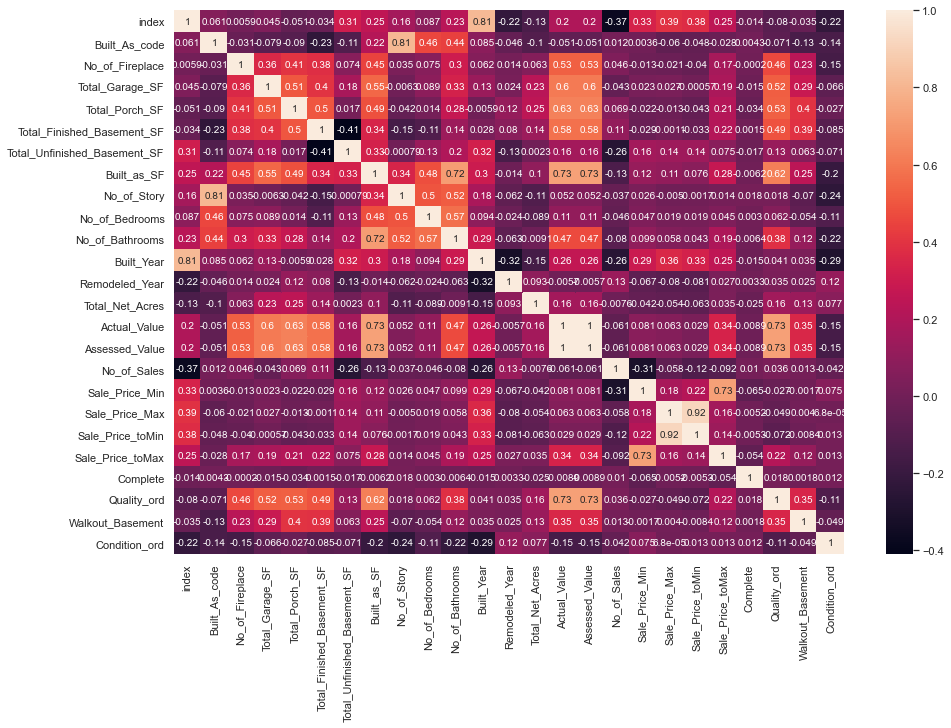

In [401]:
# Set Figure labels and size and plot the coorelation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()